# 2. Construcción del modelo Híbrido

La metodología ARIMA es una de las más utilizadas, por su sencillez y su capacidad de representar procesos estacionarios, no estacionarios y estocásticos, pero presenta una desventaja, ya que asume como una estructura lineal el proceso de series temporales, cuando esto no es en todos los casos correcto. Debido a esto, se plantea su hibridación con el modelo de RNA, dado que de esta forma se permite suplir el problema de no linealidad del modelo ARIMA. 
La siguiente figura presenta de forma general el proceso de la hibridación del modelo hibrido del cual se hablará detalladamente en el espacio dedicado al desarrollo de los modelos.
 
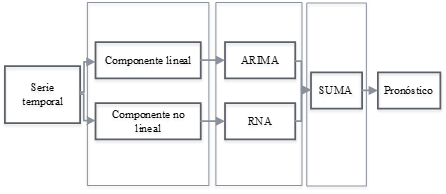

Para entender el modelo de hibridación, es necesario definir en primera medida al modelo ARIMA. El modelo ARIMA es un modelo univariante (entendiendo univariante como el análisis de solo una característica o una única cualidad). De Arce & Mahía (2003, pp. 1–3) definen un modelo como autorregresivo si el periodo t de una variable endógena se explica así misma de acuerdo a períodos anteriores, añadiendo un término de error.

Como su nombre lo indica, este modelo es una combinación del componente AR (modelo Auto Regresivo), I (integrado) y MA (Modelos de Medía Móvil). La parte AR del modelo explica el comportamiento de una variable en función de los valores que tomo en el pasado (rezagos) y la parte MA explica ese comportamiento a través de los errores al estimar el valor de la variable en los períodos anteriores. Ambas partes indican la estructura y el orden de la ecuación de regresión con los valores p (número de rezagos entre la variable y el valor de ella misma en el pasado) y q (número de rezagos entre el error de la variable y el error de ella misma en el pasado) respectivamente, por otro lado, el valor de integración (I) representa el numero d de veces necesarias para diferenciar y de esta forma eliminar la tendencia; formando de esa manera un ARIMA de orden p, d, q o ARIMA (p, d, q). 

Siendo la expresión de AR:
$$yt=φ0+φ1y(t-1)+φ2y(t-2)+…+φpy(t-p)+at$$

La de MA así:
$$yt=μ+at+θ1a(t-1)+…+θqa(t-q) $$

La del ARMA es: 
$$yt=μ+φ1y(t-1)+…+φpy(t-p)+at+θ1a(t-1)+…+θqa(t-q) $$

Y, un modelo ARMA integrado así:
$$∆dyt=μ+φ1∆^dy(t-1)+…+φp∆^dy(t-p)+at+θ1a(t-1)+…+θqa(t-q) $$

Una vez se ajustan a los datos los respectivos modelos autorregresivos se verifican si estos son precisos y se obtienen los residuales para ser procesados dentro de la parte neuronal. La parte neuronal del modelo híbrido son estructurados en tres capas. El número de los nodos en la primera capa se constituye por el numero de variables entrada obtenidas con los residuales (estas variables se obtienen a traves del criterio del menor AIC), la segunda la cual es una capa constituida por un numero de nodos igual al promedio entre los nodos de entrada y los nodos de salida y la tercera capa esta constituida por la variable de salida. La siguiente figura permite observar la parte del modelo neuronal. 

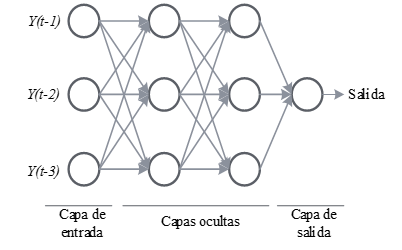

Para el desarrollo del modelo híbrido se plantea la siguiente metodología basada en las descomposición lineal de los datos observada en la primera figura del notebook con las respectivas validaciones por etapa.

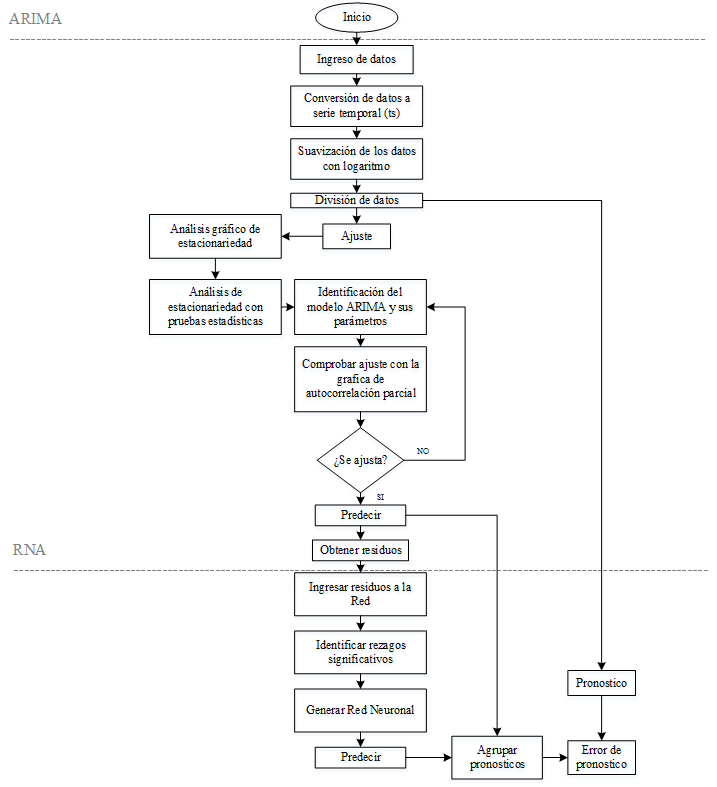

In [1]:
options(warm=-1) # No mostar mensajes de alerta

In [2]:
# Librerias necesarias para desarrollar el modelo

library(readr)    # Cargar archivos csv
library(forecast) # Generar modelos
library(tseries)  # Transformar data a serie temporal

In [10]:
# Se suavizan logaritmicamente los datos y se convierten en datos de tipo serie temporal y se dividen en los datos 
# de modelado y pronóstico

DATA <- read.csv(file="DATAporDia.csv") 
DATAm<- DATA[1:292,]
DATAp<- DATA[293:307,]
DATAm[1:292,2:length(DATA)]<-ts(log(DATA[1:292,2:length(DATA)])) # Data seleccionada para la generación de los modelos
DATAp[1:15,2:length(DATA)]<-DATA[293:307,2:length(DATA)] # Data seleccionada para la comparación de pronóstico


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.905 0.903 0.872 0.874 0.852 0.850 0.840 0.836 0.821 0.803 0.785 0.761 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.754 0.722 0.710 0.683 0.665 0.645 0.625 0.608 0.585 0.567 0.546 0.529 


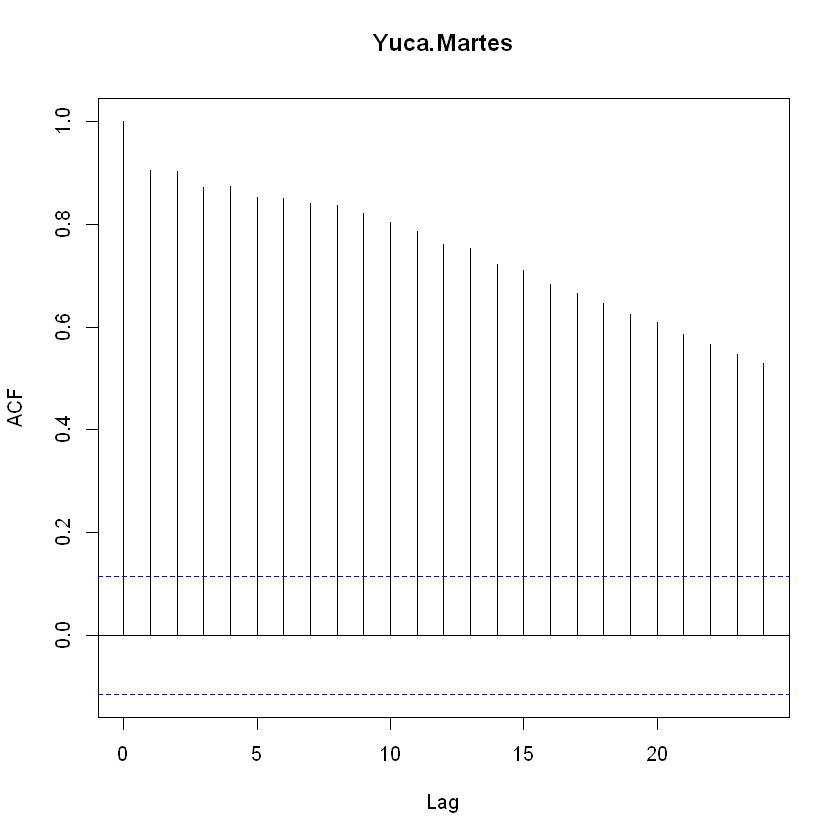


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.905  0.467  0.097  0.186  0.042  0.071  0.077  0.048 -0.010 -0.076 -0.061 
    12     13     14     15     16     17     18     19     20     21     22 
-0.105  0.015 -0.118 -0.047 -0.068 -0.074  0.007 -0.029  0.020 -0.017 -0.004 
    23     24 
 0.015  0.021 


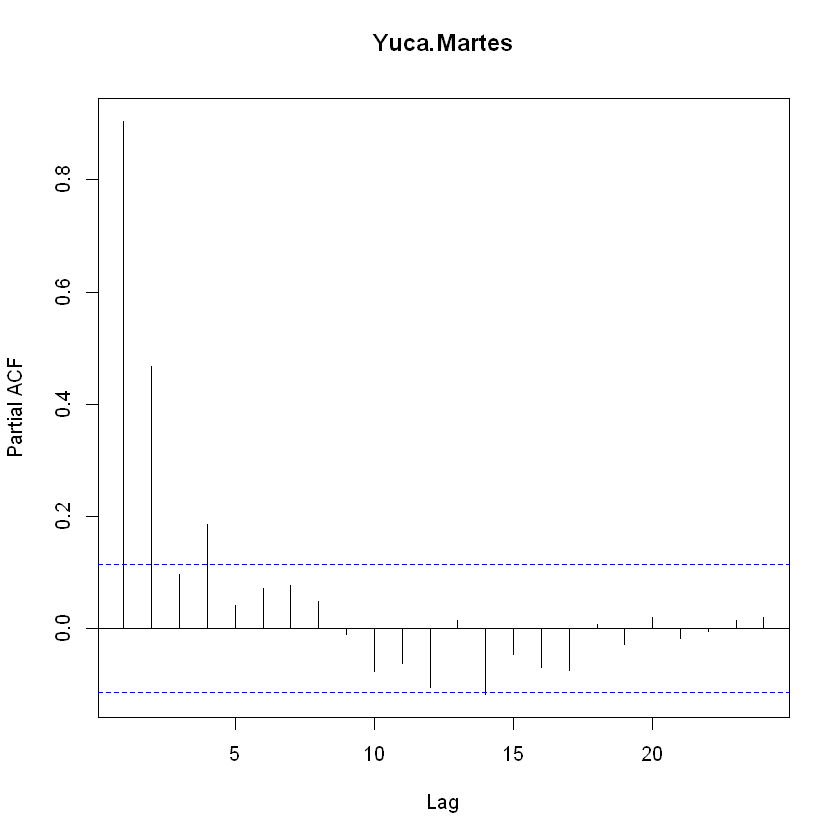


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.913 0.901 0.888 0.888 0.871 0.863 0.845 0.838 0.829 0.807 0.791 0.764 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.754 0.734 0.729 0.700 0.674 0.661 0.636 0.617 0.602 0.576 0.552 0.537 


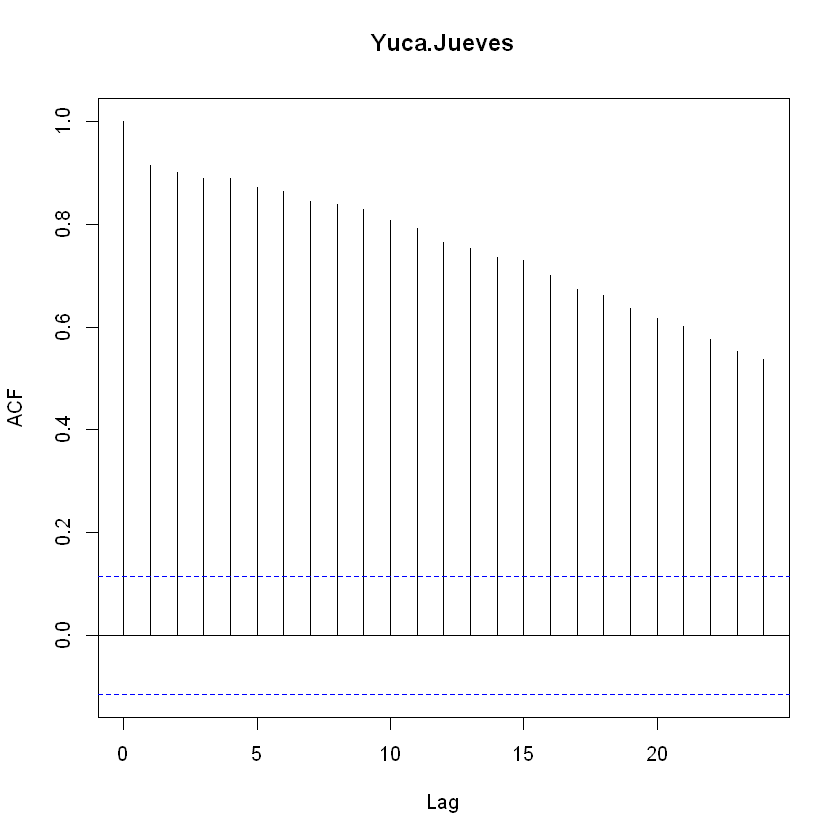


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.913  0.402  0.211  0.207  0.036  0.052 -0.034  0.012  0.026 -0.083 -0.049 
    12     13     14     15     16     17     18     19     20     21     22 
-0.136 -0.020 -0.034  0.070 -0.071 -0.115  0.016 -0.078  0.005  0.044 -0.049 
    23     24 
-0.045 -0.008 


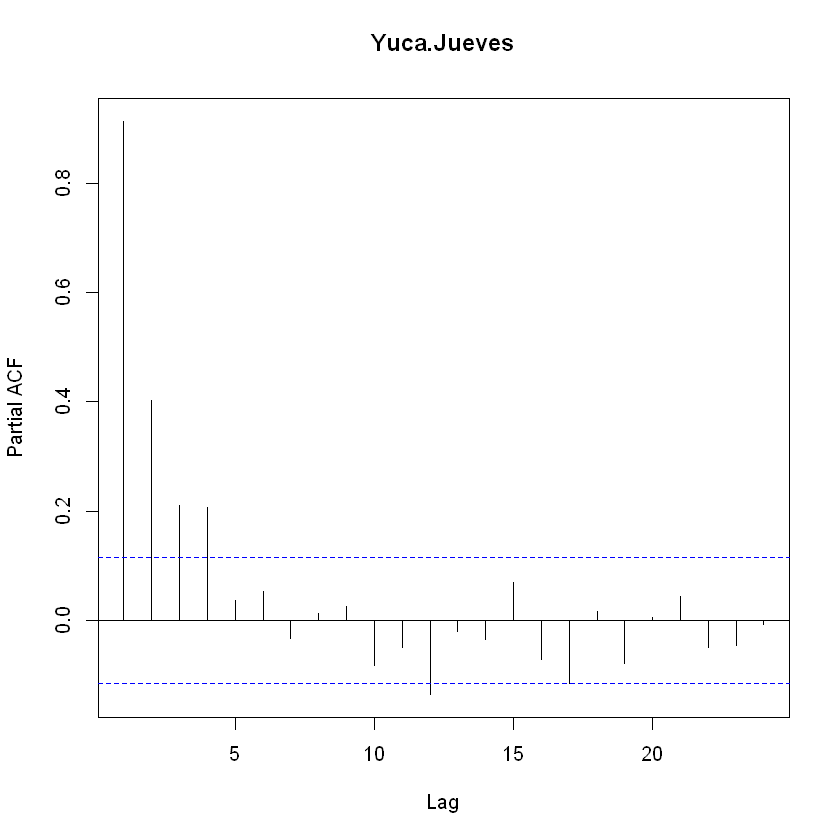


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.913 0.891 0.881 0.877 0.860 0.839 0.844 0.838 0.826 0.797 0.785 0.765 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.747 0.726 0.721 0.705 0.680 0.663 0.637 0.619 0.601 0.580 0.560 0.548 


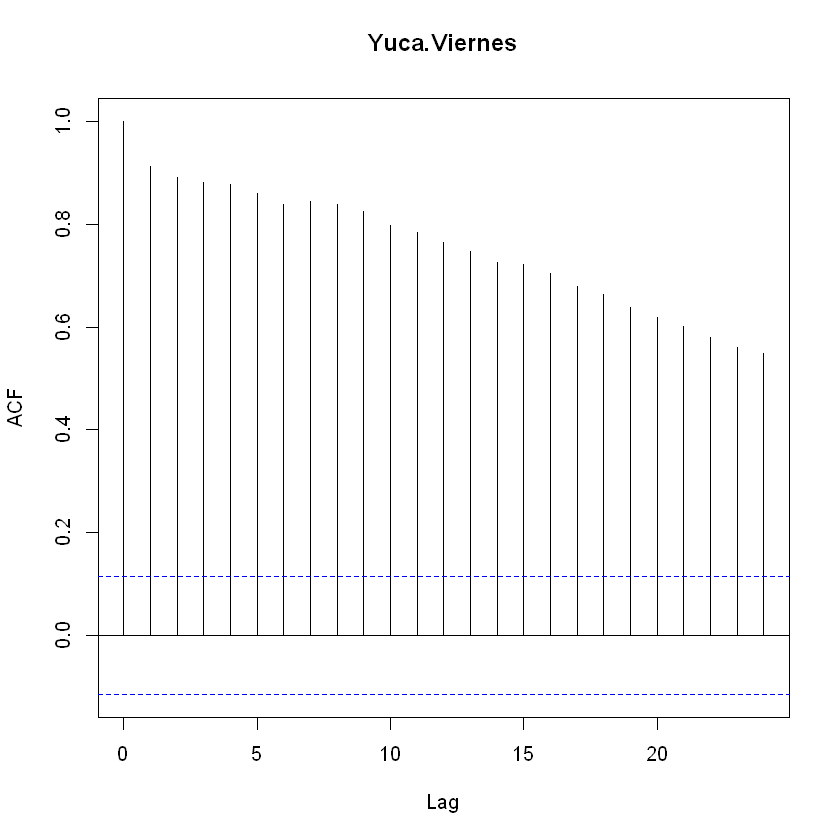


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.913  0.346  0.226  0.183  0.044 -0.030  0.140  0.053  0.006 -0.123 -0.047 
    12     13     14     15     16     17     18     19     20     21     22 
-0.091 -0.041 -0.045  0.061 -0.039 -0.073 -0.021 -0.074 -0.021  0.032 -0.033 
    23     24 
-0.037  0.034 


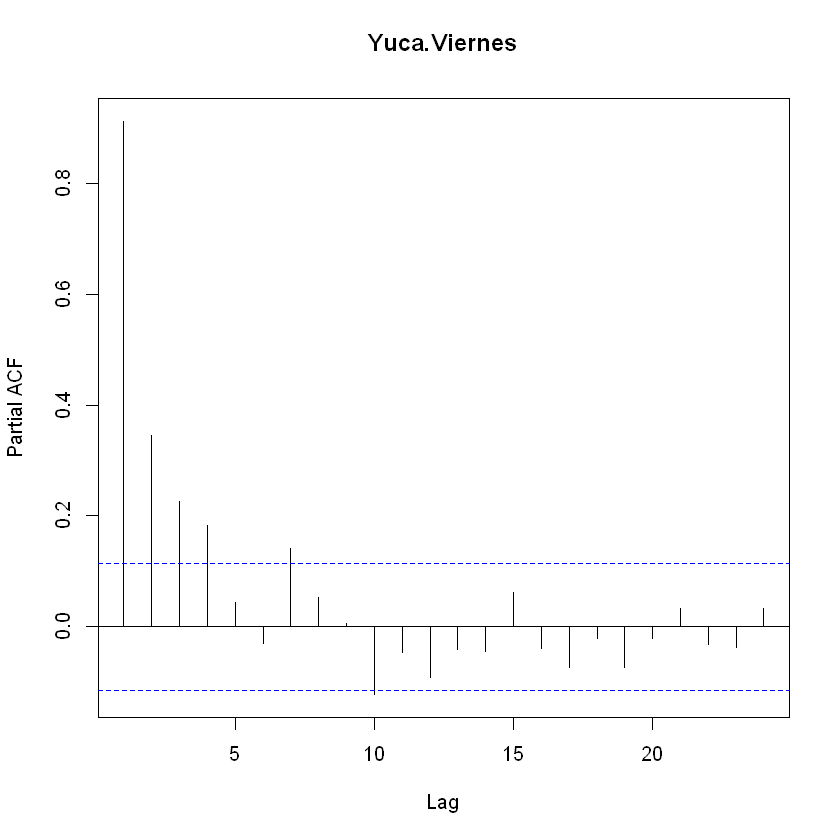


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.862 0.812 0.744 0.700 0.641 0.620 0.606 0.563 0.523 0.498 0.463 0.416 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.400 0.369 0.355 0.325 0.311 0.273 0.246 0.224 0.200 0.186 0.174 0.181 


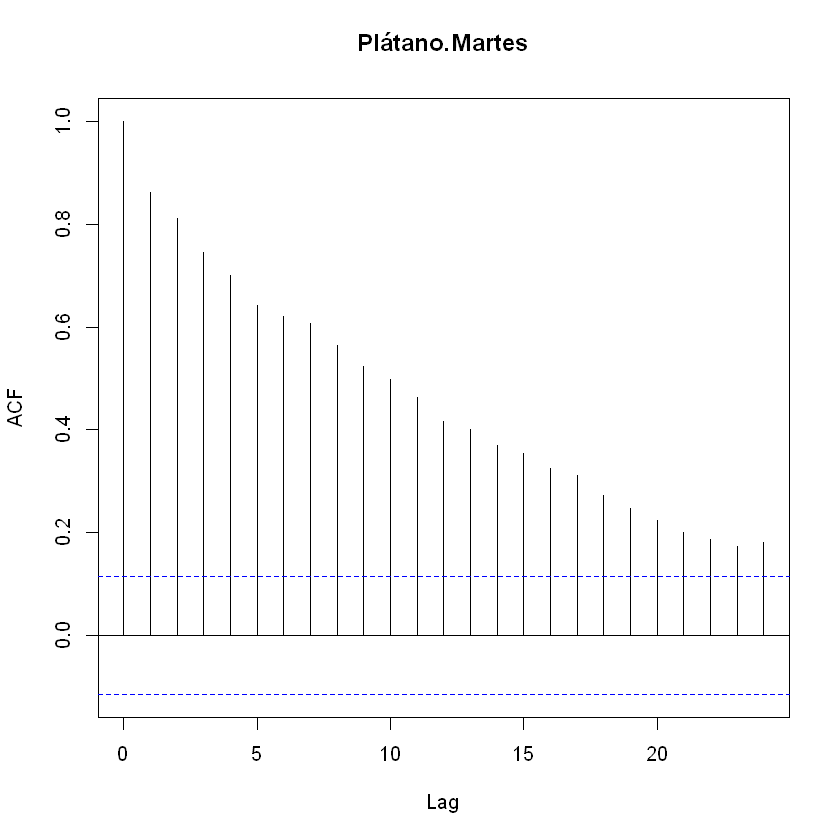


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.862  0.266  0.005  0.053 -0.035  0.103  0.108 -0.085 -0.054  0.037 -0.012 
    12     13     14     15     16     17     18     19     20     21     22 
-0.068  0.057 -0.037  0.047 -0.020 -0.007 -0.065 -0.006  0.012 -0.022  0.029 
    23     24 
 0.005  0.077 


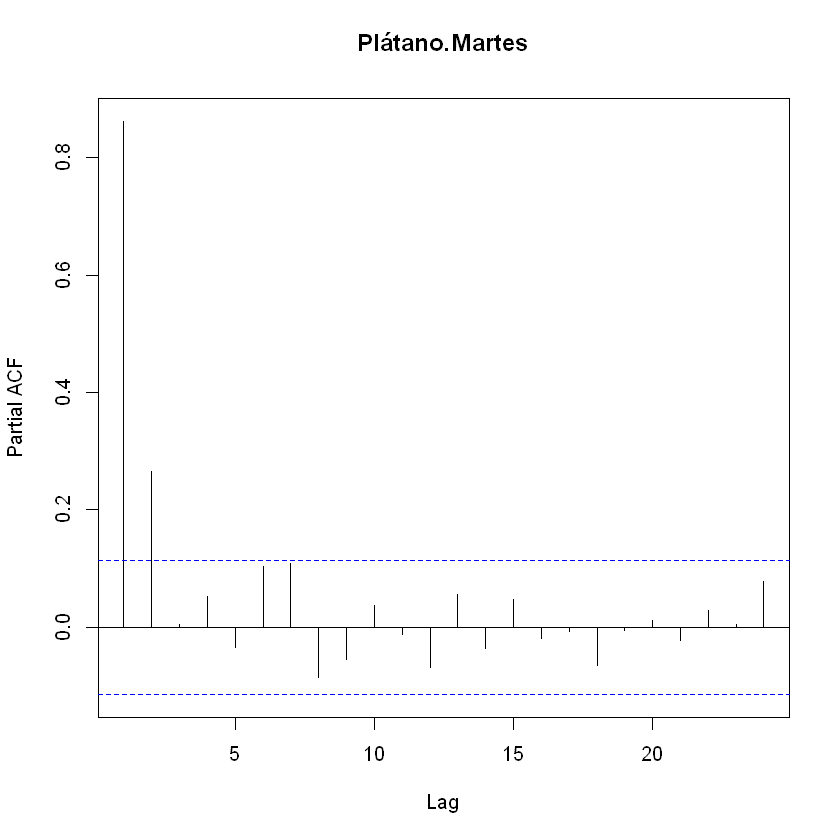


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.841 0.782 0.705 0.665 0.626 0.598 0.563 0.526 0.486 0.464 0.451 0.434 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.391 0.363 0.333 0.327 0.288 0.258 0.244 0.209 0.208 0.193 0.179 0.173 


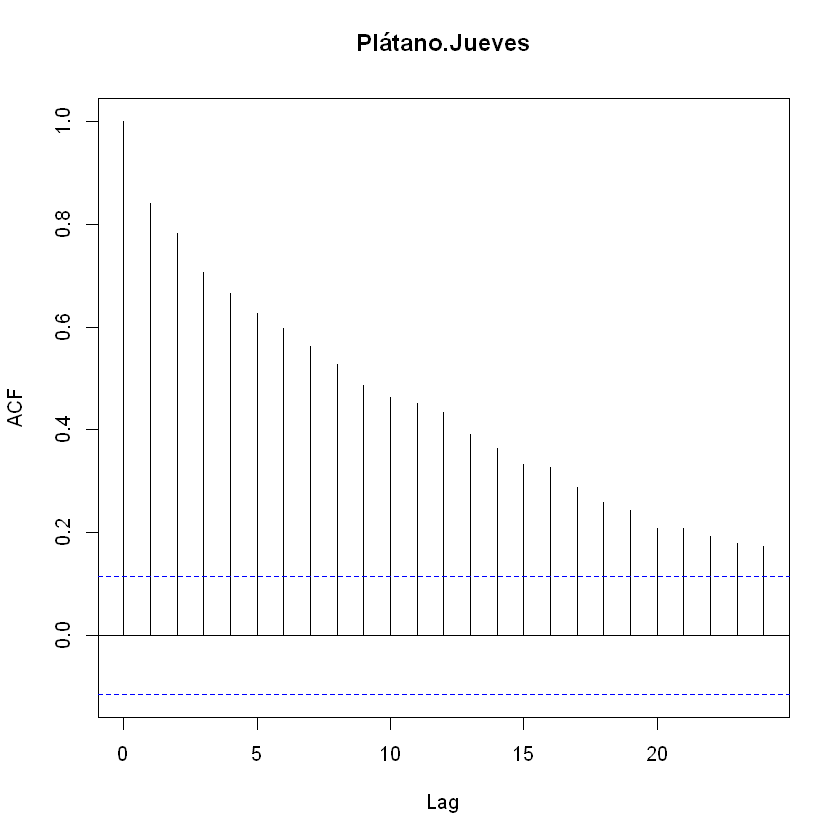


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.841  0.257  0.003  0.083  0.055  0.045  0.001 -0.013 -0.026  0.040  0.056 
    12     13     14     15     16     17     18     19     20     21     22 
 0.009 -0.088 -0.009 -0.004  0.060 -0.085 -0.051  0.058 -0.054  0.067 -0.004 
    23     24 
-0.028  0.042 


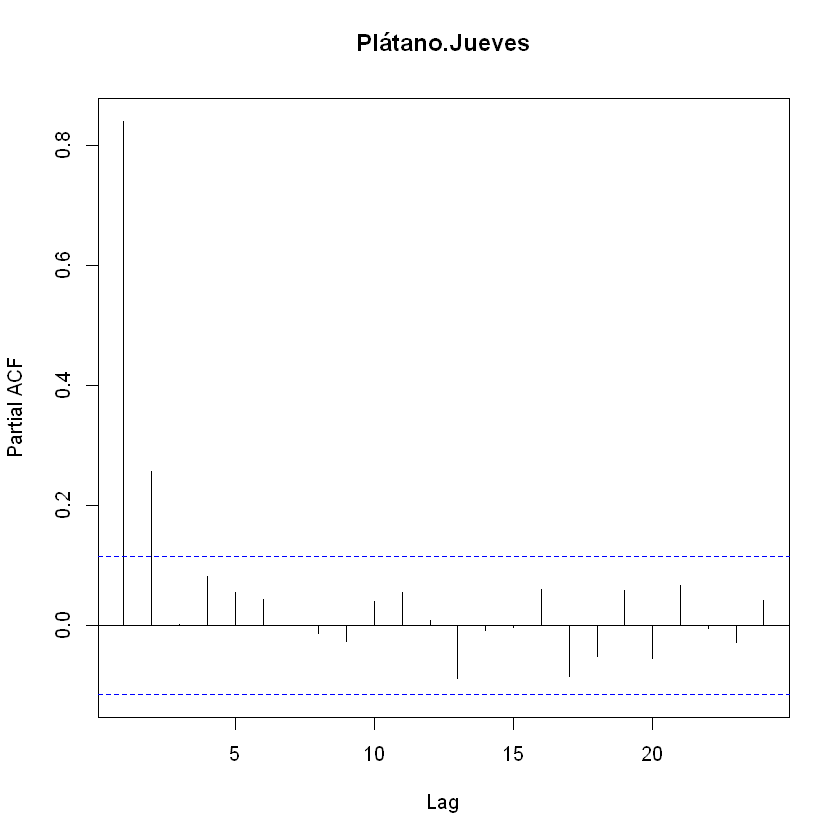


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.849 0.806 0.729 0.683 0.640 0.596 0.585 0.536 0.506 0.466 0.437 0.421 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.390 0.351 0.338 0.307 0.291 0.256 0.214 0.169 0.169 0.153 0.150 0.154 


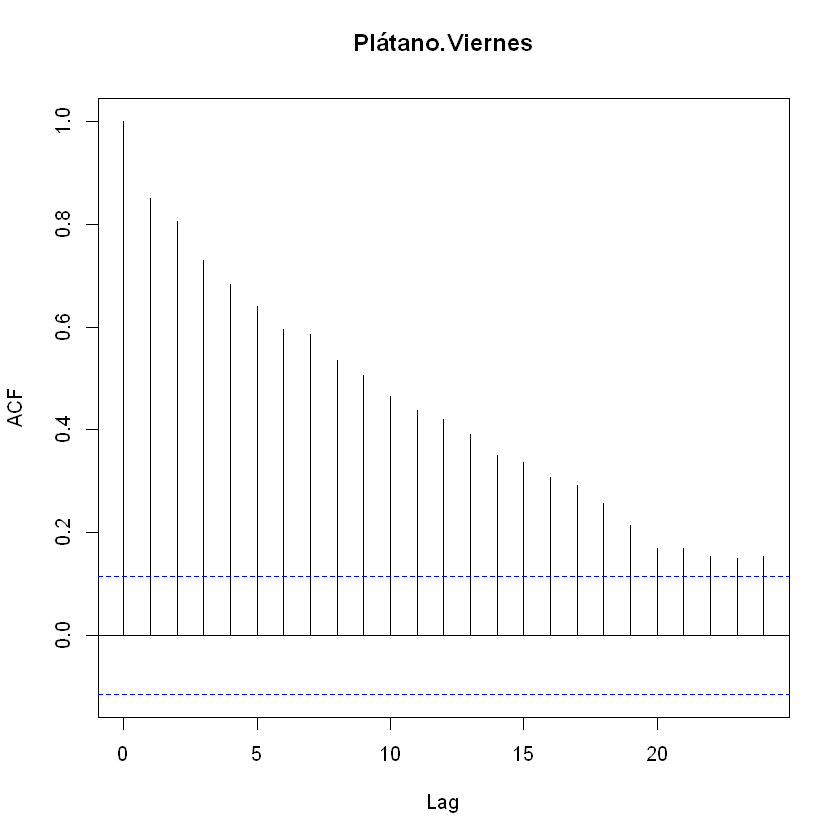


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.849  0.303 -0.021  0.042  0.049 -0.009  0.114 -0.065 -0.021 -0.011  0.005 
    12     13     14     15     16     17     18     19     20     21     22 
 0.053 -0.020 -0.096  0.069 -0.020  0.009 -0.046 -0.114 -0.071  0.163  0.011 
    23     24 
 0.020  0.042 


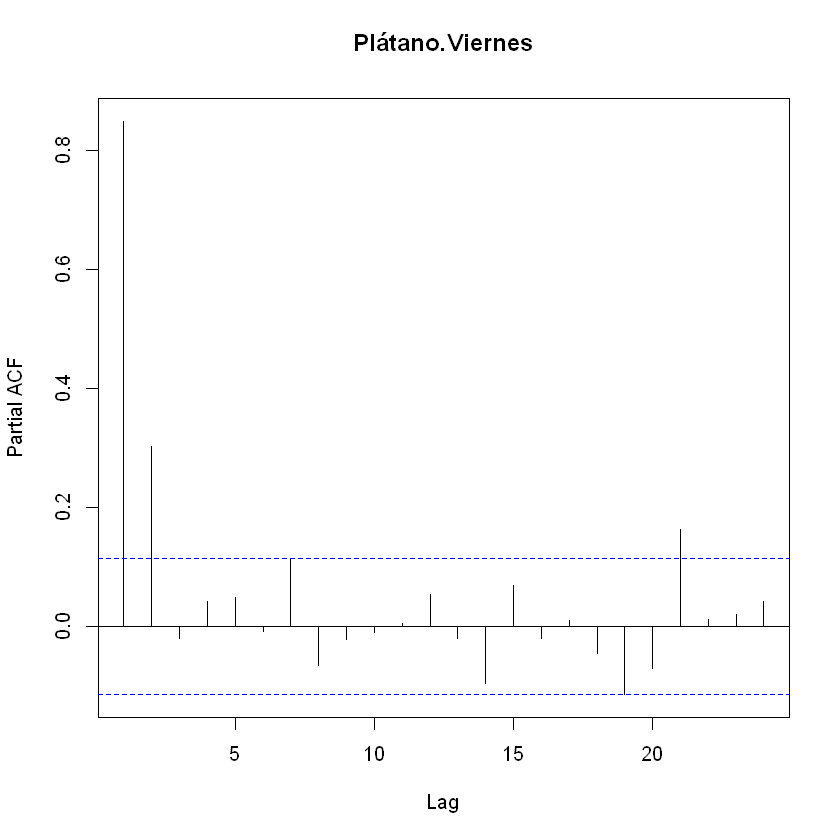


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.929  0.900  0.870  0.829  0.784  0.728  0.679  0.615  0.566  0.494 
    11     12     13     14     15     16     17     18     19     20     21 
 0.428  0.368  0.309  0.234  0.171  0.114  0.057  0.002 -0.050 -0.095 -0.130 
    22     23     24 
-0.160 -0.195 -0.221 


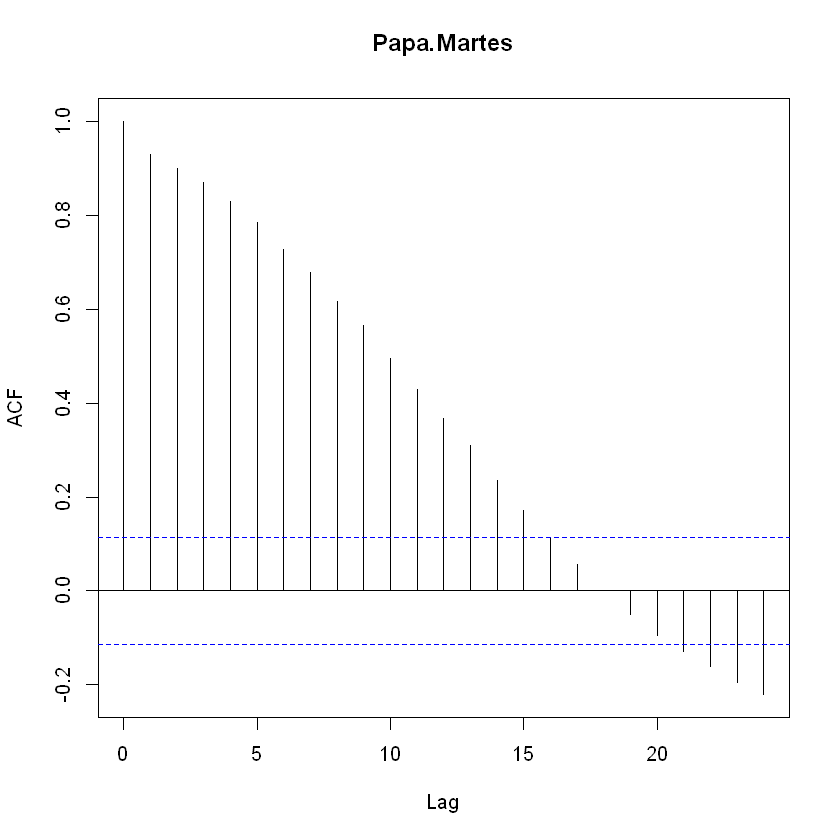


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.929  0.265  0.068 -0.071 -0.103 -0.158 -0.039 -0.128  0.032 -0.158 -0.067 
    12     13     14     15     16     17     18     19     20     21     22 
-0.012  0.019 -0.146 -0.006  0.000  0.018 -0.024  0.010 -0.002  0.078  0.019 
    23     24 
-0.011 -0.021 


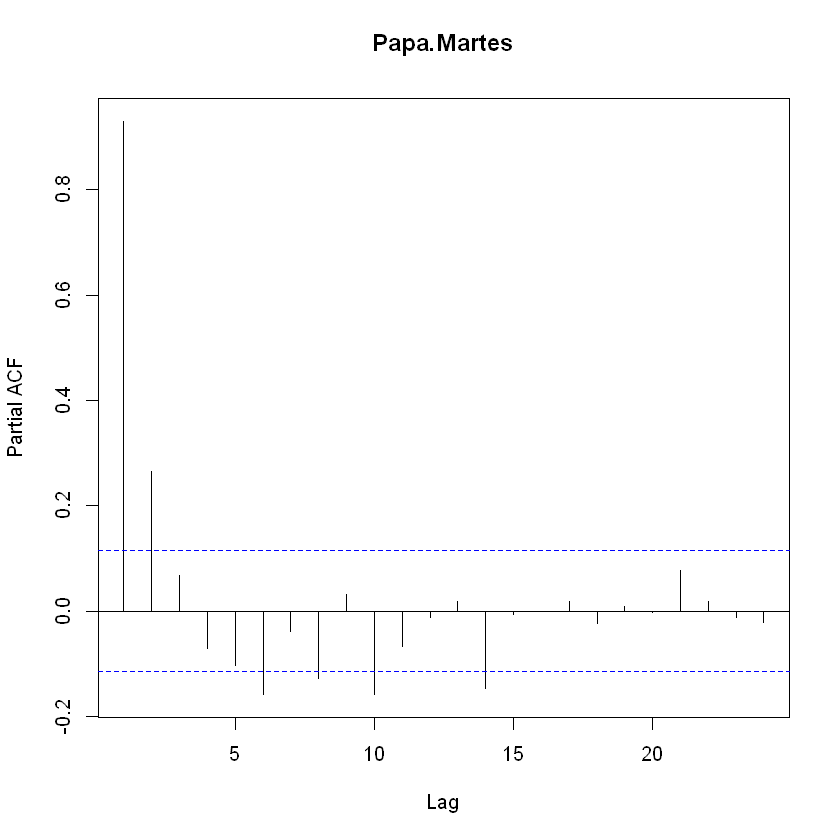


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.949  0.908  0.876  0.837  0.788  0.739  0.681  0.623  0.567  0.492 
    11     12     13     14     15     16     17     18     19     20     21 
 0.423  0.362  0.300  0.224  0.168  0.115  0.061  0.005 -0.051 -0.098 -0.131 
    22     23     24 
-0.160 -0.199 -0.229 


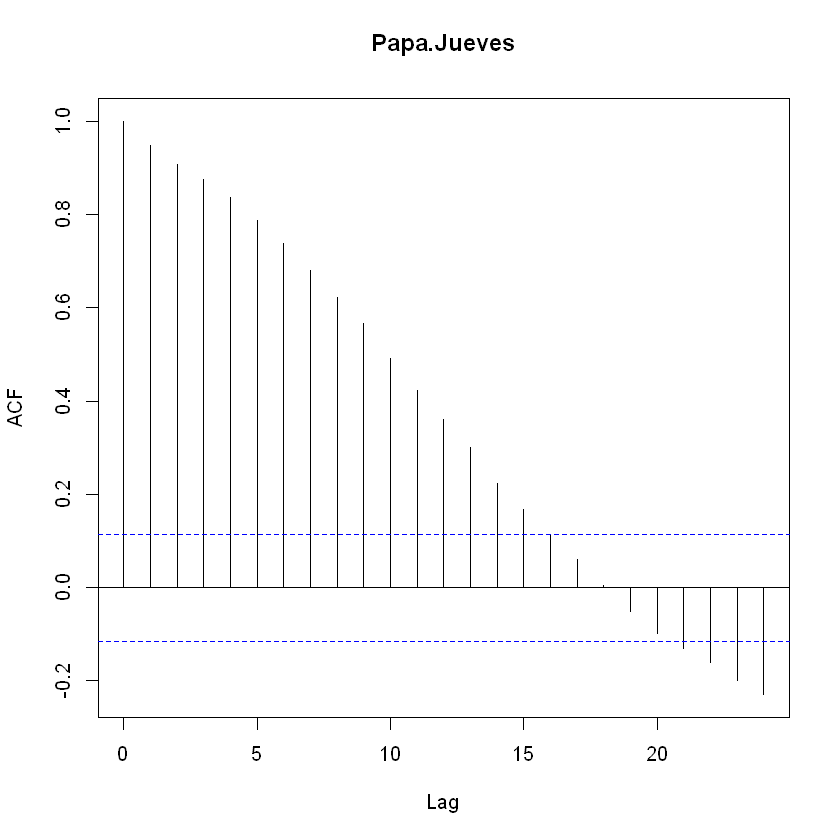


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.949  0.077  0.077 -0.074 -0.120 -0.064 -0.139 -0.046 -0.029 -0.217 -0.016 
    12     13     14     15     16     17     18     19     20     21     22 
 0.012  0.002 -0.161  0.127  0.018  0.002 -0.085 -0.056  0.026  0.081  0.030 
    23     24 
-0.066 -0.067 


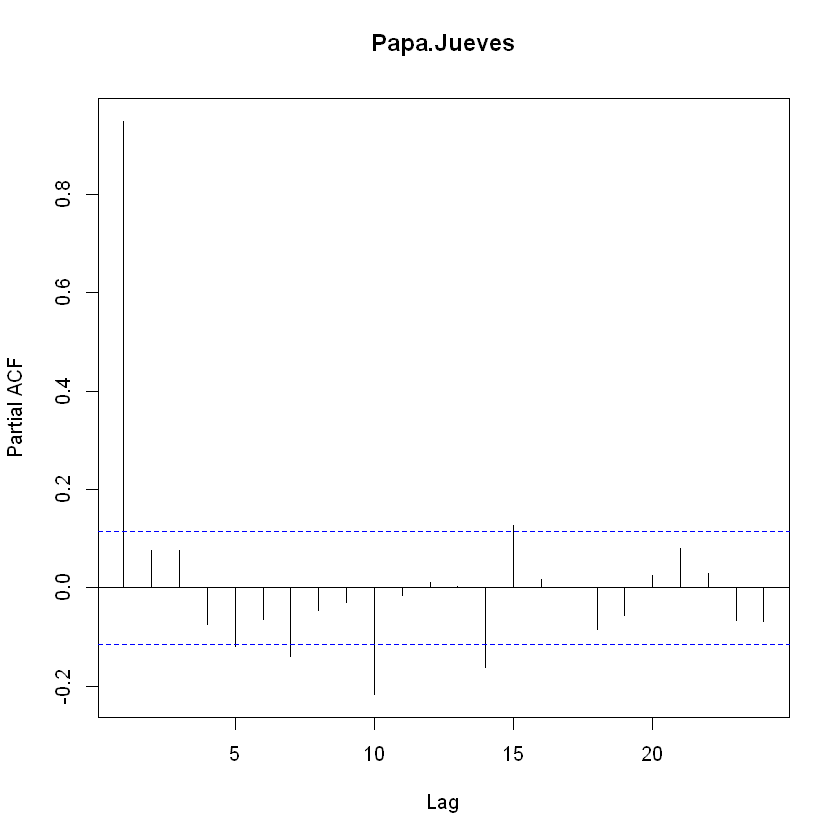


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.950  0.911  0.876  0.837  0.787  0.734  0.676  0.620  0.561  0.487 
    11     12     13     14     15     16     17     18     19     20     21 
 0.419  0.355  0.293  0.223  0.160  0.102  0.050 -0.005 -0.060 -0.104 -0.138 
    22     23     24 
-0.166 -0.204 -0.231 


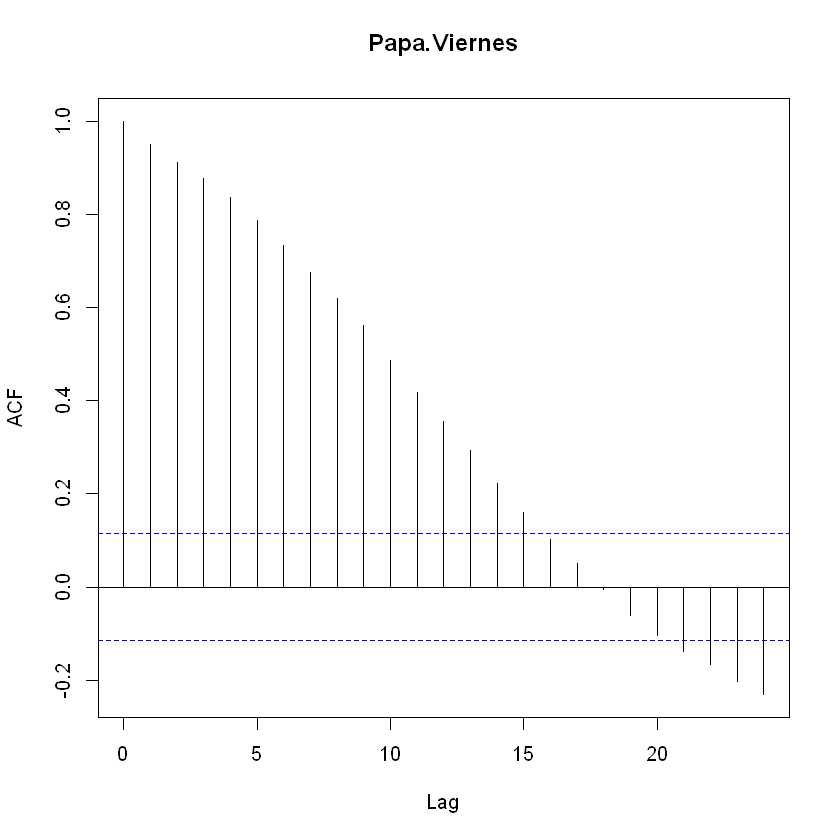


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.950  0.086  0.033 -0.047 -0.148 -0.085 -0.115 -0.015 -0.054 -0.195 -0.015 
    12     13     14     15     16     17     18     19     20     21     22 
-0.004 -0.002 -0.082  0.000  0.024  0.019 -0.049 -0.051  0.037  0.064  0.046 
    23     24 
-0.101 -0.001 


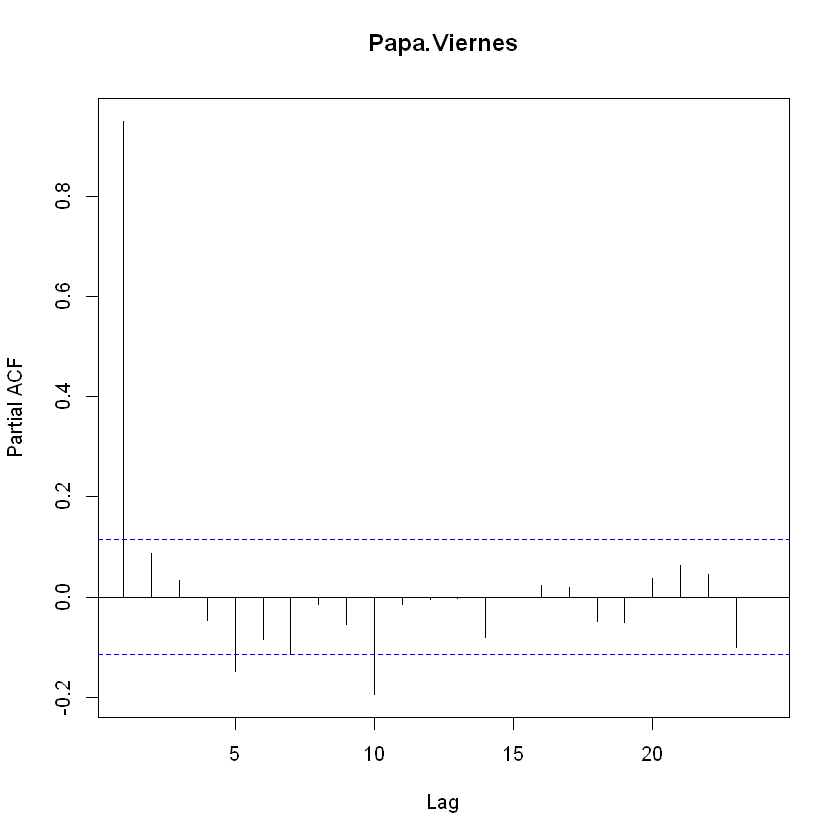


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.649 0.674 0.542 0.515 0.470 0.431 0.392 0.405 0.329 0.264 0.240 0.179 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.184 0.141 0.099 0.119 0.075 0.066 0.059 0.050 0.107 0.077 0.092 0.020 


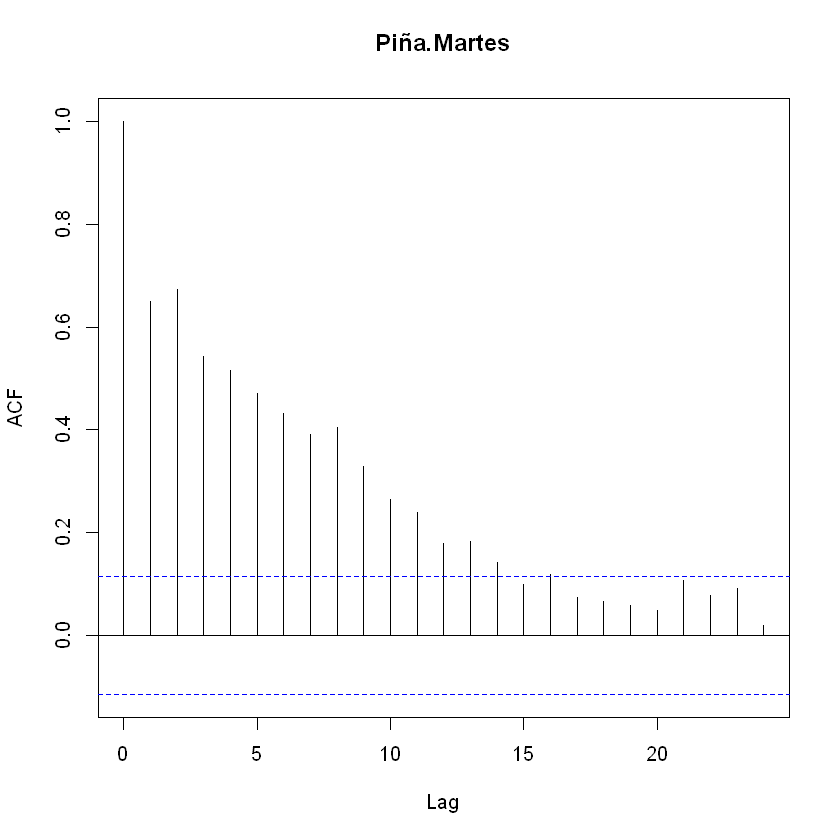


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.649  0.436  0.027  0.038  0.069  0.020 -0.003  0.105 -0.062 -0.148  0.011 
    12     13     14     15     16     17     18     19     20     21     22 
-0.034  0.023  0.001 -0.074  0.058 -0.001 -0.012  0.031  0.023  0.124 -0.014 
    23     24 
 0.006 -0.152 


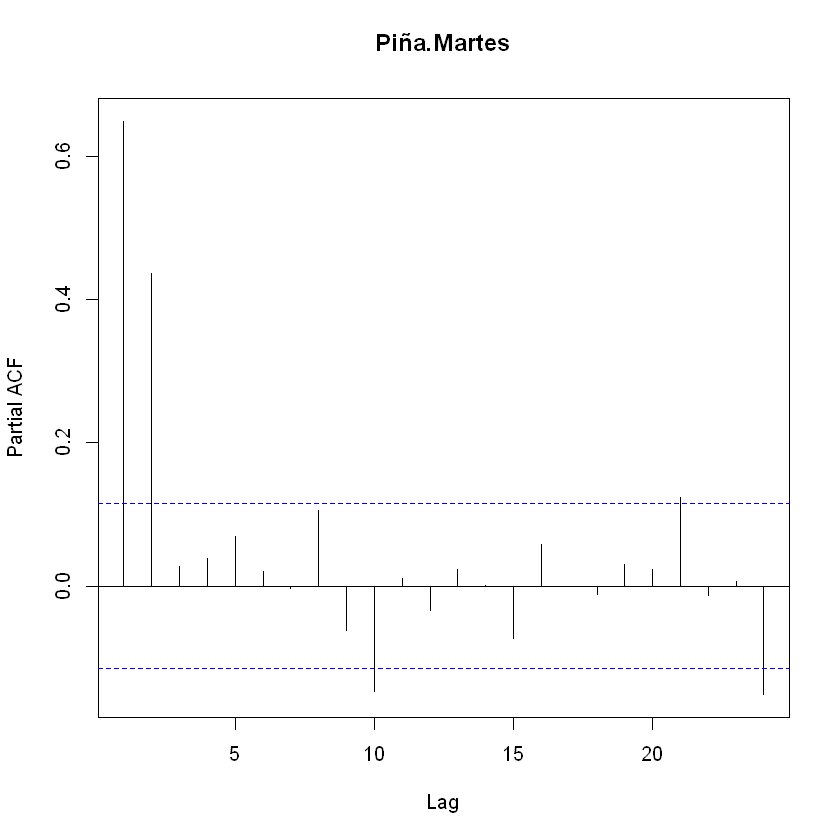


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.713 0.665 0.551 0.516 0.485 0.453 0.414 0.372 0.349 0.271 0.249 0.200 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.208 0.102 0.107 0.088 0.073 0.078 0.046 0.046 0.053 0.036 0.001 0.005 


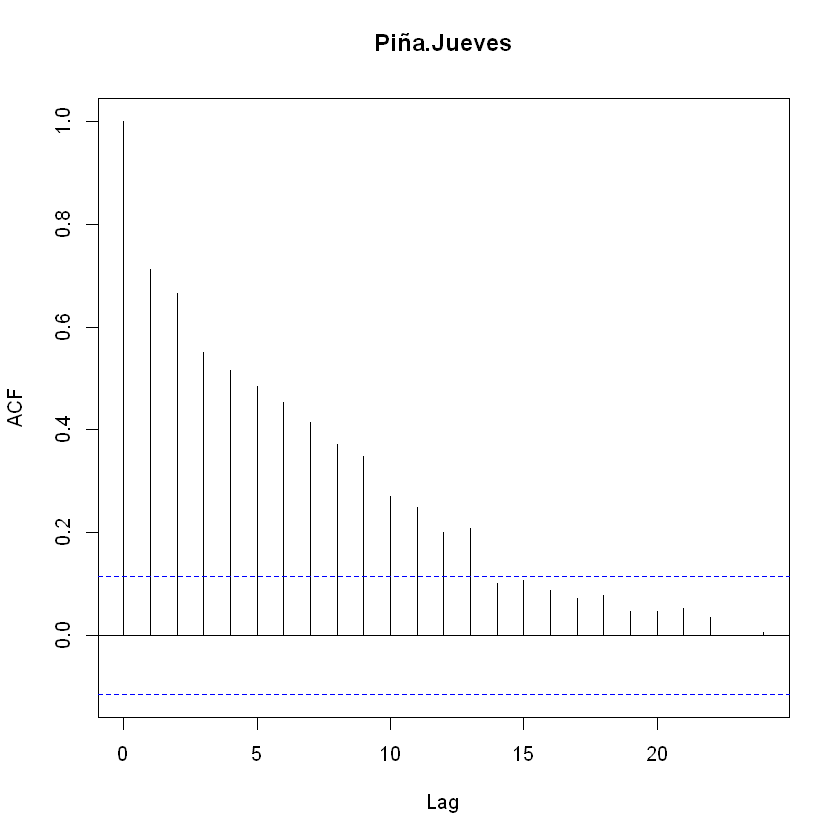


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.713  0.319  0.003  0.080  0.094  0.035 -0.003 -0.013  0.026 -0.107 -0.007 
    12     13     14     15     16     17     18     19     20     21     22 
-0.020  0.058 -0.188  0.033  0.072 -0.023  0.030 -0.013  0.022  0.054 -0.046 
    23     24 
-0.046  0.010 


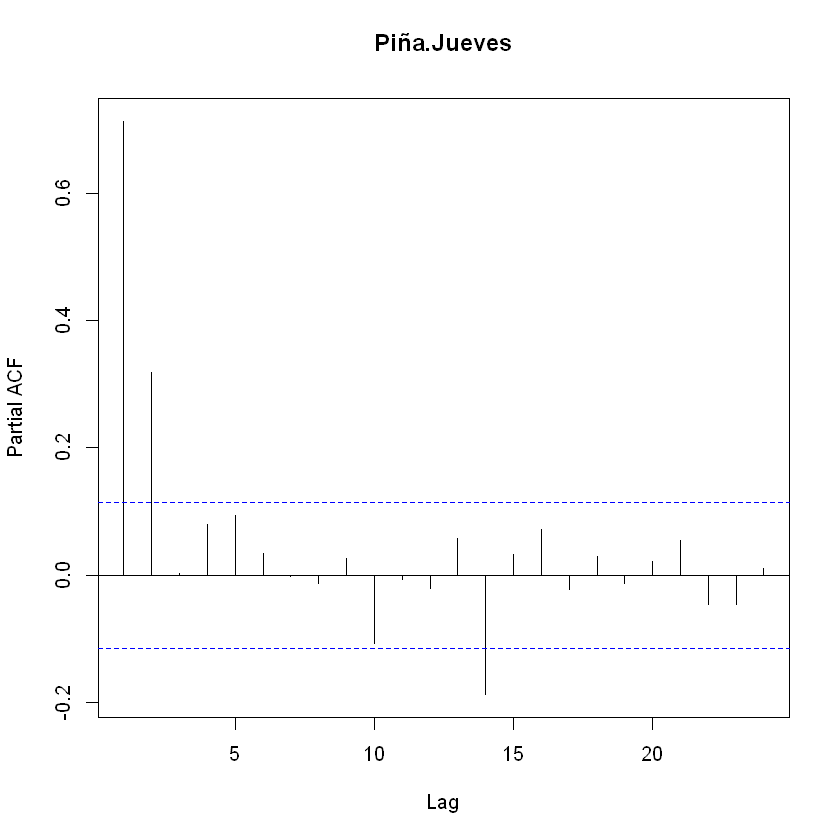


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.690 0.670 0.558 0.534 0.477 0.422 0.401 0.368 0.329 0.253 0.198 0.166 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.174 0.084 0.055 0.072 0.034 0.061 0.025 0.054 0.044 0.038 0.012 0.001 


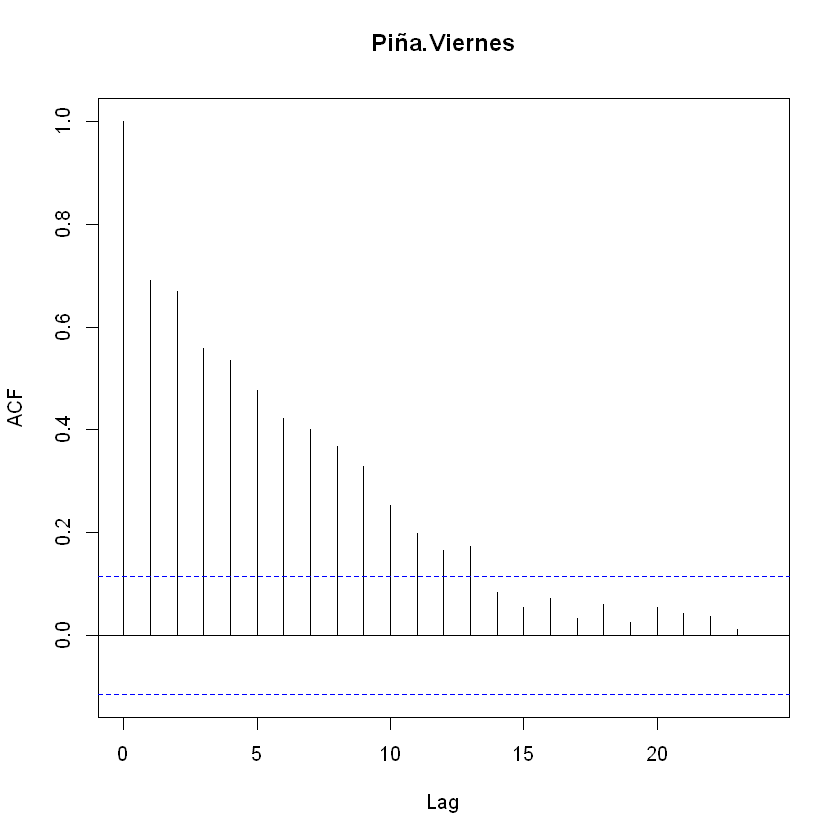


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.690  0.369  0.026  0.087  0.036 -0.031  0.048  0.027 -0.029 -0.105 -0.074 
    12     13     14     15     16     17     18     19     20     21     22 
 0.001  0.089 -0.132 -0.065  0.127 -0.037  0.073  0.012  0.031  0.009 -0.018 
    23     24 
-0.036 -0.017 


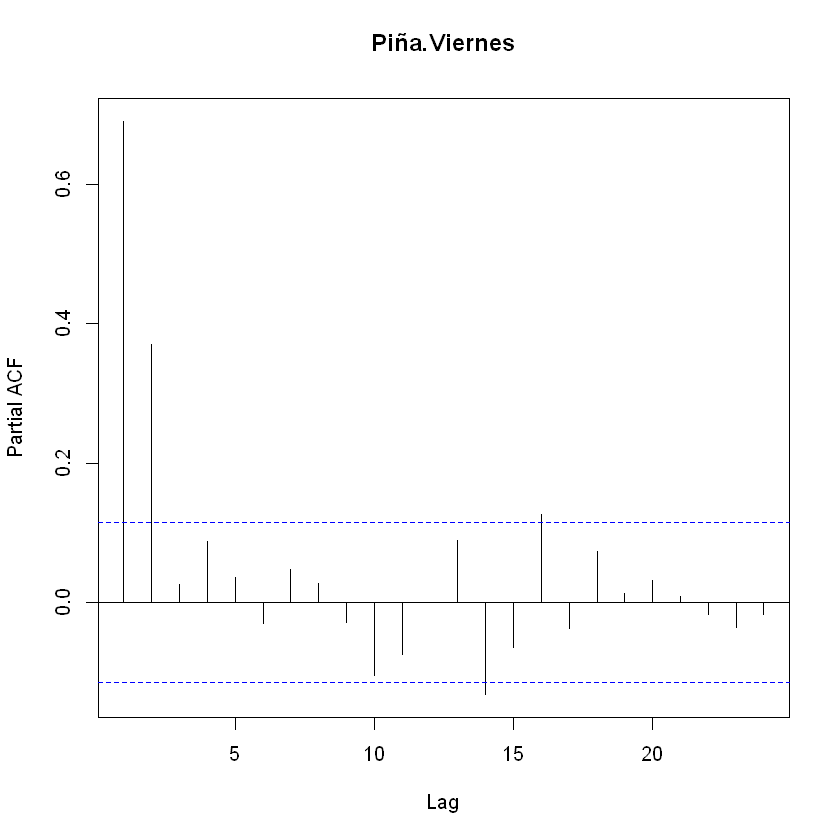


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.894  0.838  0.776  0.712  0.635  0.563  0.475  0.402  0.307  0.215 
    11     12     13     14     15     16     17     18     19     20     21 
 0.149  0.097  0.054  0.024  0.004 -0.005  0.000  0.014  0.024  0.031  0.048 
    22     23     24 
 0.071  0.060  0.067 


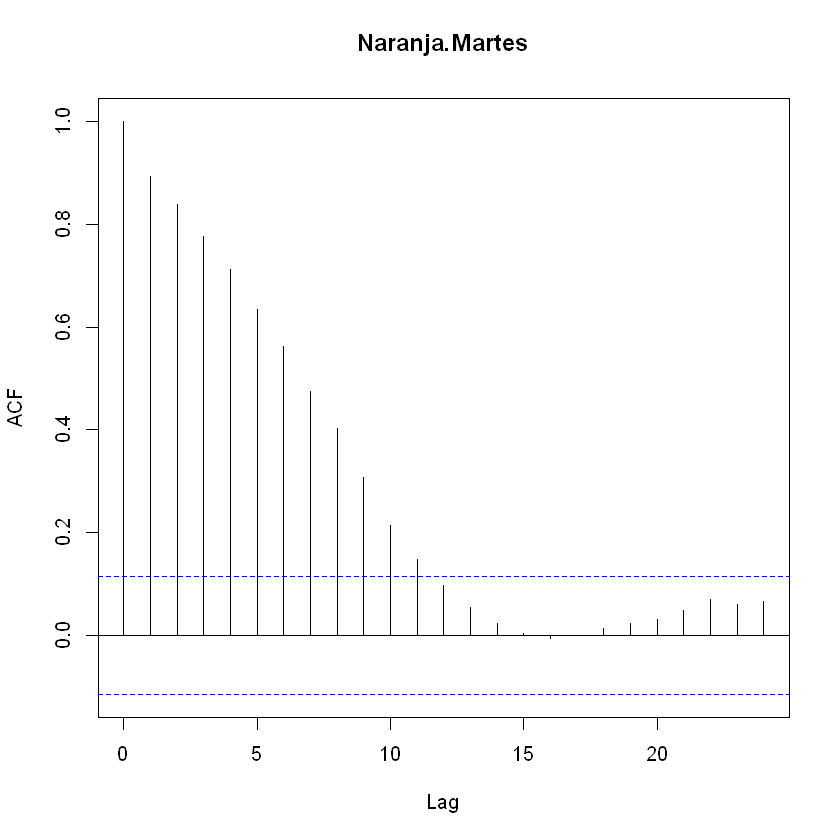


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.894  0.195 -0.004 -0.046 -0.111 -0.054 -0.126 -0.013 -0.140 -0.102  0.063 
    12     13     14     15     16     17     18     19     20     21     22 
 0.082  0.072  0.058  0.056  0.043  0.062  0.059 -0.047 -0.096 -0.011  0.028 
    23     24 
-0.168  0.002 


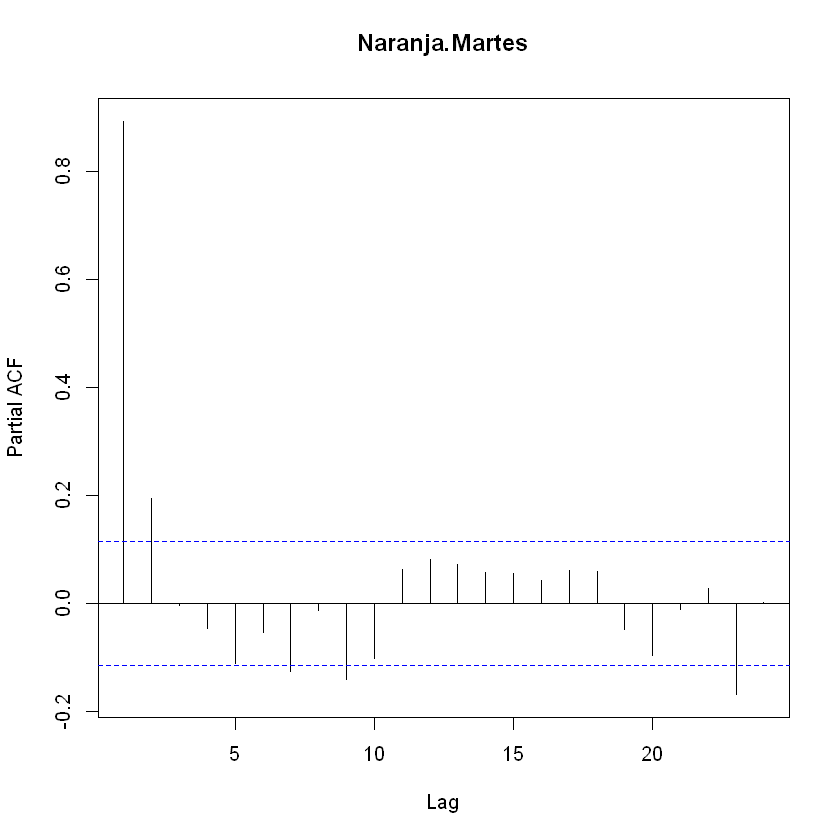


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.894  0.819  0.767  0.710  0.632  0.555  0.473  0.386  0.297  0.208 
    11     12     13     14     15     16     17     18     19     20     21 
 0.132  0.079  0.039 -0.004 -0.023 -0.033 -0.023 -0.002  0.003  0.017  0.034 
    22     23     24 
 0.062  0.059  0.055 


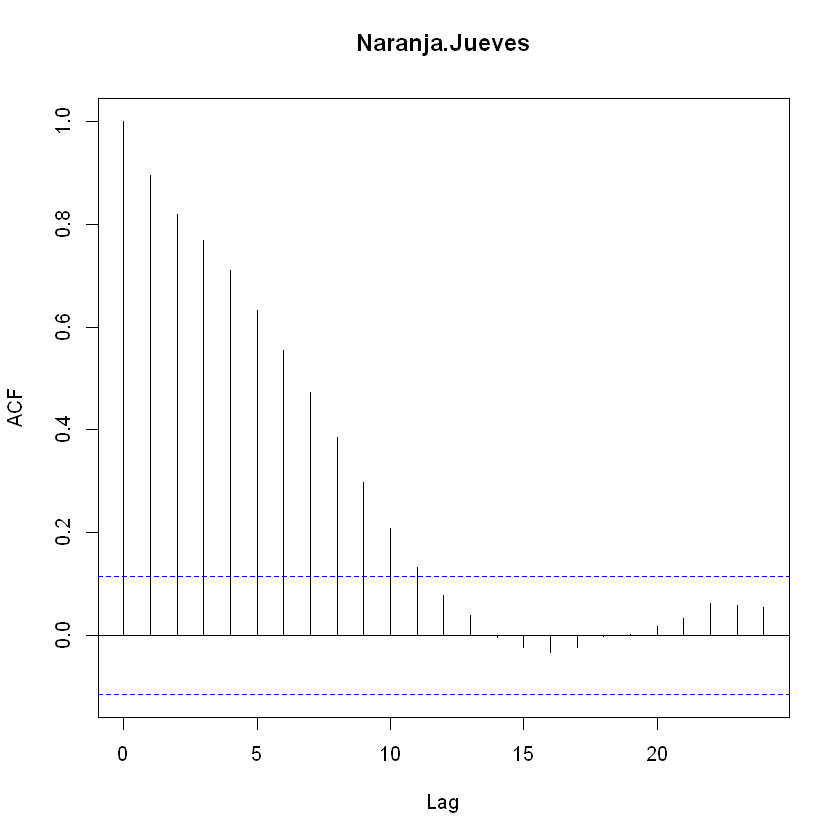


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.894  0.098  0.096 -0.024 -0.122 -0.080 -0.096 -0.099 -0.084 -0.079 -0.004 
    12     13     14     15     16     17     18     19     20     21     22 
 0.082  0.085  0.015  0.100  0.042  0.101  0.075 -0.086 -0.021 -0.064  0.022 
    23     24 
-0.153 -0.078 


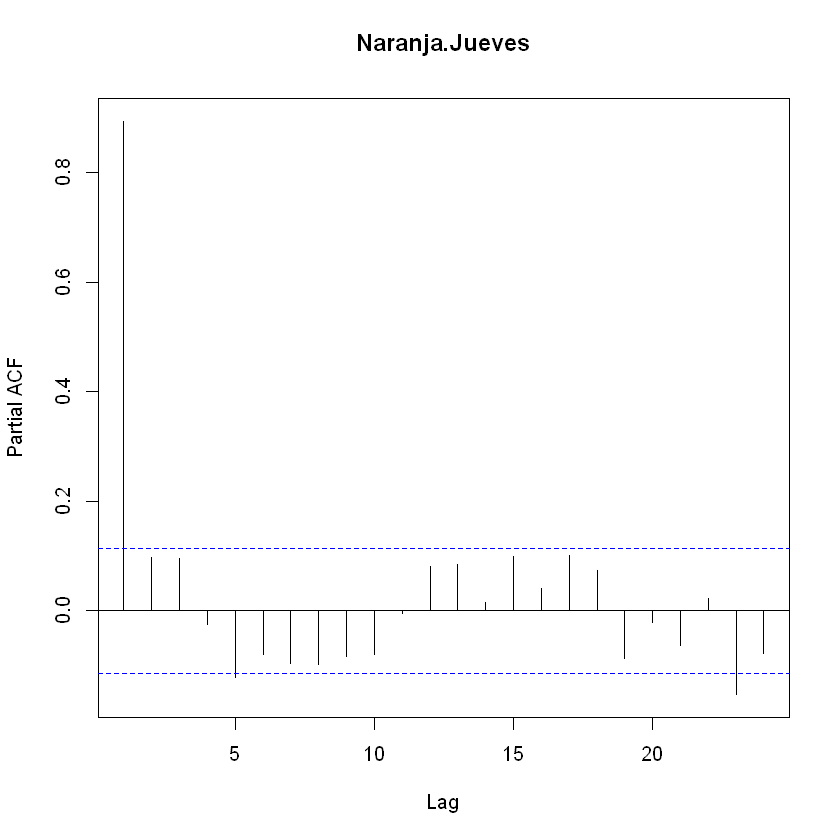


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.900 0.825 0.774 0.712 0.648 0.568 0.477 0.404 0.317 0.225 0.157 0.104 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.073 0.029 0.010 0.001 0.004 0.008 0.019 0.025 0.048 0.075 0.075 0.066 


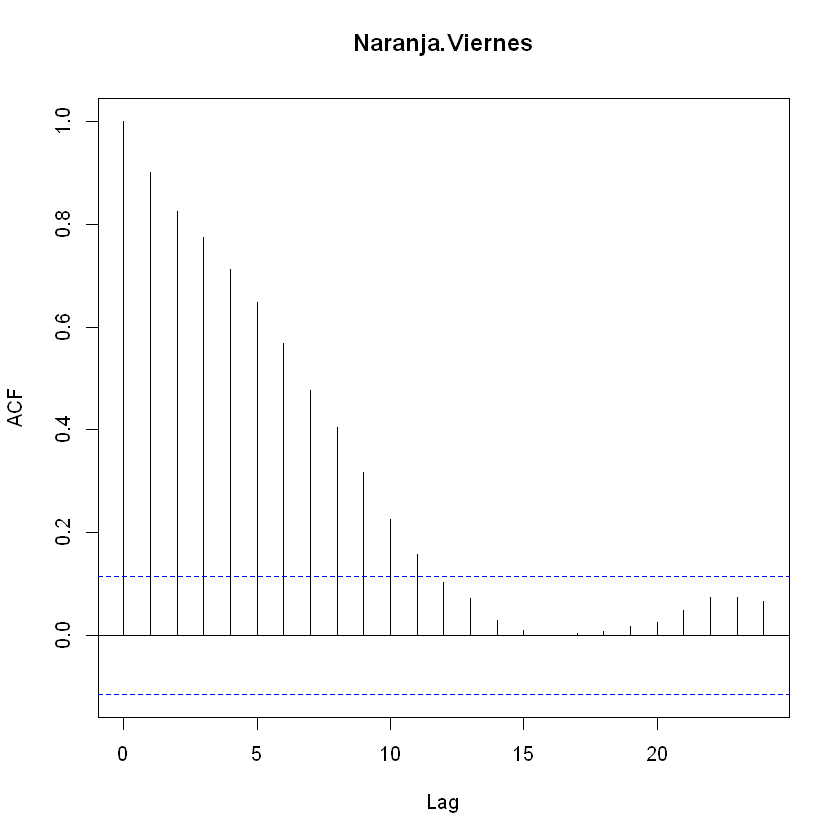


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.900  0.075  0.101 -0.054 -0.040 -0.138 -0.134 -0.005 -0.124 -0.088  0.040 
    12     13     14     15     16     17     18     19     20     21     22 
 0.066  0.130 -0.044  0.139  0.013  0.064 -0.016  0.011 -0.069  0.024  0.034 
    23     24 
-0.120 -0.101 


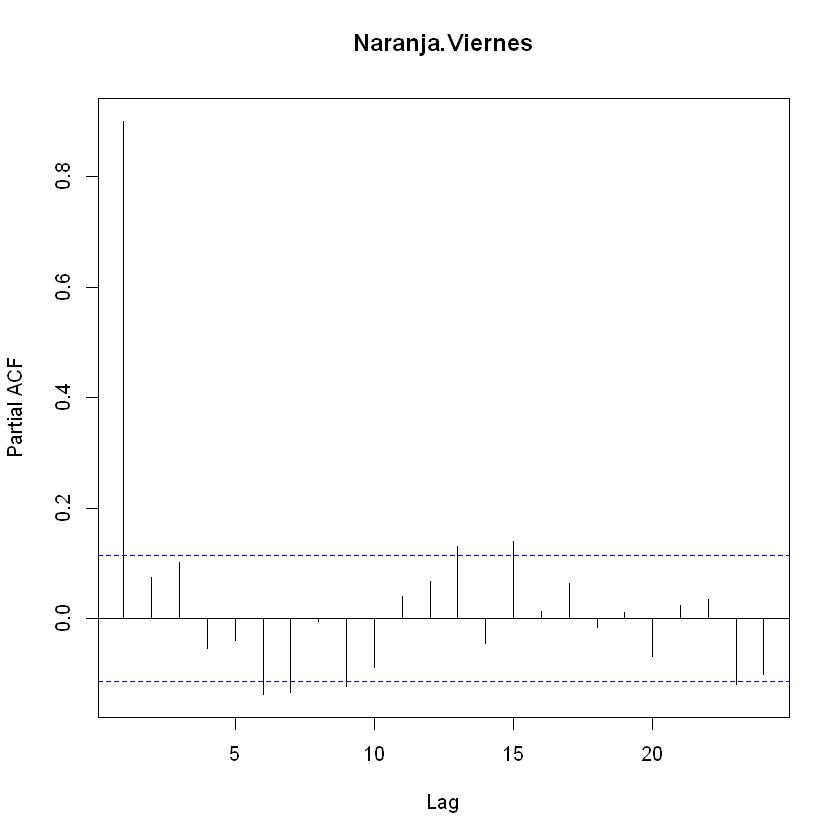


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.920  0.837  0.739  0.625  0.500  0.362  0.210  0.071 -0.058 -0.169 
    11     12     13     14     15     16     17     18     19     20     21 
-0.256 -0.319 -0.359 -0.373 -0.370 -0.347 -0.294 -0.236 -0.176 -0.096 -0.013 
    22     23     24 
 0.082  0.146  0.198 


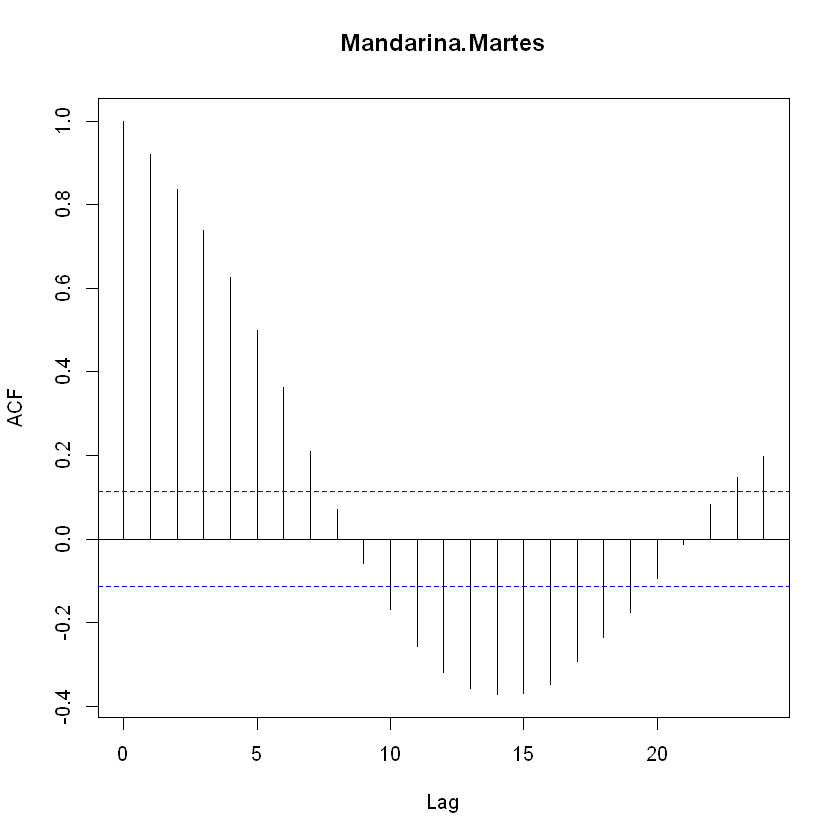


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.920 -0.052 -0.152 -0.155 -0.145 -0.157 -0.196 -0.030 -0.030  0.003  0.053 
    12     13     14     15     16     17     18     19     20     21     22 
 0.058  0.032  0.038 -0.019 -0.002  0.101 -0.035 -0.048  0.106  0.060  0.125 
    23     24 
-0.143 -0.044 


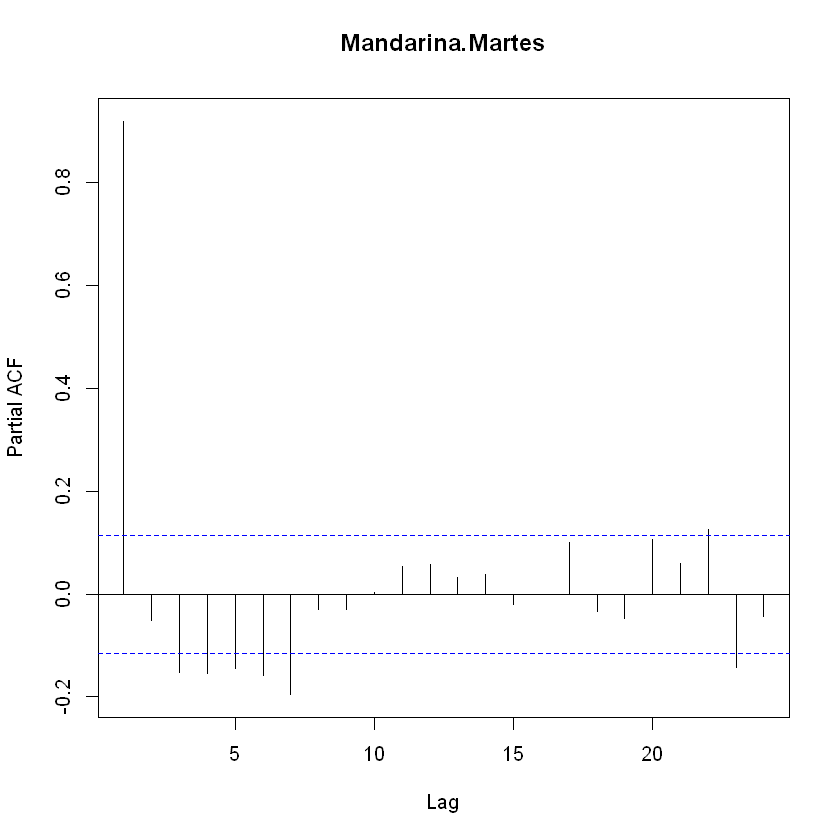


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.909  0.830  0.737  0.620  0.493  0.362  0.220  0.075 -0.051 -0.169 
    11     12     13     14     15     16     17     18     19     20     21 
-0.254 -0.321 -0.360 -0.379 -0.372 -0.341 -0.292 -0.229 -0.167 -0.086  0.002 
    22     23     24 
 0.090  0.155  0.206 


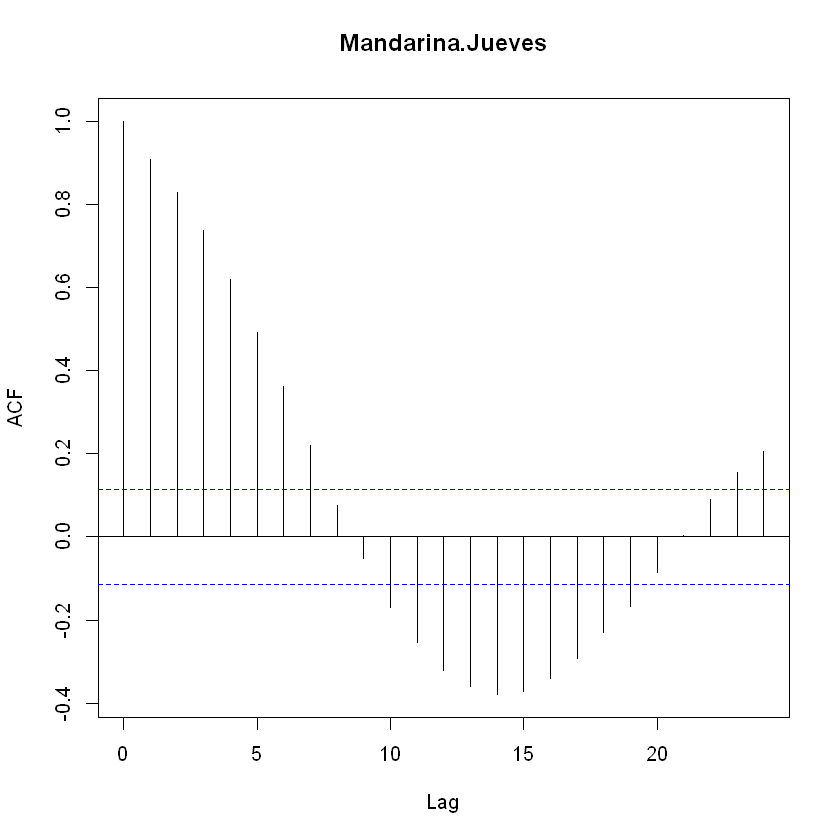


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.909  0.023 -0.118 -0.202 -0.156 -0.106 -0.144 -0.143 -0.009 -0.042  0.093 
    12     13     14     15     16     17     18     19     20     21     22 
 0.020  0.065  0.014  0.046  0.050  0.031  0.004 -0.058  0.063  0.088  0.055 
    23     24 
-0.087 -0.070 


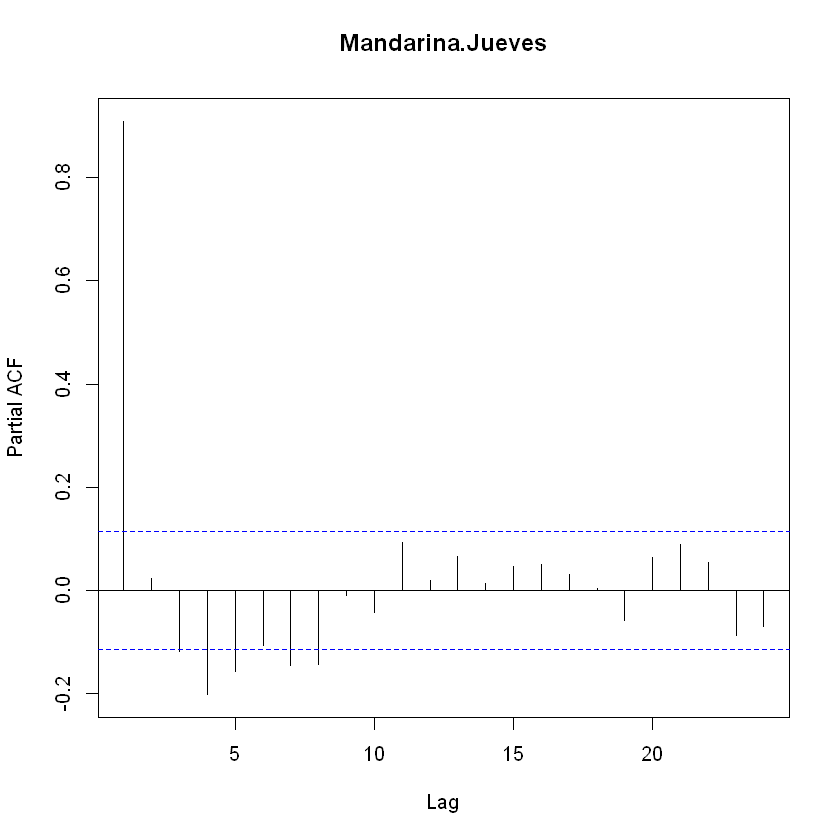


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.925  0.844  0.752  0.638  0.513  0.372  0.227  0.082 -0.053 -0.159 
    11     12     13     14     15     16     17     18     19     20     21 
-0.246 -0.315 -0.354 -0.369 -0.363 -0.330 -0.278 -0.222 -0.157 -0.073  0.014 
    22     23     24 
 0.097  0.164  0.220 


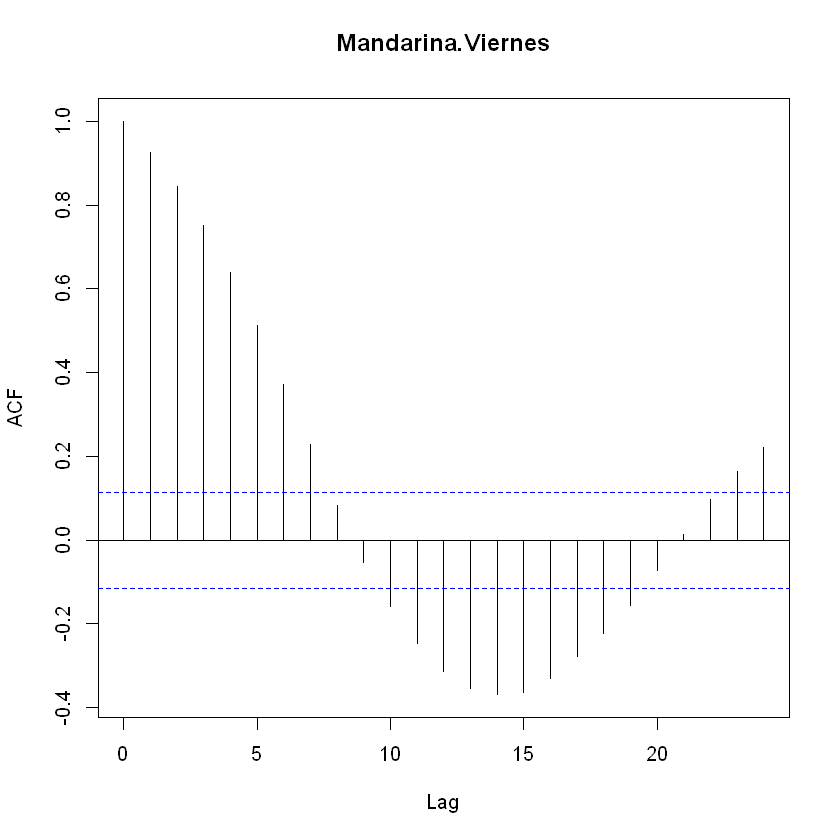


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.925 -0.080 -0.116 -0.205 -0.140 -0.198 -0.111 -0.112 -0.032  0.095  0.049 
    12     13     14     15     16     17     18     19     20     21     22 
 0.022  0.073  0.031  0.008  0.060  0.022 -0.064 -0.006  0.118  0.049  0.035 
    23     24 
-0.061 -0.014 


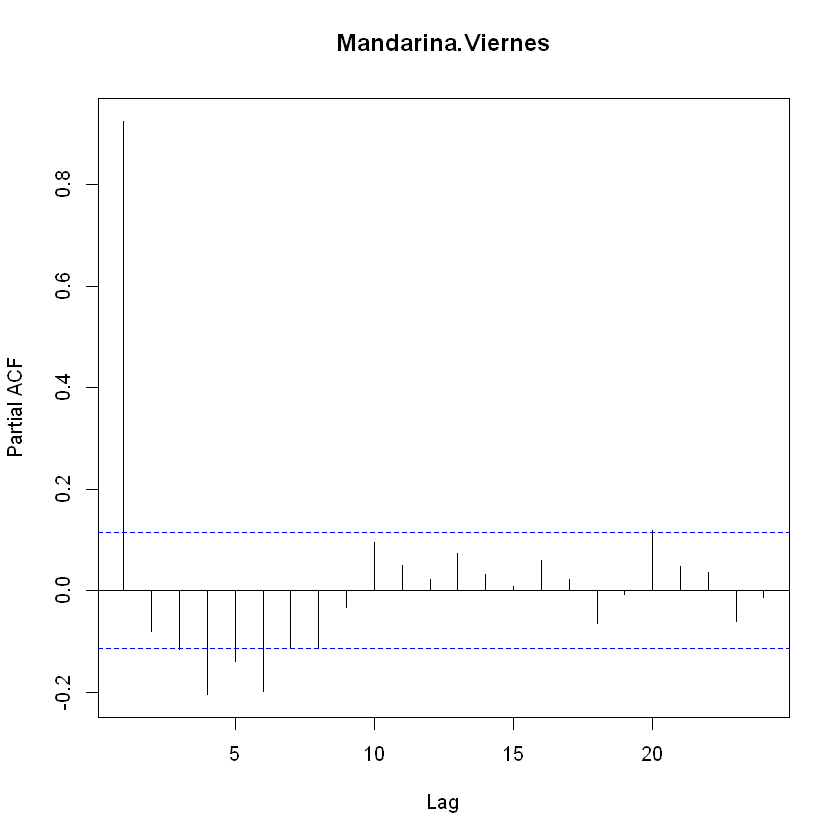


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.961 0.939 0.921 0.907 0.883 0.866 0.847 0.834 0.815 0.799 0.792 0.783 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.769 0.759 0.748 0.741 0.733 0.722 0.711 0.698 0.685 0.675 0.663 0.650 


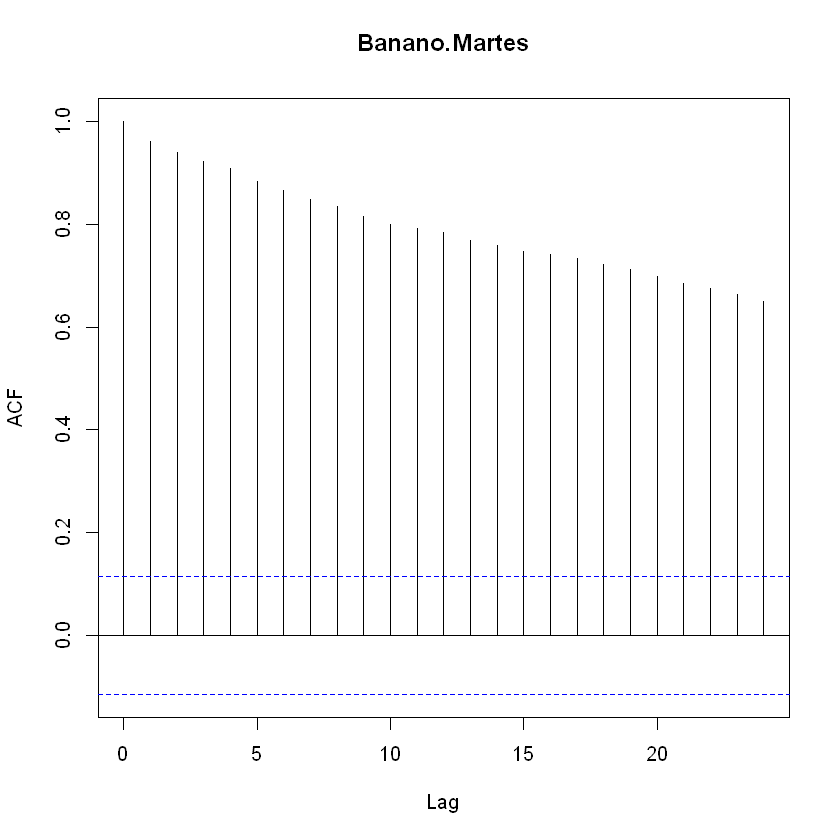


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.961  0.202  0.105  0.079 -0.111  0.041 -0.021  0.063 -0.035  0.011  0.123 
    12     13     14     15     16     17     18     19     20     21     22 
 0.015 -0.033  0.026 -0.026  0.053  0.032 -0.036 -0.017 -0.060 -0.003  0.036 
    23     24 
-0.029 -0.008 


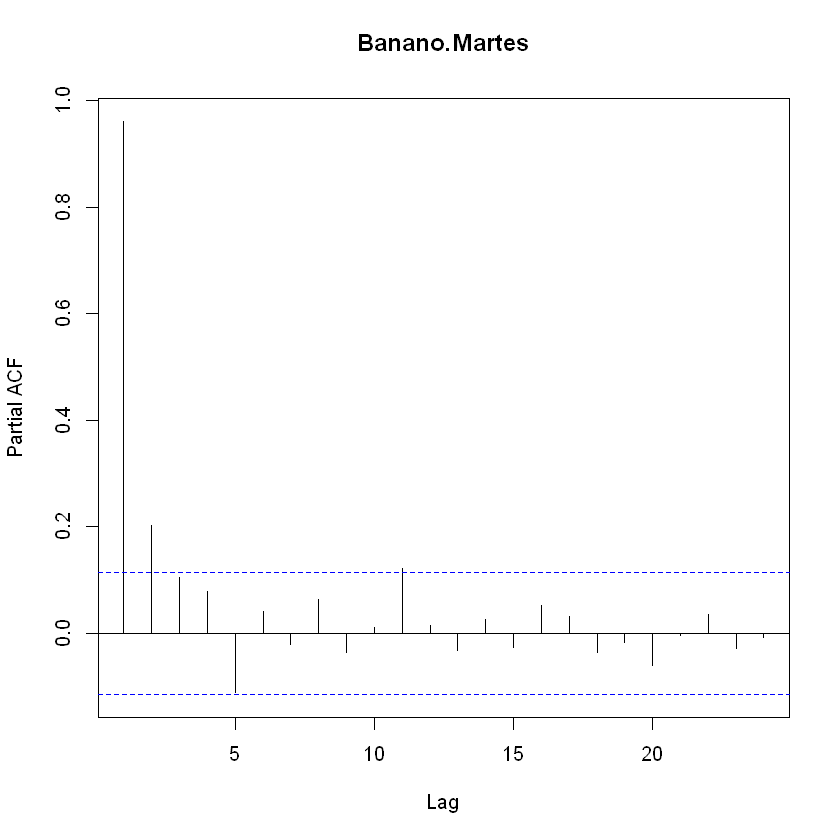


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.973 0.953 0.929 0.906 0.883 0.863 0.847 0.830 0.816 0.805 0.795 0.781 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.769 0.757 0.747 0.738 0.727 0.719 0.707 0.697 0.684 0.673 0.657 0.644 


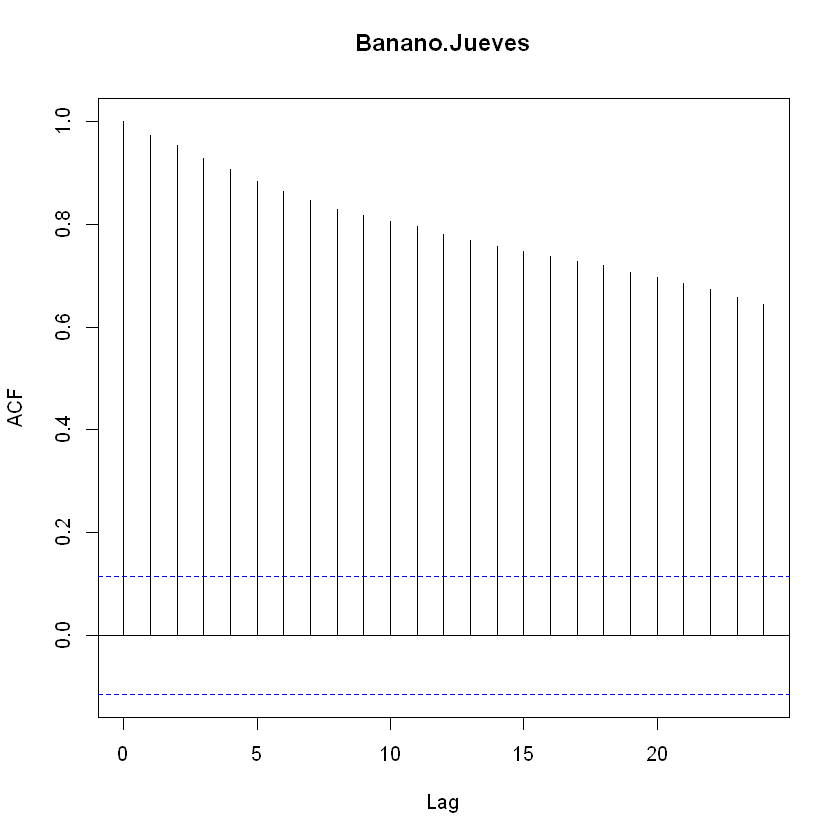


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.973  0.111 -0.077  0.002 -0.010  0.061  0.060 -0.017  0.053  0.063  0.021 
    12     13     14     15     16     17     18     19     20     21     22 
-0.091  0.025  0.033  0.049  0.015 -0.037  0.034 -0.048  0.014 -0.041  0.001 
    23     24 
-0.056  0.018 


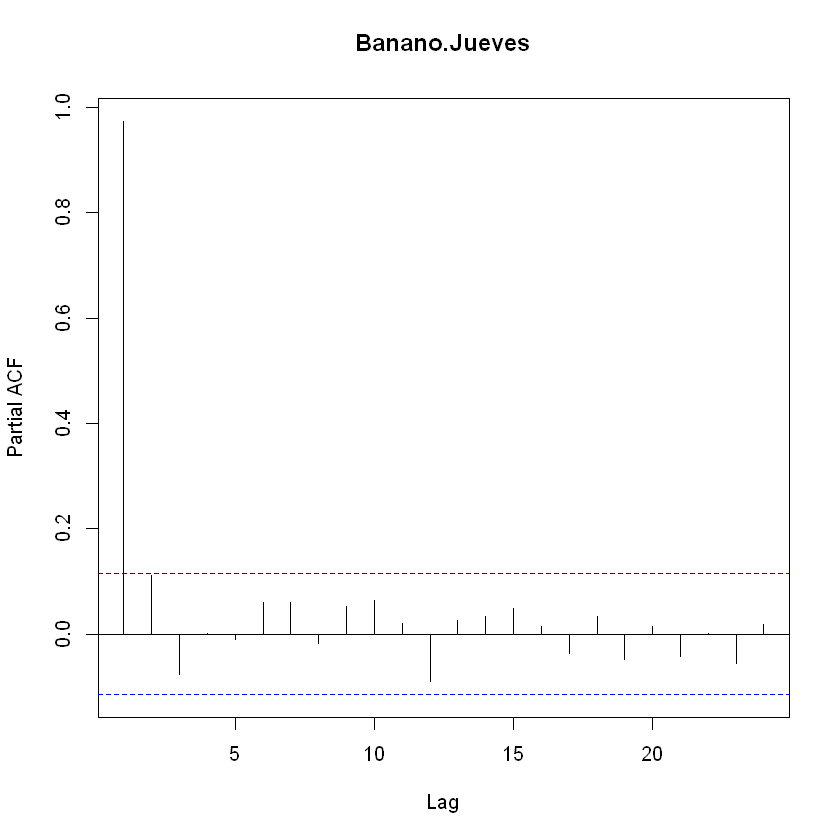


Autocorrelations of series 'DATAm[, i]', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.964 0.938 0.917 0.894 0.867 0.845 0.829 0.809 0.796 0.788 0.779 0.767 
   13    14    15    16    17    18    19    20    21    22    23    24 
0.757 0.744 0.736 0.728 0.719 0.706 0.698 0.687 0.676 0.664 0.655 0.643 


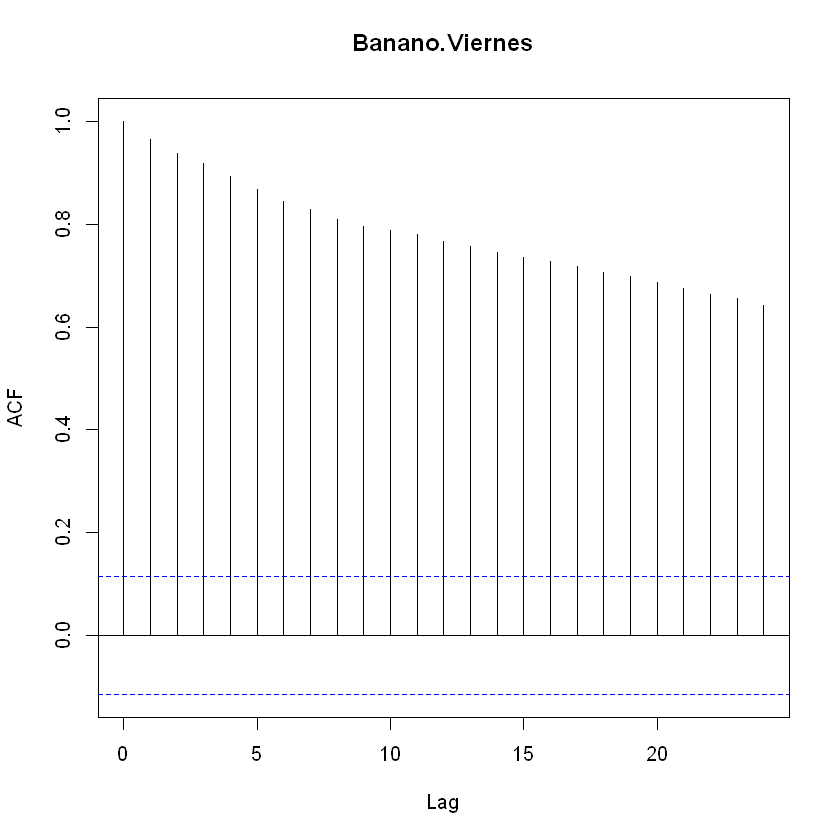


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.964  0.112  0.093 -0.032 -0.056  0.032  0.091 -0.027  0.079  0.094  0.013 
    12     13     14     15     16     17     18     19     20     21     22 
-0.036  0.024 -0.063  0.086  0.038 -0.017 -0.041  0.057 -0.060  0.019 -0.025 
    23     24 
 0.027 -0.029 


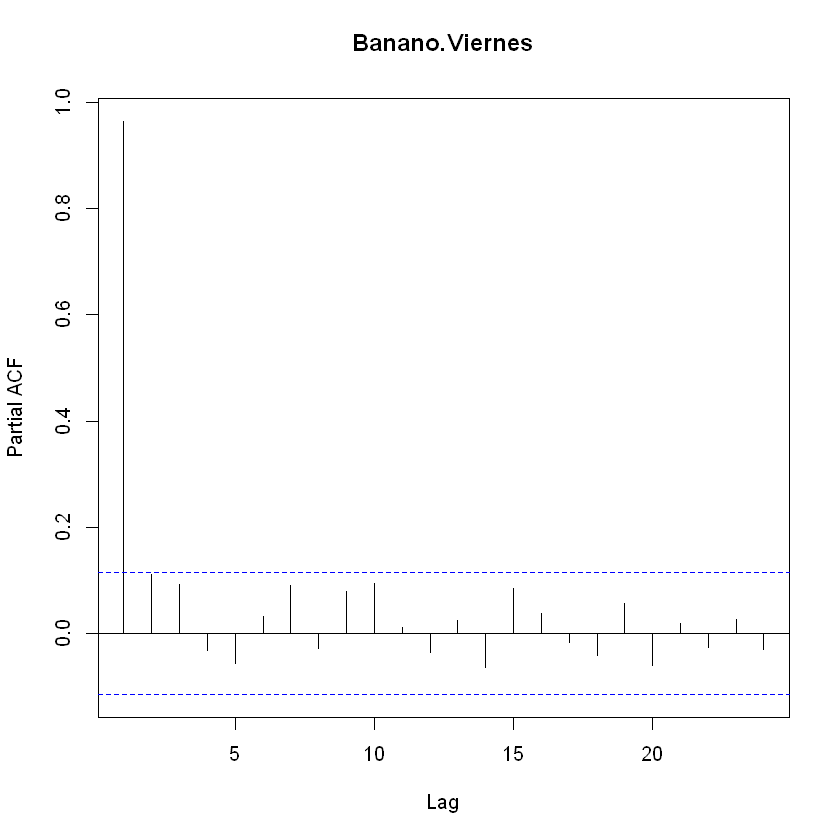


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.814  0.690  0.564  0.484  0.380  0.290  0.207  0.126  0.073 -0.010 
    11     12     13     14     15     16     17     18     19     20     21 
-0.030 -0.077 -0.066 -0.099 -0.094 -0.147 -0.166 -0.177 -0.154 -0.099 -0.045 
    22     23     24 
 0.041  0.094  0.181 


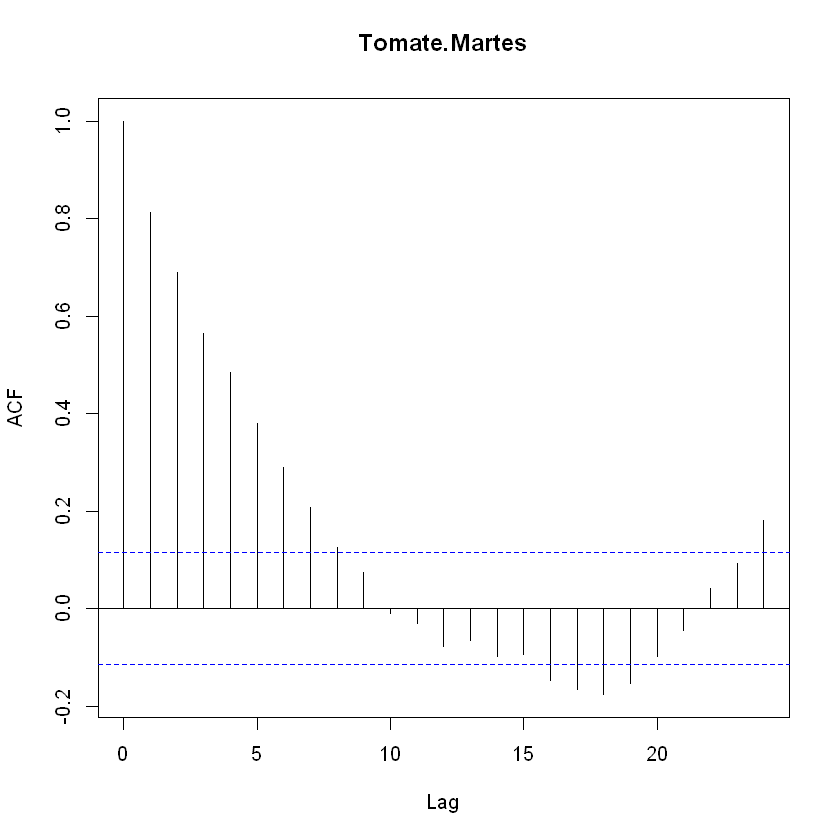


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.814  0.083 -0.056  0.058 -0.088 -0.048 -0.026 -0.066  0.017 -0.125  0.092 
    12     13     14     15     16     17     18     19     20     21     22 
-0.067  0.088 -0.081  0.030 -0.157 -0.008  0.005  0.071  0.112  0.089  0.115 
    23     24 
 0.041  0.095 


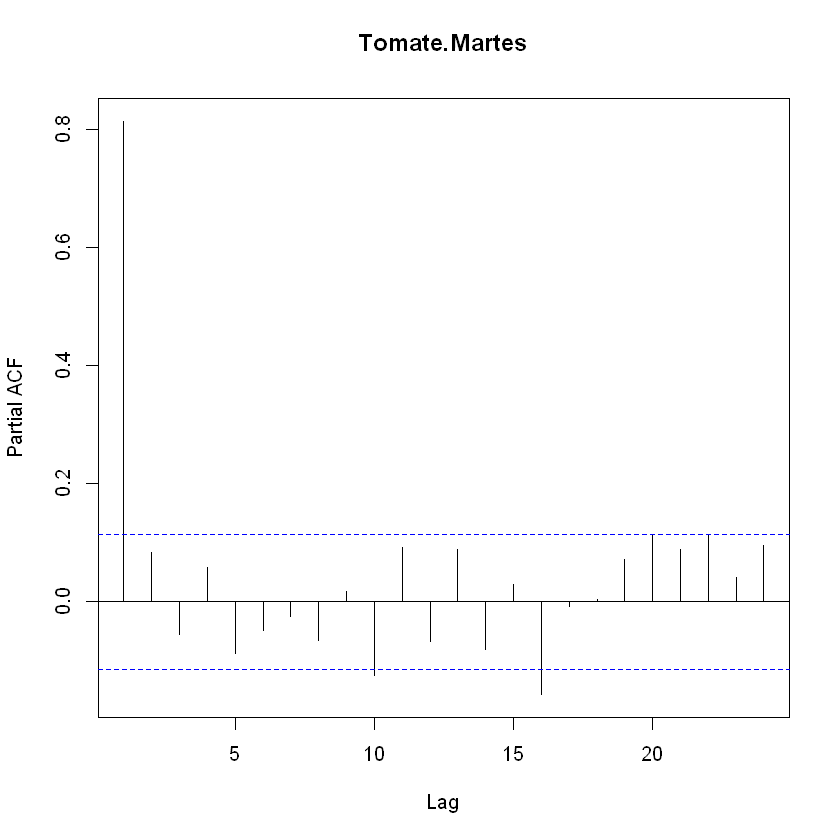


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.821  0.704  0.560  0.478  0.377  0.305  0.216  0.124  0.061 -0.003 
    11     12     13     14     15     16     17     18     19     20     21 
 0.002 -0.037 -0.047 -0.085 -0.091 -0.143 -0.150 -0.166 -0.134 -0.086 -0.028 
    22     23     24 
 0.037  0.086  0.176 


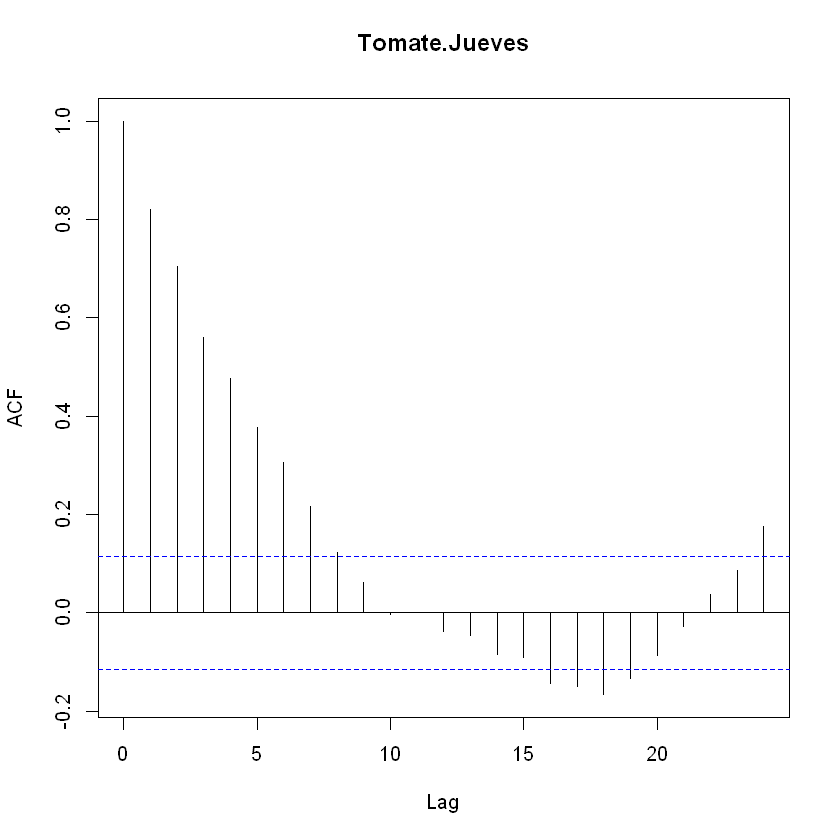


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.821  0.092 -0.126  0.083 -0.065 -0.008 -0.068 -0.106  0.030 -0.054  0.138 
    12     13     14     15     16     17     18     19     20     21     22 
-0.093 -0.006 -0.039 -0.007 -0.122  0.016 -0.009  0.104  0.106  0.072  0.071 
    23     24 
 0.027  0.155 


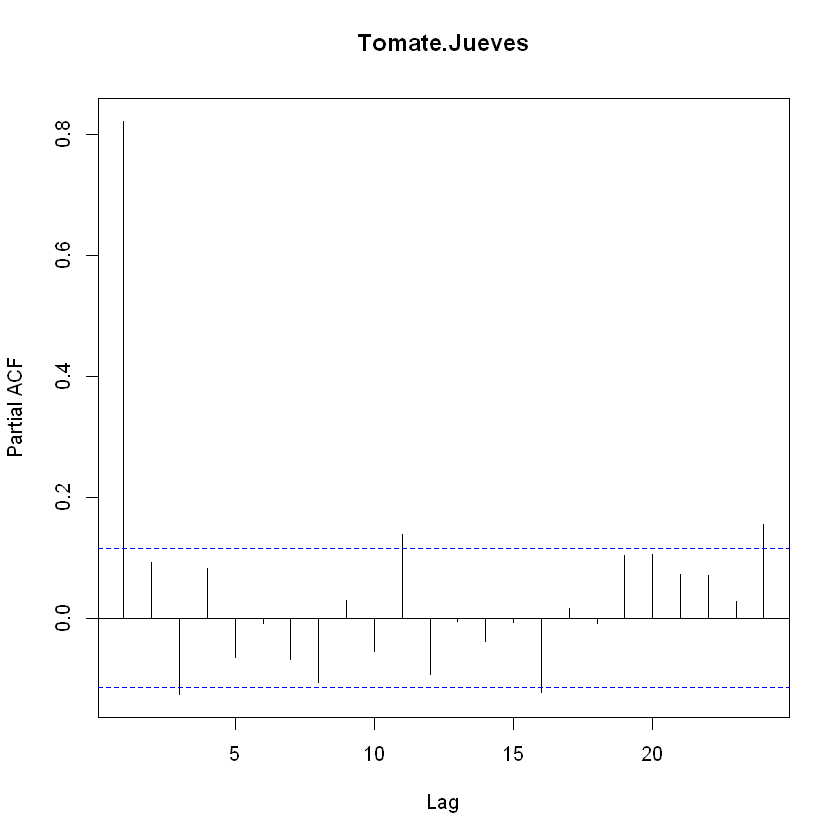


Autocorrelations of series 'DATAm[, i]', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.808  0.704  0.564  0.482  0.370  0.292  0.217  0.113  0.059 -0.038 
    11     12     13     14     15     16     17     18     19     20     21 
-0.060 -0.108 -0.102 -0.155 -0.151 -0.202 -0.199 -0.207 -0.169 -0.110 -0.059 
    22     23     24 
 0.015  0.055  0.144 


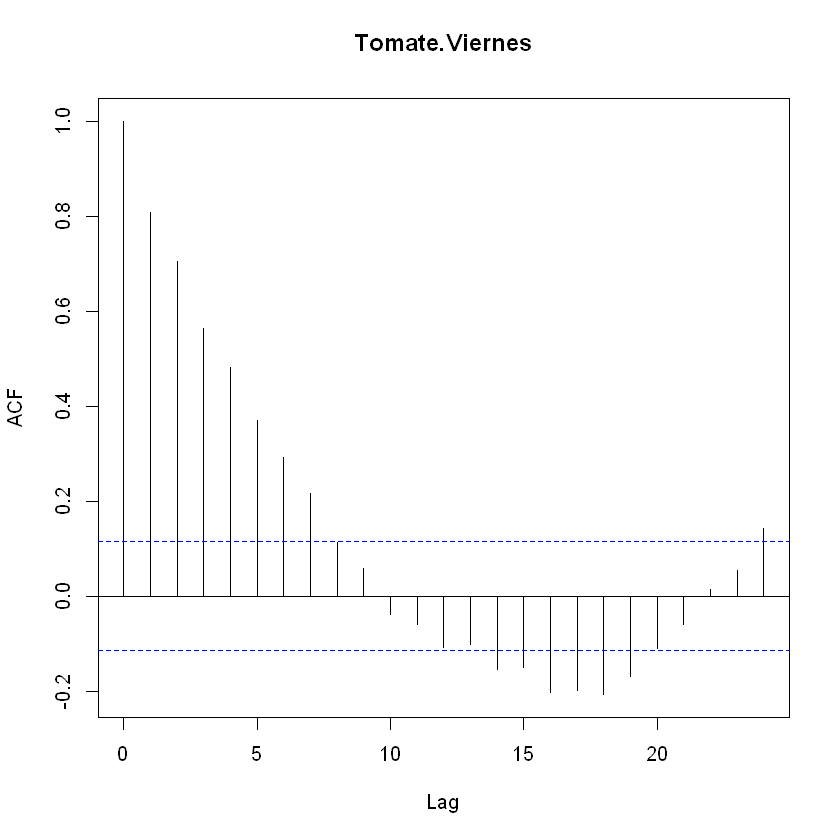


Partial autocorrelations of series 'DATAm[, i]', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.808  0.147 -0.120  0.053 -0.085 -0.016 -0.003 -0.161  0.043 -0.135  0.072 
    12     13     14     15     16     17     18     19     20     21     22 
-0.017  0.030 -0.112  0.041 -0.136  0.049 -0.025  0.093  0.098  0.050  0.064 
    23     24 
 0.040  0.090 


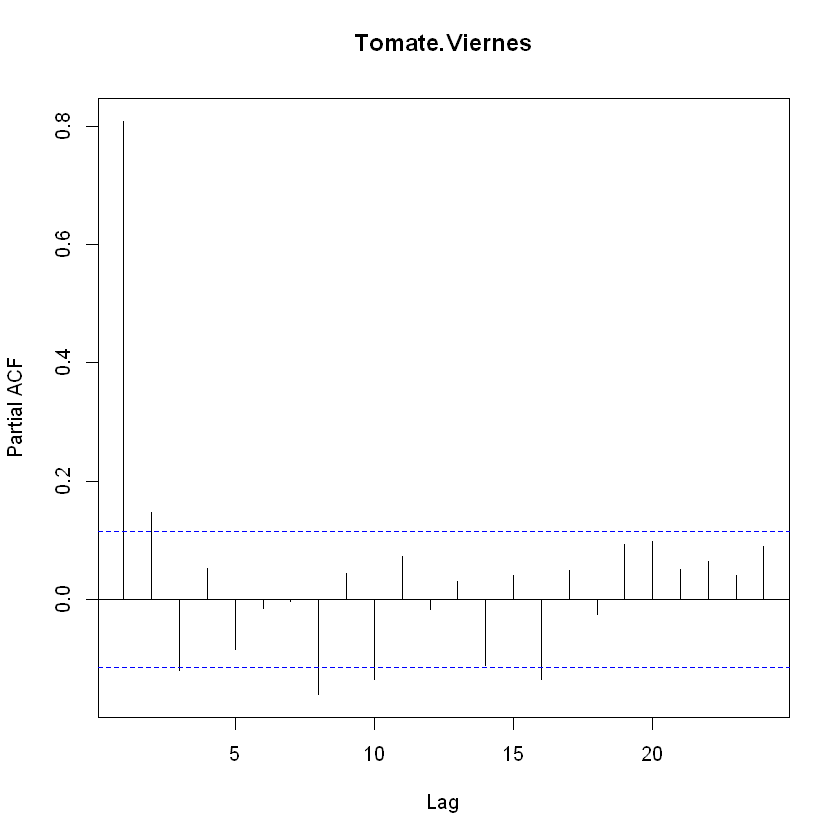

In [4]:
# Con los datos seleccionados para el modelado se realiza el análisis gráfico de estacionariedad y correlación

for (i in 2:length(DATAm) ) {
print(acf(DATAm[, i], main = names(DATAm[i])))  # autocorrelación simple
print(pacf(DATAm[, i], main = names(DATAm[i]))) # autocorrelación parcial
}

# Con estos resultados se comprueba que los datos se encuentran relacionados con sus reazagos y que estos son significativos
# a traves del tiempo (superan las bandas de bartel en PACF y en ACF caen lentamente mostrando correlación, lo que se 
# se puede contrastar con los resultados obtenidos por la prueba D).

[1] "Yuca.Martes"
[1] 3 1 1
        ar1         ar2         ar3         ma1 
-0.05613561  0.05937095 -0.14080856 -0.54821971 
[1] "Yuca.Jueves"
[1] 1 1 2
       ar1        ma1        ma2 
-0.8083702  0.1997912 -0.4572954 
[1] "Yuca.Viernes"
[1] 2 1 3
       ar1        ar2        ma1        ma2        ma3 
-0.2440142 -0.9248136 -0.2780571  0.7316251 -0.5432565 
[1] "Plátano.Martes"
[1] 0 1 1
       ma1 
-0.3475913 
[1] "Plátano.Jueves"
[1] 0 1 1
      ma1 
-0.373048 
[1] "Plátano.Viernes"
[1] 0 1 1
       ma1 
-0.3695871 
[1] "Papa.Martes"
[1] 1 1 2
       ar1        ma1        ma2 
 0.8374268 -1.1999528  0.3783740 
[1] "Papa.Jueves"
[1] 0 1 1
       ma1 
-0.1332914 
[1] "Papa.Viernes"
[1] 0 1 1
       ma1 
-0.1354373 
[1] "Piña.Martes"
[1] 0 1 3
       ma1        ma2        ma3 
-0.6111272  0.1754169 -0.1851766 
[1] "Piña.Jueves"
[1] 2 1 3
        ar1         ar2         ma1         ma2         ma3 
-0.06062203 -0.73174983 -0.43068118  0.75244065 -0.50378578 


Warning message in arima(DATAm[, i], order = or, include.mean = TRUE):
"possible convergence problem: optim gave code = 1"

[1] "Piña.Viernes"
[1] 2 1 3
       ar1        ar2        ma1        ma2        ma3 
-1.3072017 -0.8248940  0.7643339  0.2252778 -0.4400866 
[1] "Naranja.Martes"
[1] 0 1 1
       ma1 
-0.2381369 
[1] "Naranja.Jueves"
[1] 0 1 2
        ma1         ma2 
-0.16089314 -0.07984073 
[1] "Naranja.Viernes"
[1] 0 1 2
       ma1        ma2 
-0.1262791 -0.1013398 
[1] "Mandarina.Martes"
[1] 3 0 4
         ar1          ar2          ar3          ma1          ma2          ma3 
 2.076754736 -1.311501646  0.195659117 -1.259663526  0.406140431  0.003295619 
         ma4    intercept 
 0.076299927  7.175060050 


Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in arima(DATAm[, i], order = or, include.mean = TRUE):
"possible convergence problem: optim gave code = 1"

[1] "Mandarina.Jueves"
[1] 3 0 3
         ar1          ar2          ar3          ma1          ma2          ma3 
 1.882895483 -0.936517373  0.009827531 -1.121543430  0.186246437  0.159716399 
   intercept 
 7.163973903 
[1] "Mandarina.Viernes"
[1] 3 0 2
       ar1        ar2        ar3        ma1        ma2  intercept 
 2.7118274 -2.4982007  0.7748390 -1.8249143  0.9095764  7.1519914 
[1] "Banano.Martes"
[1] 3 1 1
       ar1        ar2        ar3        ma1 
-0.8772237 -0.3917215 -0.3255103  0.6480976 
[1] "Banano.Jueves"
[1] 3 1 2
       ar1        ar2        ar3        ma1        ma2 
 1.1999687 -0.1626858 -0.2058606 -1.4261796  0.5110288 
[1] "Banano.Viernes"
[1] 1 1 1
       ar1        ma1 
 0.6495024 -0.8485347 
[1] "Tomate.Martes"
[1] 1 1 0
       ar1 
-0.1537937 
[1] "Tomate.Jueves"
[1] 3 1 3
       ar1        ar2        ar3        ma1        ma2        ma3 
-0.6653856  0.5519888  0.5486498  0.4757873 -0.7170361 -0.7114490 
[1] "Tomate.Viernes"
[1] 1 1 1
       ar1        ma1 
-0

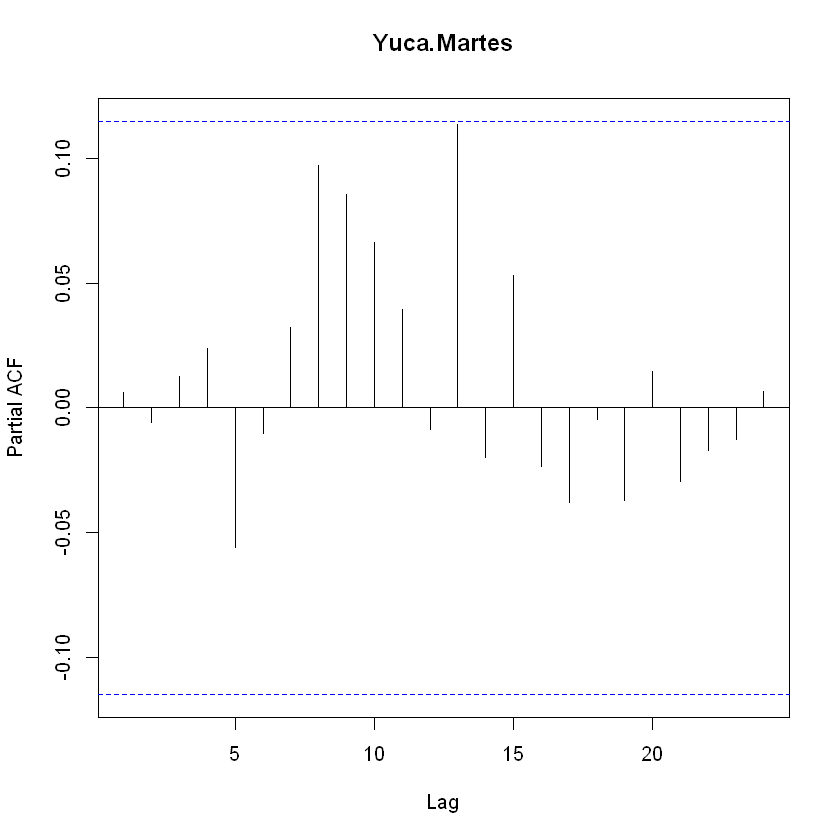

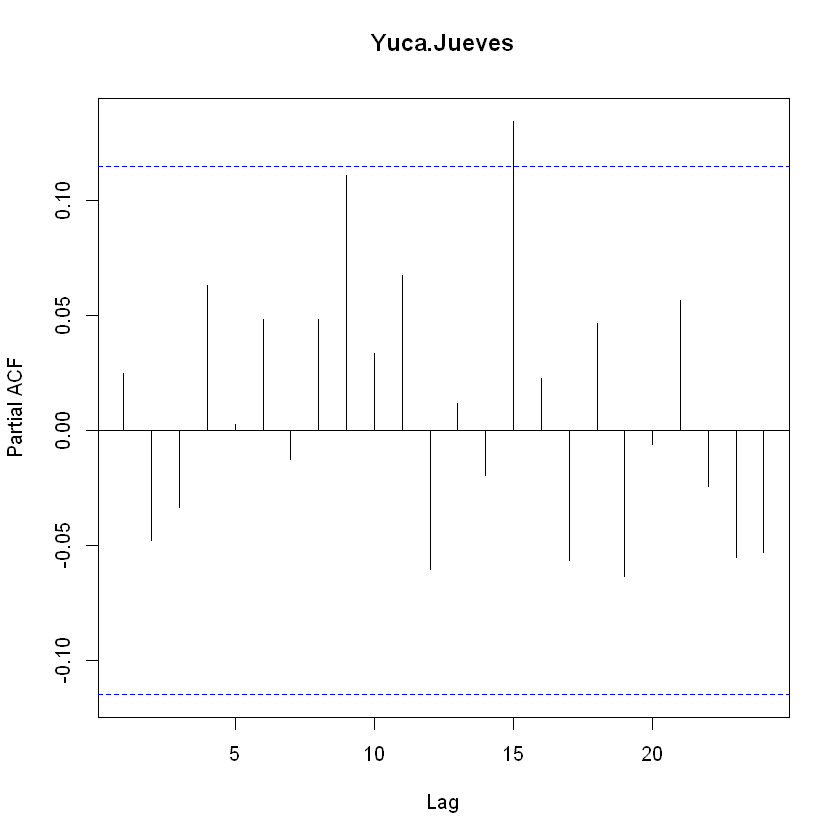

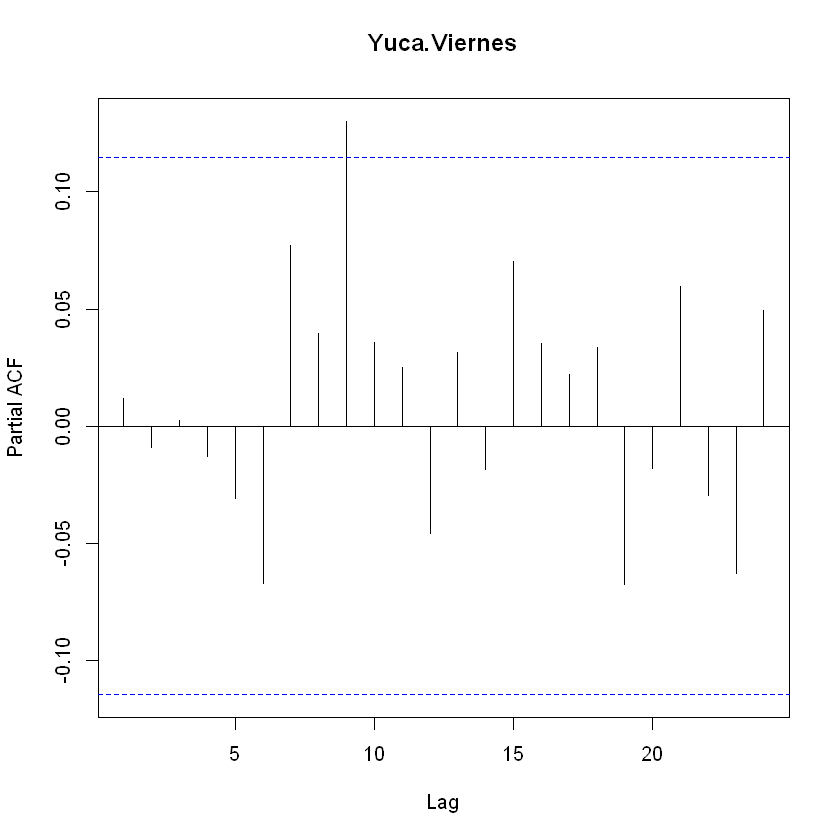

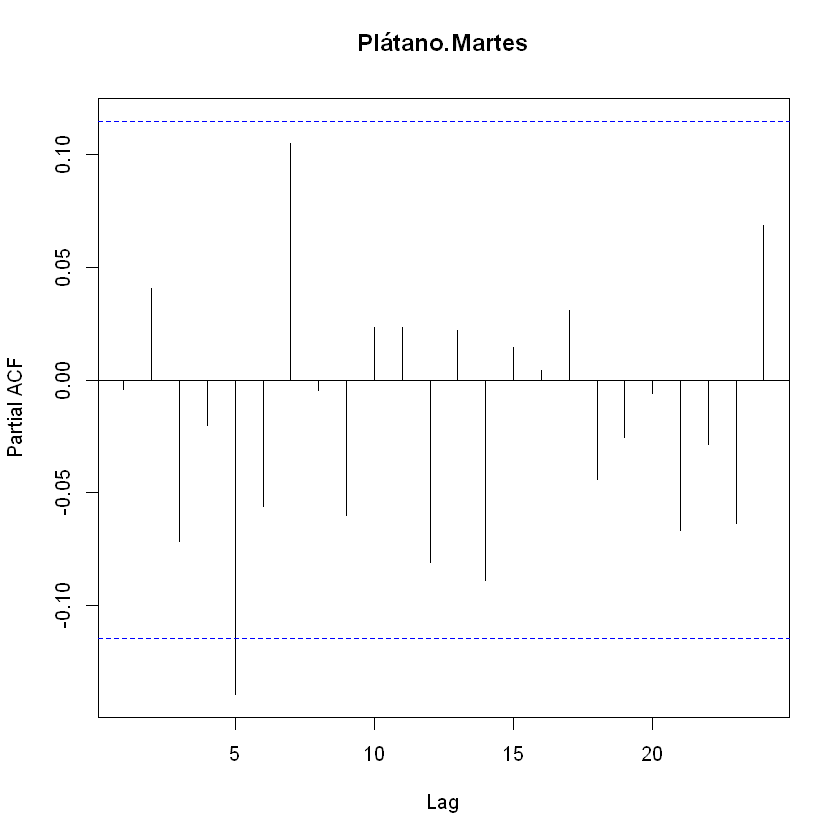

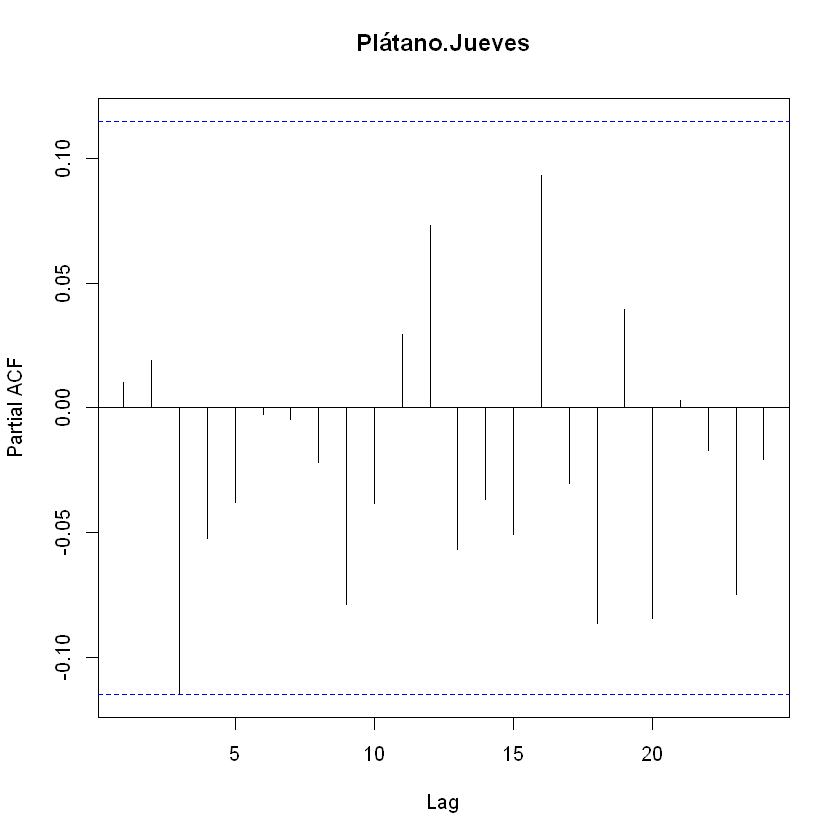

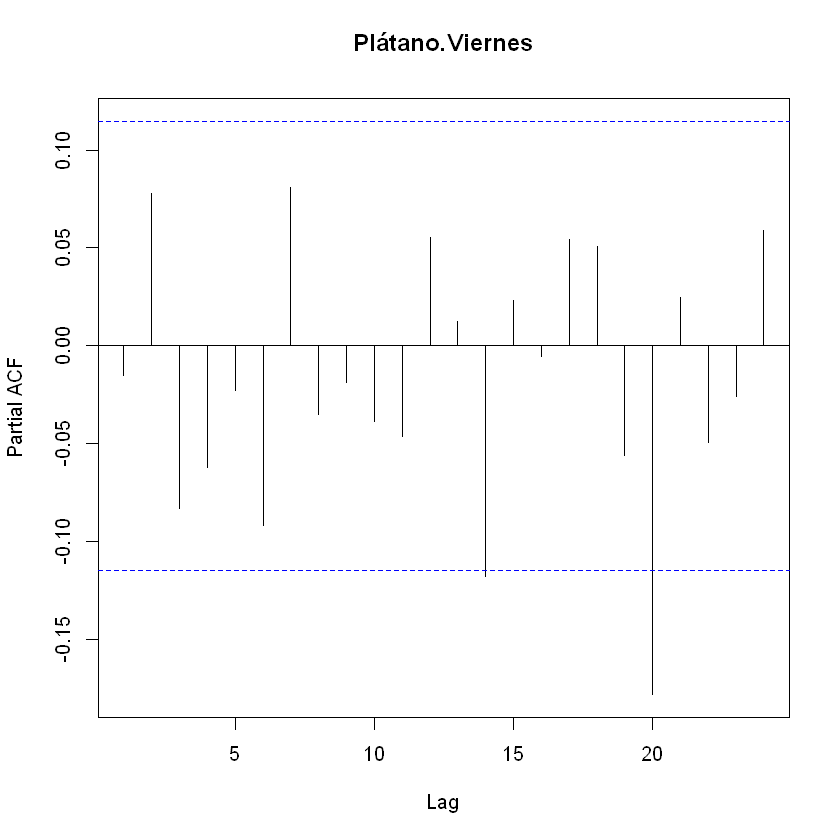

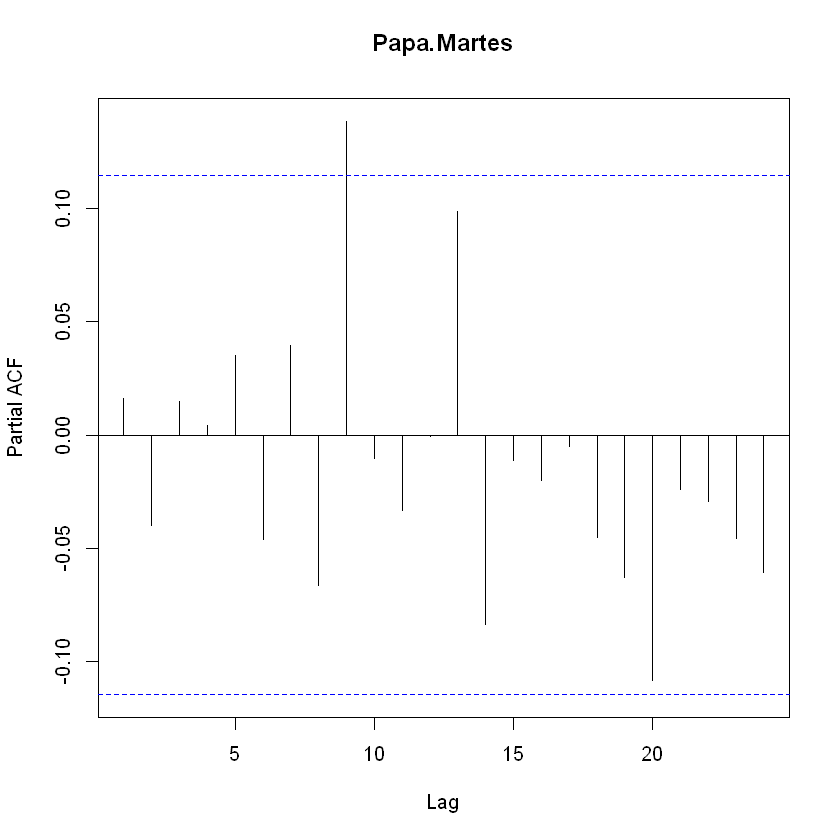

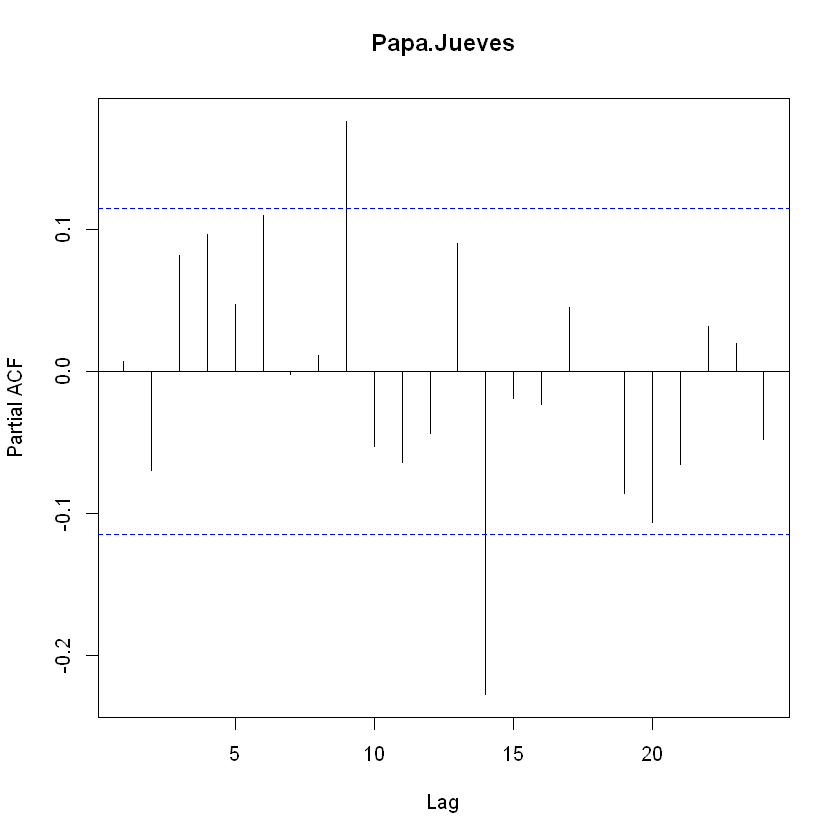

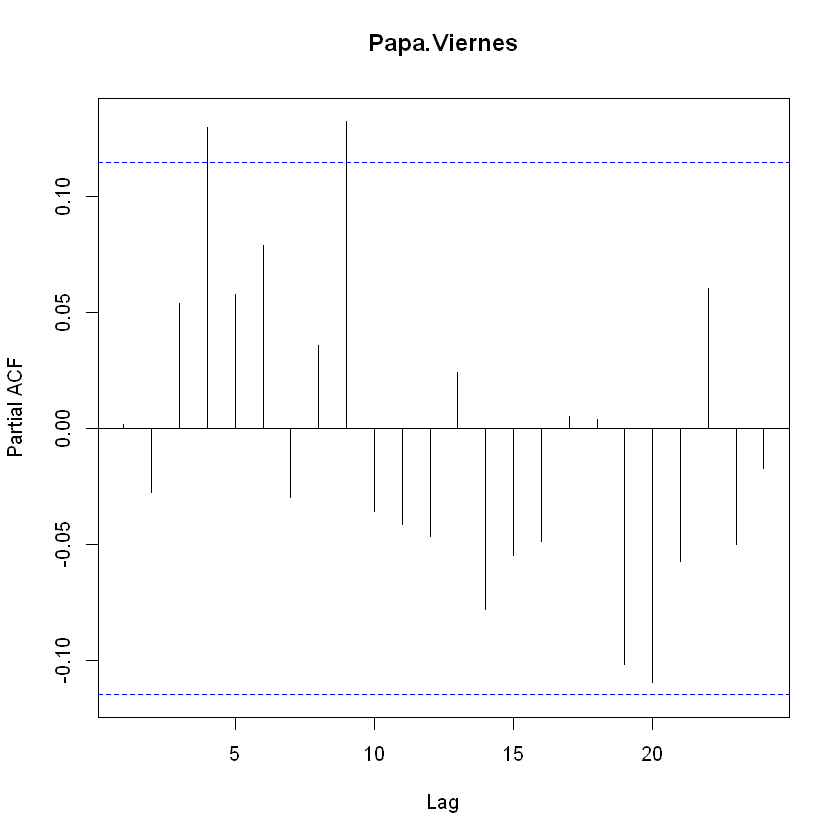

Warning message in arima(DATAm[, i], order = or, include.mean = TRUE):
"possible convergence problem: optim gave code = 1"

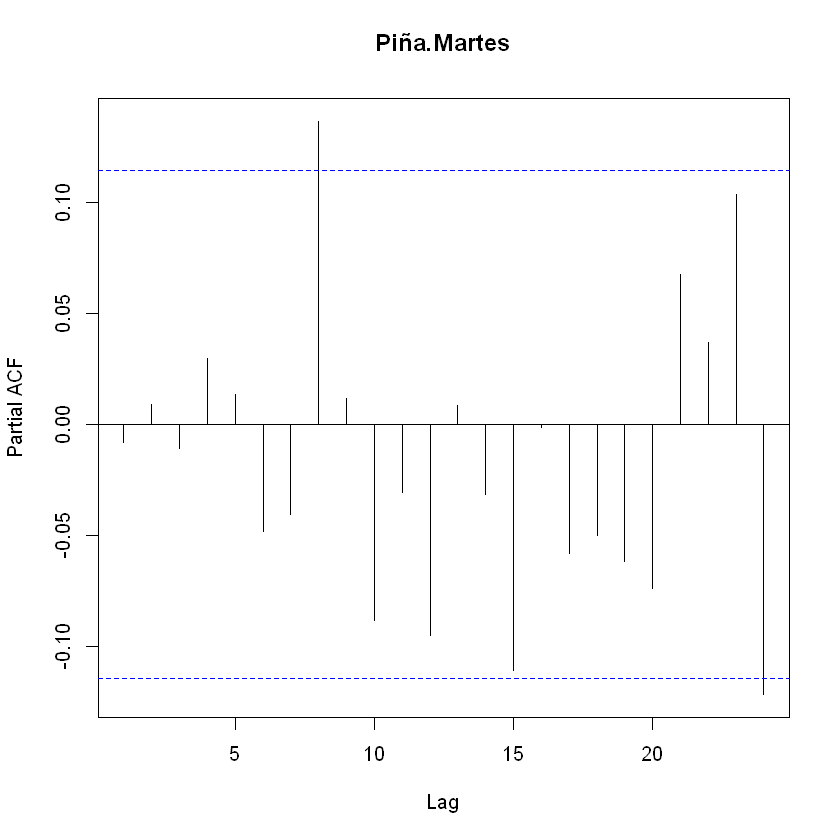

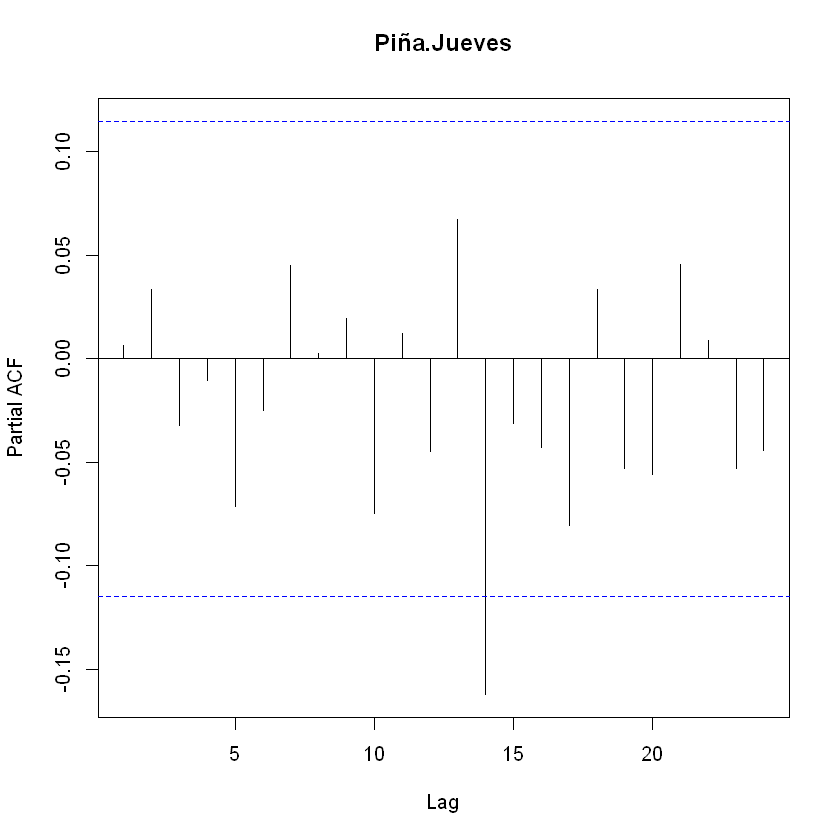

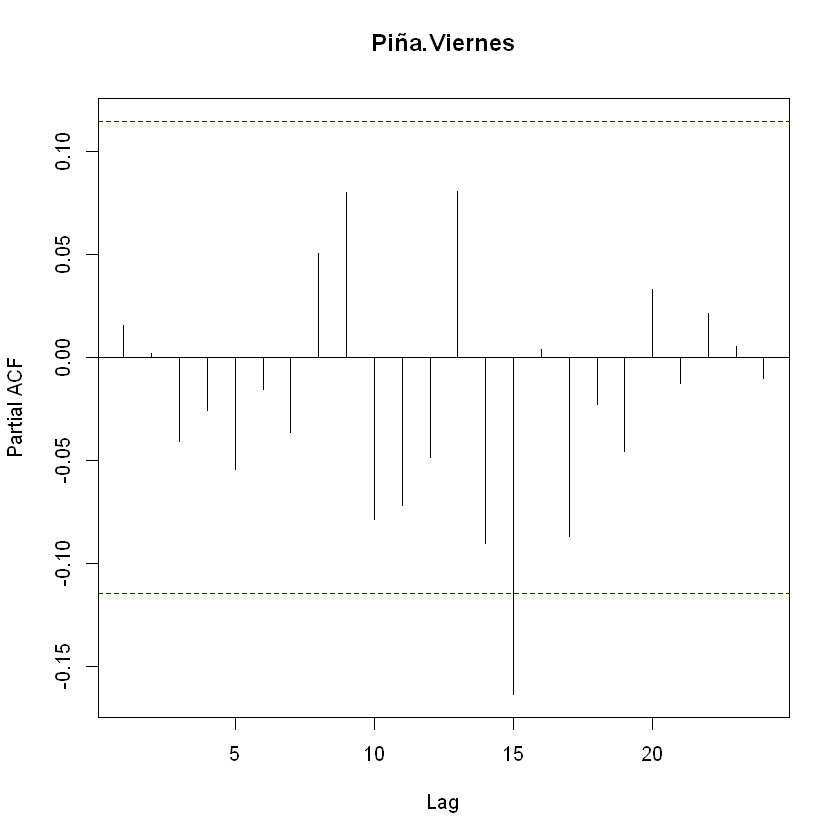

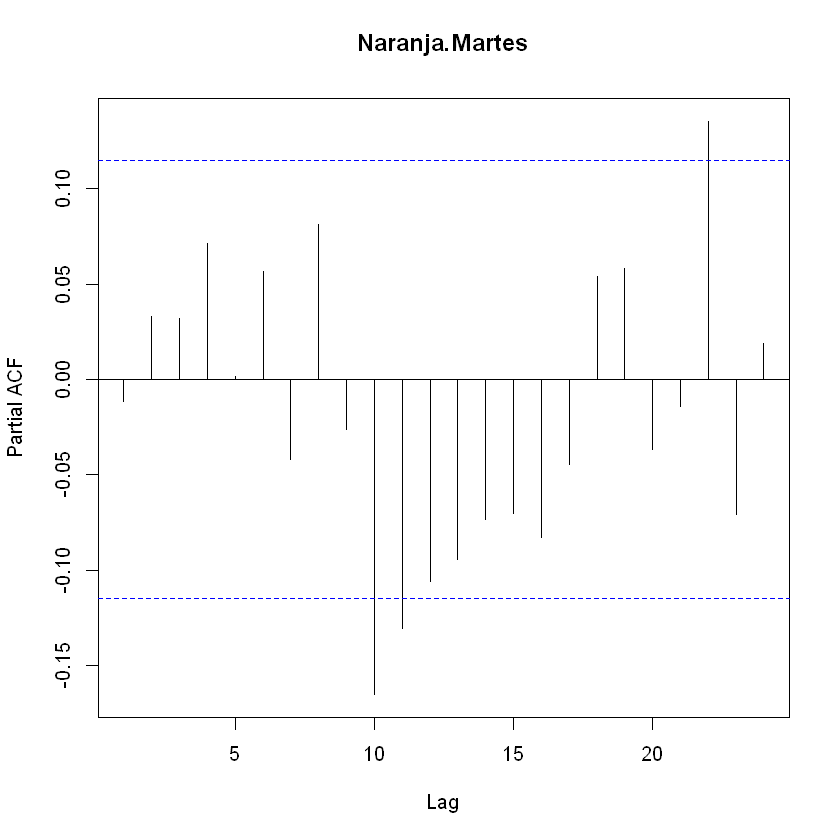

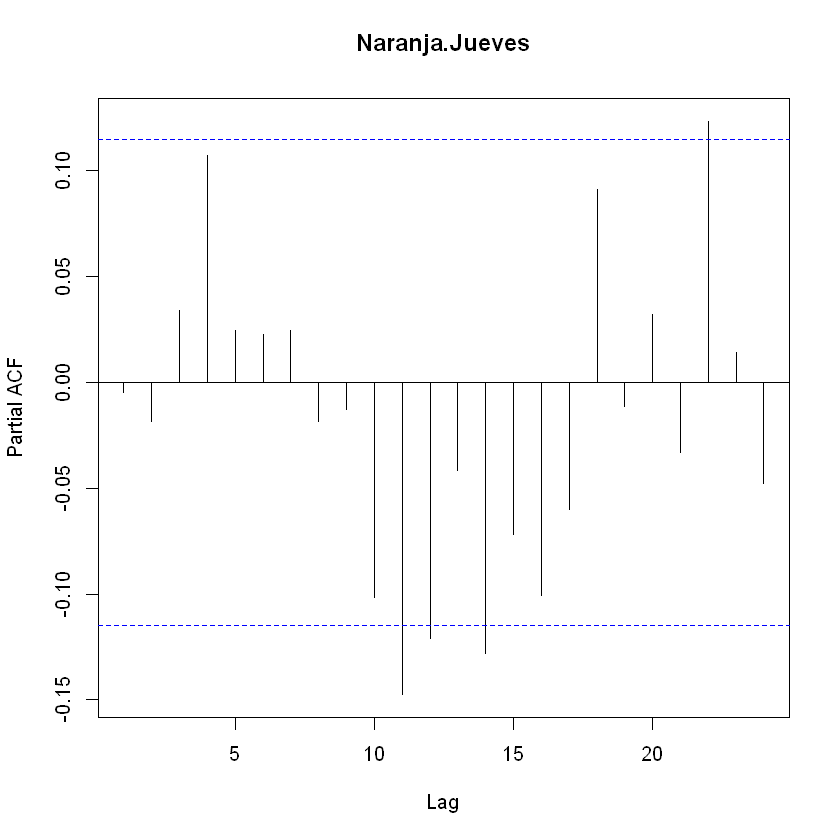

Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in arima(DATAm[, i], order = or, include.mean = TRUE):
"possible convergence problem: optim gave code = 1"

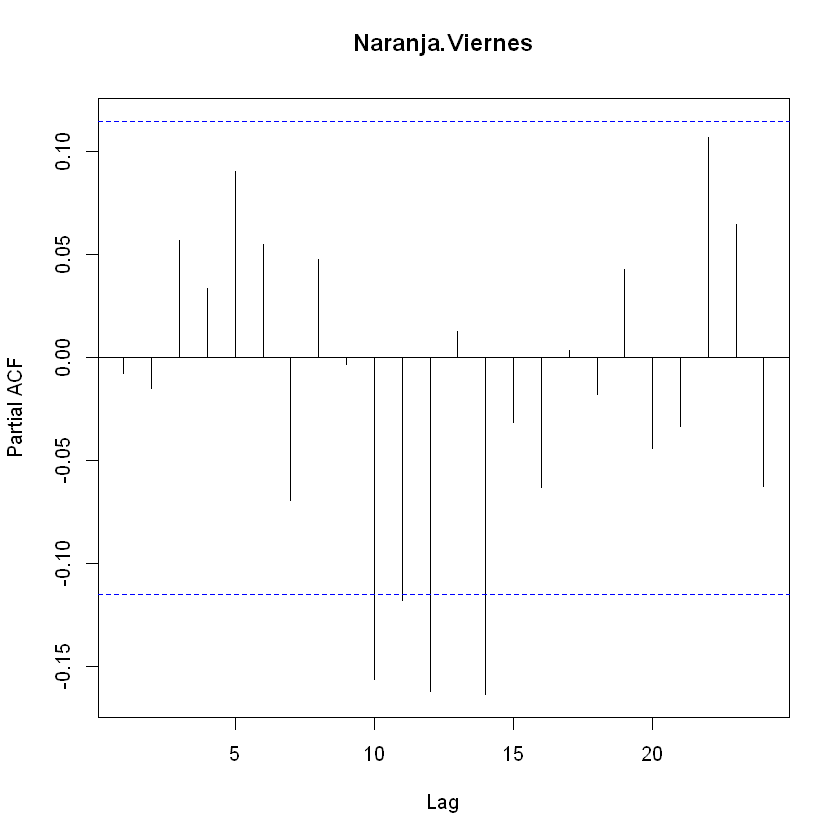

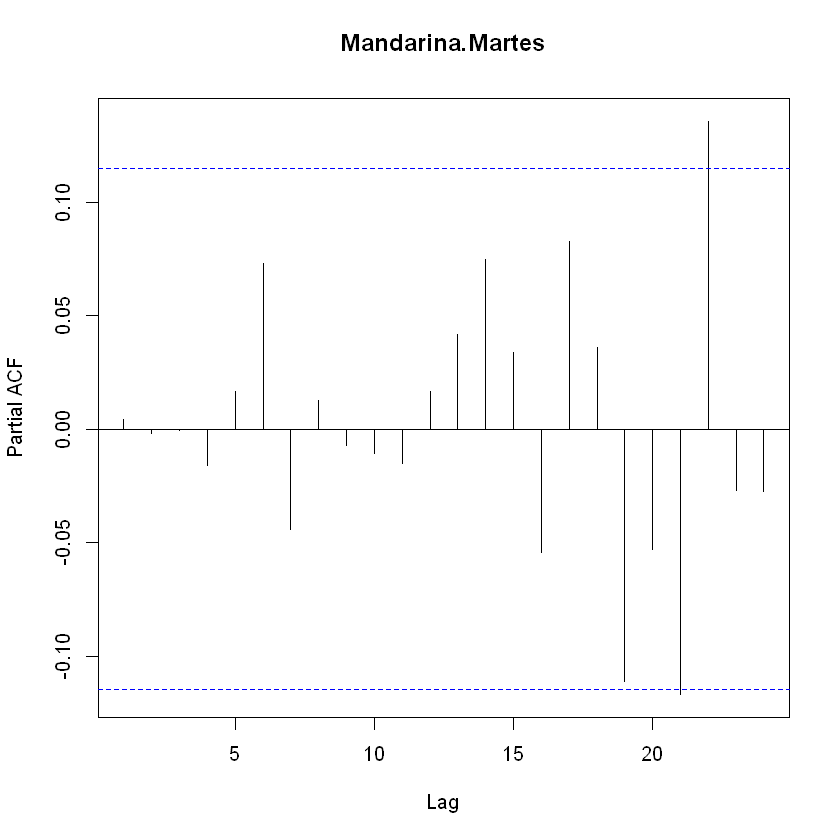

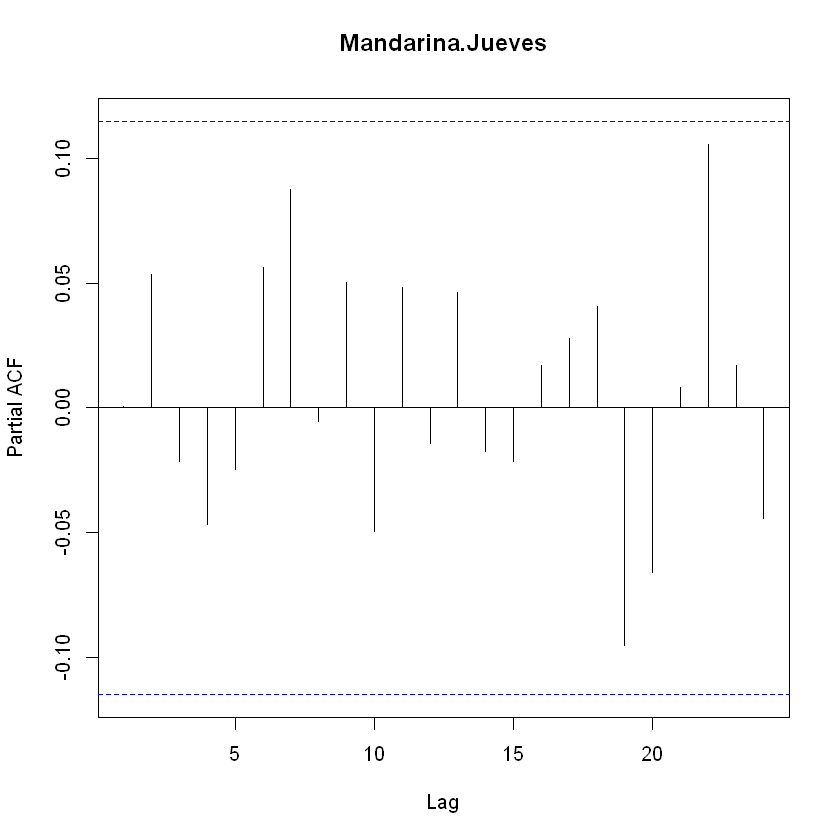

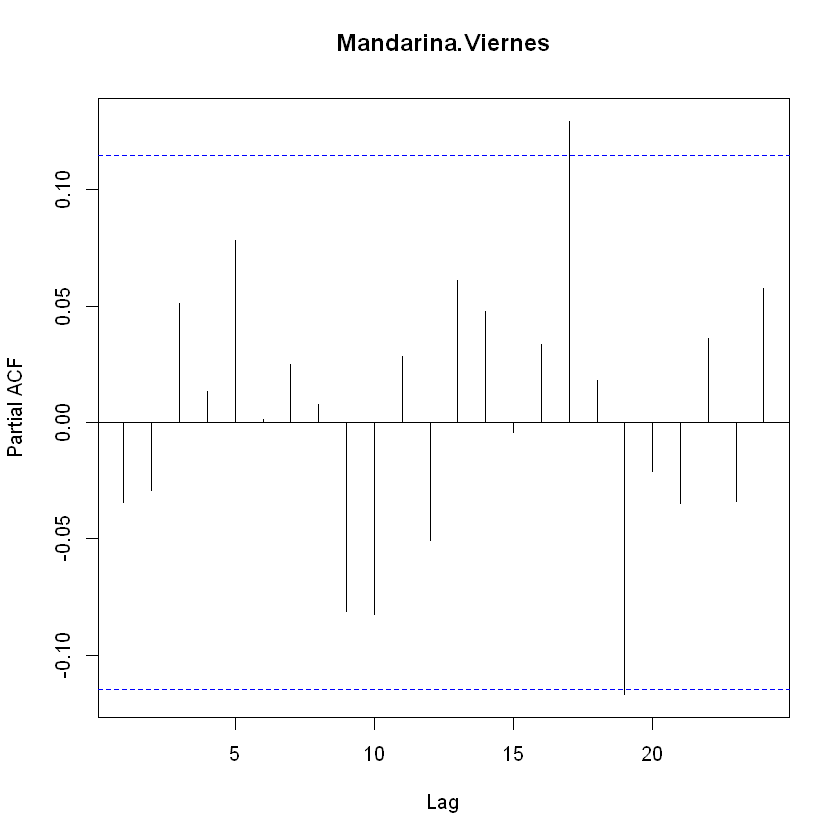

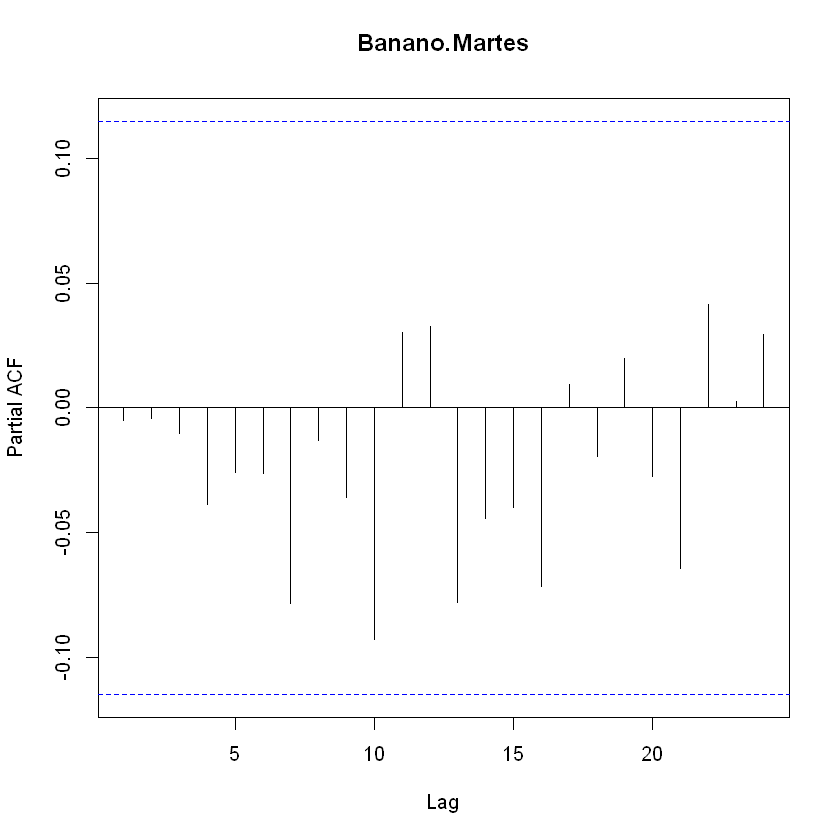

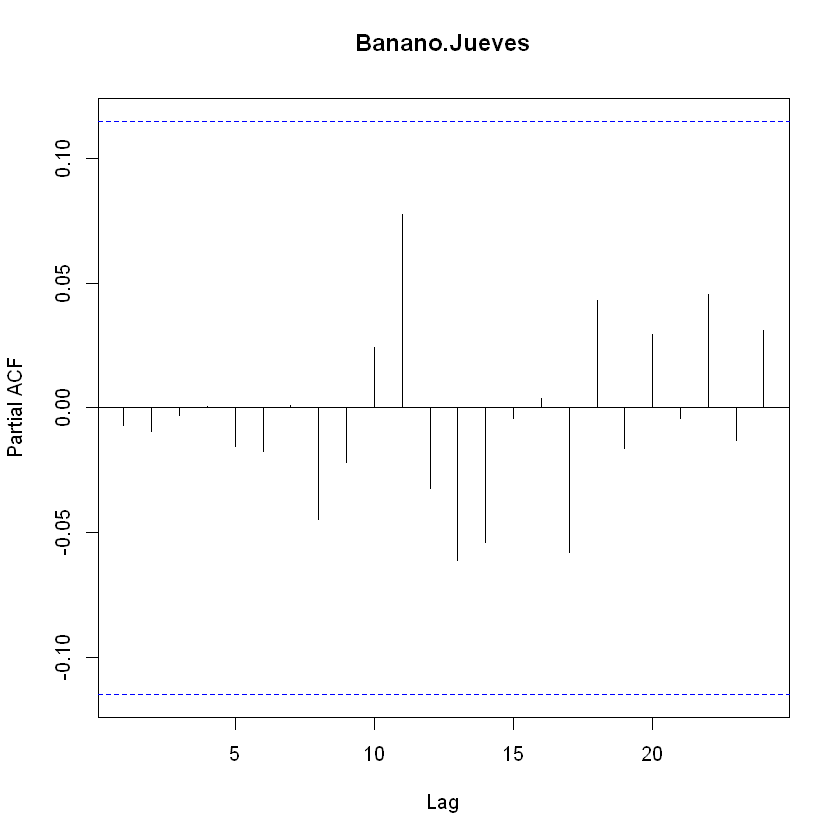

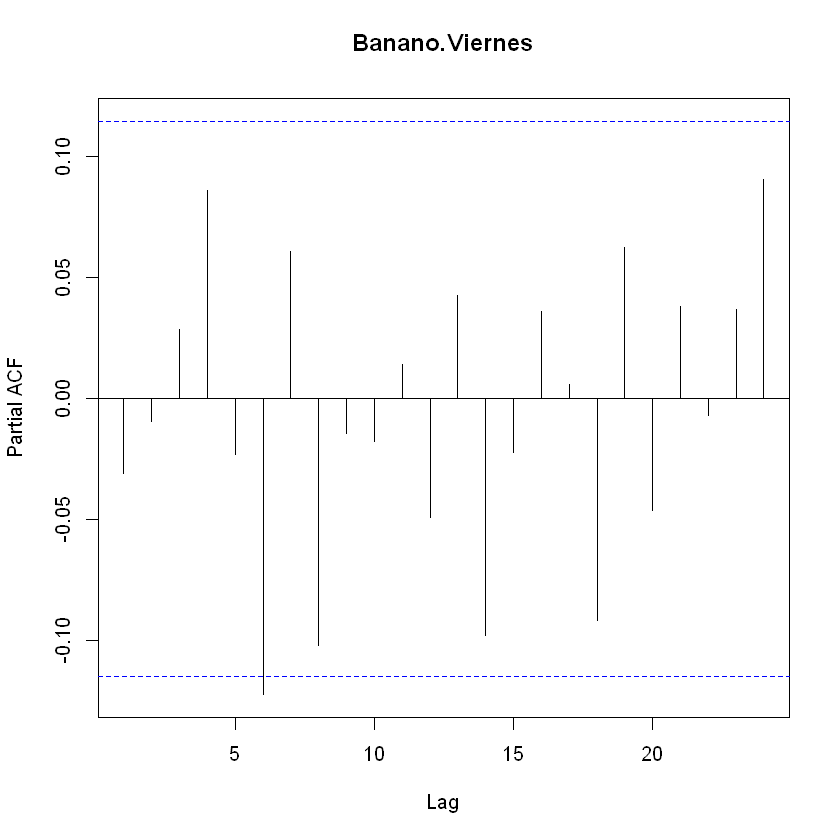

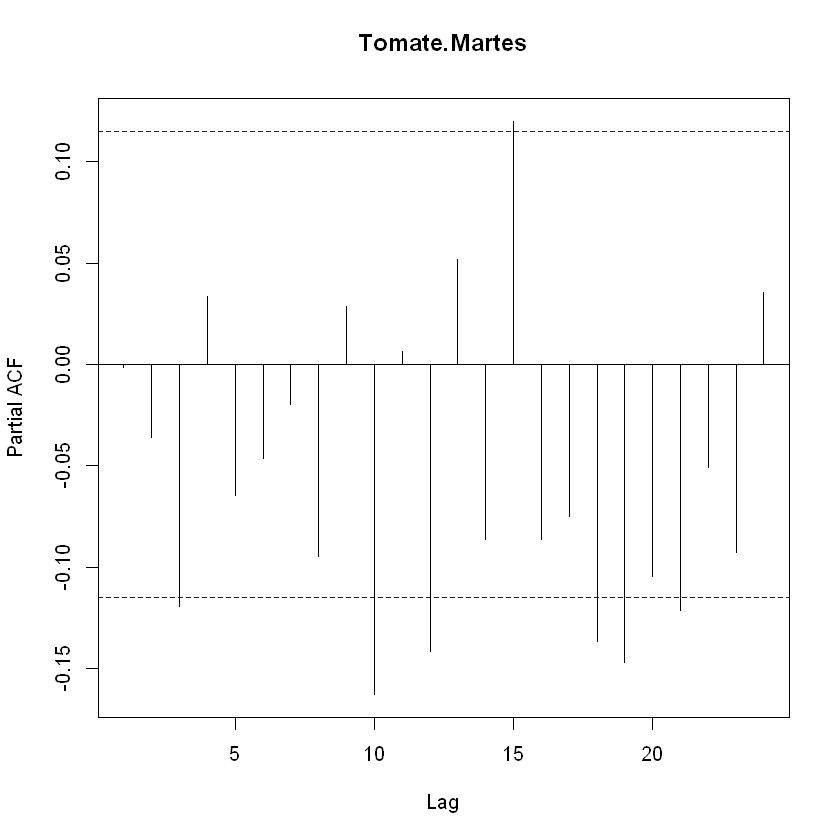

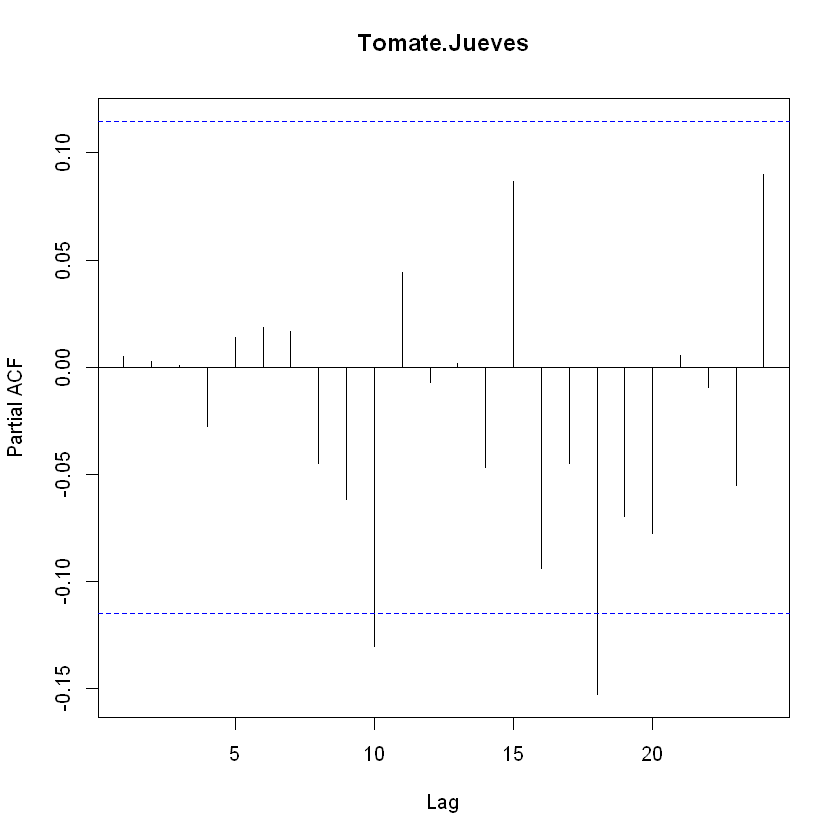

Warning message in arima(DATAm[, i], order = c(or[i - 1, 1], or[i - 1, 2], or[i - :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in arima(DATAm[, i], order = c(or[i - 1, 1], or[i - 1, 2], or[i - :
"possible convergence problem: optim gave code = 1"

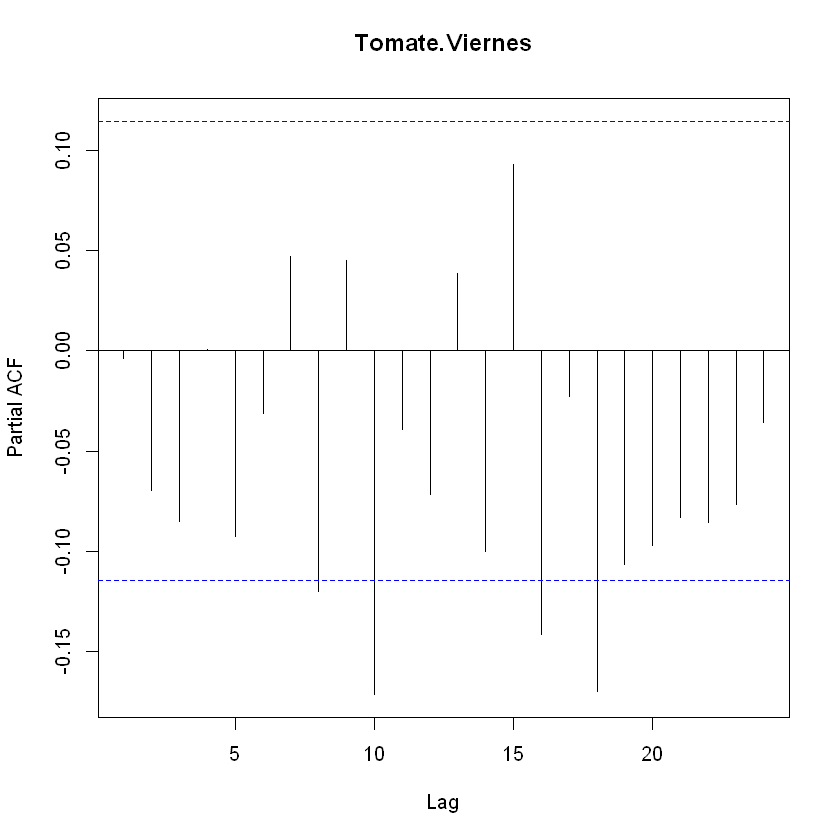

In [26]:
# A partir de lo anterior se procede a determinar los modelos ARIMA propuestos por la función, para ello se genera un 
# bucle el cual determina los parametros del modelo y genera automaticamente el mismo

for (i in 2:length(DATAm) ) {
or<-arimaorder(auto.arima(DATAm[, i], ic= "aic"))
mo<-arima(DATAm[,i], order = or, include.mean = TRUE)
print(names(DATAm[i]))                                  # Nombre del modelo
print(arimaorder(auto.arima(DATAm[, i], ic= "aic")))    # Parámetros del modelo
print(mo$coef)                                          # Coeficientes del modelo
}    

# Luego se realiza el análisis gráfico con el objetivo de identificar si los modelos son precisos
for (i in 2:length(DATAm) ) {
or<-arimaorder(auto.arima(DATAm[, i], ic= "aic"))
mo<-arima(DATAm[,i], order = or, include.mean = TRUE)
b<-pacf(mo$residuals, main = names(DATAm[i])) 
}

# Debido a que los modelos no son precisos ya que en diversos rezagos según el producto se superan las bandas
# de significancia se deben generar nuevos modelos que cumplan la condición, para ello se hace uso de la gráfica 
# de autocorrelación parcial para identificar los rezagos significativos, los cuales son utilizados para
# generar los nuevos modelos

AIC<- data.frame(matrix(0, 24, 3))
or<-matrix(0, 24, 3)  # Matriz de orden de los modelos base

for (i in 2:length(DATAm) ) {
or[i-1,]<-arimaorder(auto.arima(DATAm[, i], ic= "aic"))
mo<-arima(DATAm[,i], order = c(or[i-1,1], or[i-1,2], or[i-1,3]), include.mean = TRUE)
AIC[i-1, 1]<- mo$aic 
}

In [33]:
# Rezagos identificados a traves de las graficas PACF
r<-matrix(c(14,12,10,2,2,21,14,14,10,24,14,16,22,23,15,22,8,20,3,1,1,16,24,16), byrow=T)
options(warm=-1) #eliminar mensajes alerta

or1<-or  # Matriz de orden de los modelos base para ser modificada con AR

# Se modifica el valor AR del modelo original y se guarda en or1
for (i in 2:length(DATAm) ) {
or[i-1,]<-arimaorder(auto.arima(DATAm[, i], ic= "aic"))
mo<-arima(DATAm[,i], order = c(r[i-1,], or[i-1,2], or[i-1,3]), include.mean = TRUE)
or1[i-1,]<-c(r[i-1,], or[i-1,2], or[i-1,3])
AIC[i-1, 2]<- mo$aic 
#print(mo)
}

or2<-or  # Matriz de orden de los modelos base para ser modificada con MA

# Se modifica el valor MA del modelo original y se guarda en or2
options(warm=-1)
for (i in 2:length(DATAm) ) {
or[i-1,]<-arimaorder(auto.arima(DATAm[, i], ic= "aic"))
mo<-arima(DATAm[,i], order = c(or[i-1,1], or[i-1,2], r[i-1,]), include.mean = TRUE)
or2[i-1,]<-c(or[i-1,1], or[i-1,2], r[i-1,])
AIC[i-1, 3]<- mo$aic 
#print(mo)
}

# Nombres de los productos segun el AIC
name<-colnames(DATAm[,2:25])
AIC$NOMBRE<-name
AIC

Warning message in arima(DATAm[, i], order = c(or[i - 1, 1], or[i - 1, 2], r[i - :
"possible convergence problem: optim gave code = 1"Warning message in arima(DATAm[, i], order = c(or[i - 1, 1], or[i - 1, 2], r[i - :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"

X1,X2,X3,NOMBRE
-499.55125,-490.656644,-492.108458,Yuca.Martes
-533.07940,-523.914100,-527.596735,Yuca.Jueves
-508.46771,-501.580265,-515.889310,Yuca.Viernes
-510.25937,-512.707574,-508.281277,Plátano.Martes
-449.08693,-451.137912,-447.393275,Plátano.Jueves
-480.78778,-469.553931,-472.954879,Plátano.Viernes
-370.20910,-371.360029,-359.663203,Papa.Martes
-434.44992,-446.645980,-441.681054,Papa.Jueves
-440.11767,-447.780896,-437.290240,Papa.Viernes
-569.48266,-555.053113,-561.864802,Piña.Martes


[1]  3  1 14
[1] -492.1085
[1]  1  1 12
[1] -527.5967
[1]  2  1 10
[1] -515.8893
[1] 2 1 1
[1] -512.7076
[1] 2 1 1
[1] -451.1379
[1]  0  1 21
[1] -472.9549
[1] 14  1  2
[1] -371.36
[1] 14  1  1
[1] -446.646
[1] 10  1  1
[1] -447.7809
[1]  0  1 24
[1] -561.8648
[1] 14  1  3
[1] -561.9213
[1]  2  1 16
[1] -563.5571
[1] 22  1  1
[1] -487.3217
[1]  0  1 23
[1] -493.511
[1]  0  1 15
[1] -519.1544
[1] 22  0  4
[1] -316.0897
[1] 3 0 8
[1] -305.1074
[1] 20  0  2
[1] -351.0664
[1] 3 1 1
[1] -902.4636
[1] 3 1 1
[1] -952.9895
[1] 1 1 1
[1] -860.0332
[1]  1  1 16
[1] 2.823844
[1]  3  1 24
[1] -18.4167
[1] 16  1  1
[1] 5.916649


Warning message in arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), :
"possible convergence problem: optim gave code = 1"


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.002 -0.001  0.007  0.000  0.015 -0.003  0.014 -0.002 -0.001  0.004 -0.007 
    12     13     14     15     16     17     18     19     20     21     22 
 0.016  0.012 -0.032  0.030  0.023 -0.005  0.013 -0.052  0.013 -0.018  0.014 
    23     24 
 0.009  0.012 


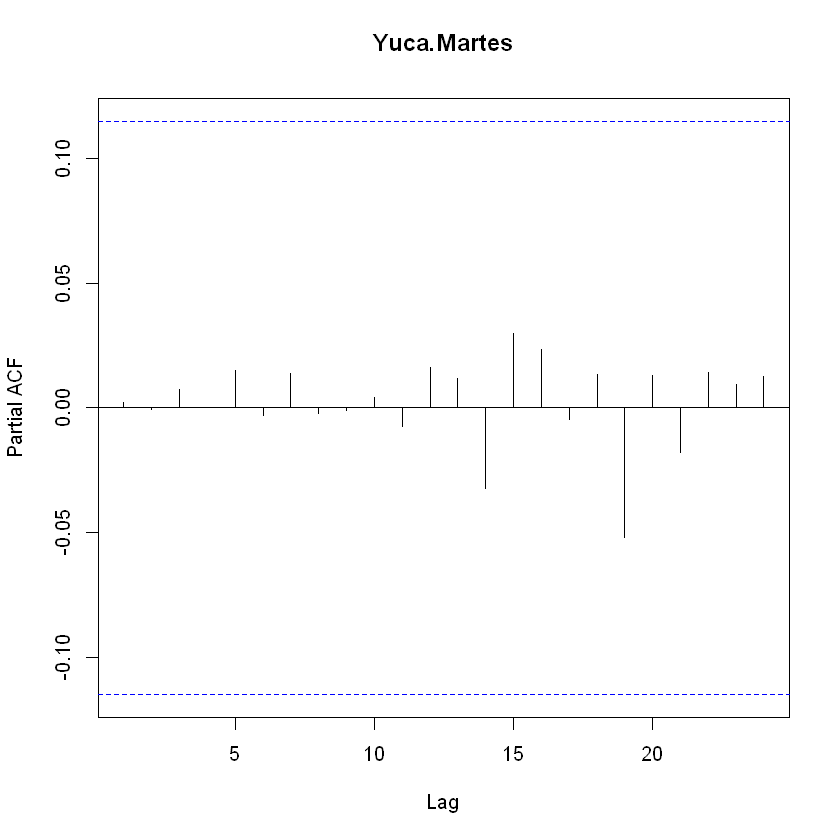


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.000 -0.006  0.009 -0.011  0.040 -0.015  0.038 -0.016 -0.010  0.038 -0.057 
    12     13     14     15     16     17     18     19     20     21     22 
 0.014 -0.024  0.023  0.139  0.025 -0.056  0.034 -0.026 -0.016  0.053 -0.033 
    23     24 
-0.064 -0.026 


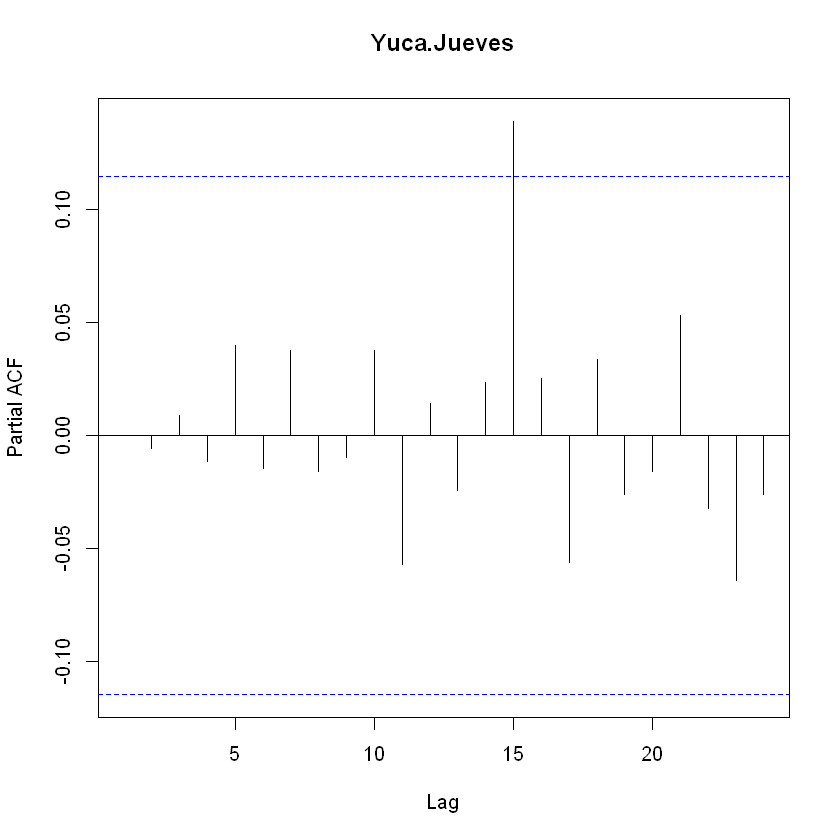


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.005  0.003  0.000 -0.004 -0.016  0.022  0.003 -0.005  0.020 -0.003  0.031 
    12     13     14     15     16     17     18     19     20     21     22 
-0.065  0.020 -0.034  0.017  0.100  0.007 -0.018 -0.021  0.007 -0.034  0.026 
    23     24 
-0.032  0.003 


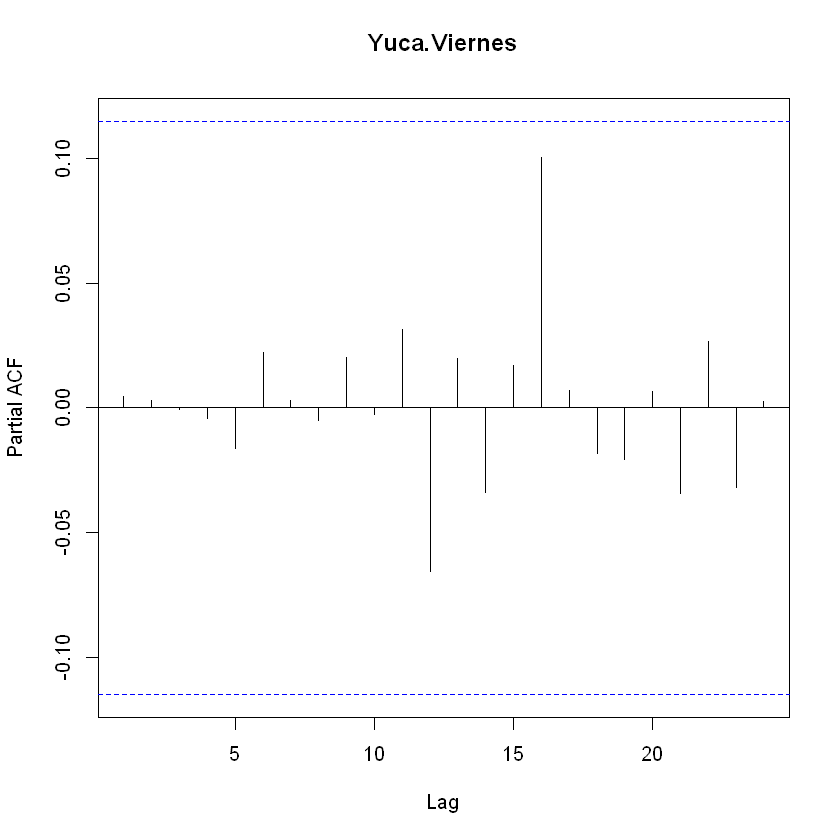


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.009 -0.028 -0.031  0.015 -0.120 -0.028  0.128  0.022 -0.026  0.053  0.041 
    12     13     14     15     16     17     18     19     20     21     22 
-0.049  0.043 -0.075  0.031  0.017  0.051 -0.028 -0.003  0.007 -0.048 -0.021 
    23     24 
-0.053  0.076 


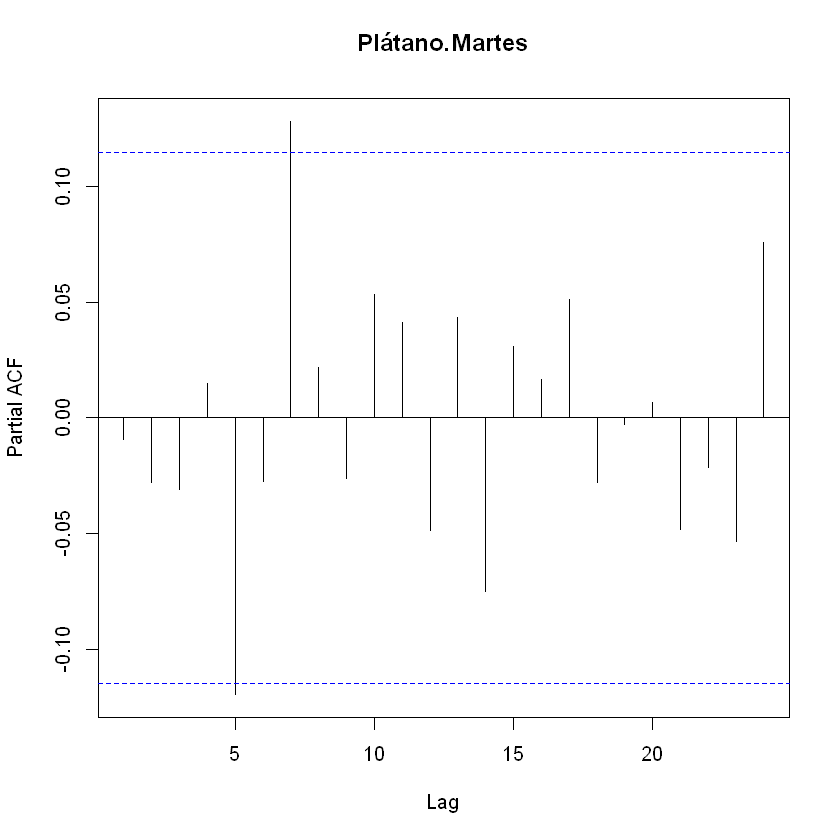


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.007 -0.030 -0.068 -0.012  0.000  0.040  0.045  0.027 -0.039 -0.012  0.058 
    12     13     14     15     16     17     18     19     20     21     22 
 0.106 -0.018 -0.014 -0.037  0.114 -0.016 -0.058  0.051 -0.075  0.025 -0.004 
    23     24 
-0.058 -0.011 


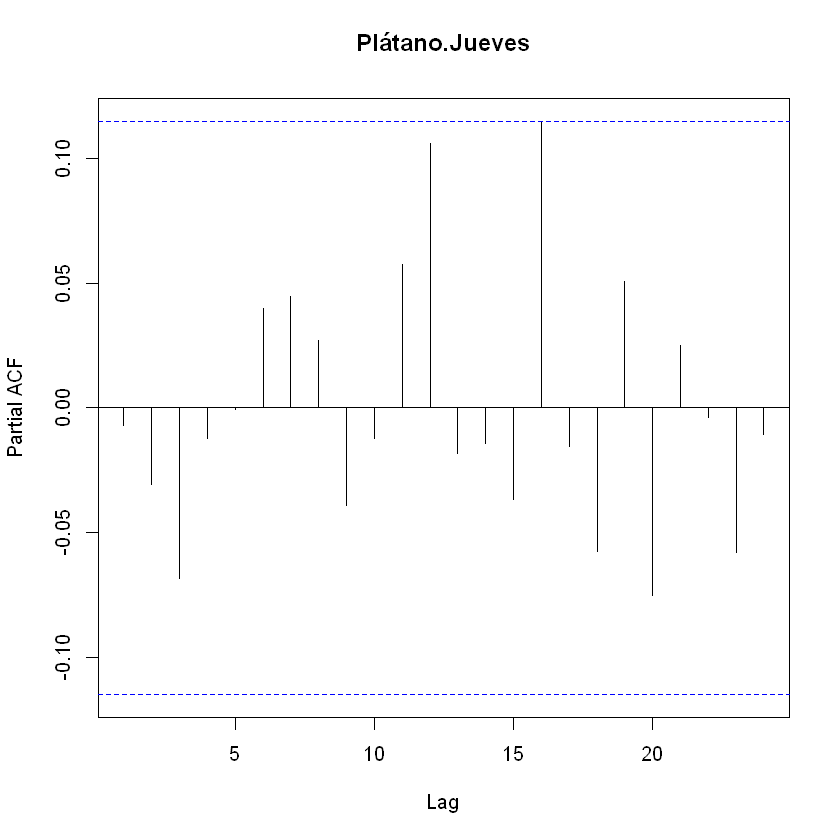


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.004  0.013 -0.008 -0.006 -0.009 -0.002  0.006  0.021  0.000  0.014 
    12     13     14     15     16     17     18     19     20     21     22 
 0.011  0.010  0.023 -0.016 -0.024  0.019  0.008  0.015  0.015  0.012 -0.038 
    23     24 
-0.028  0.055 


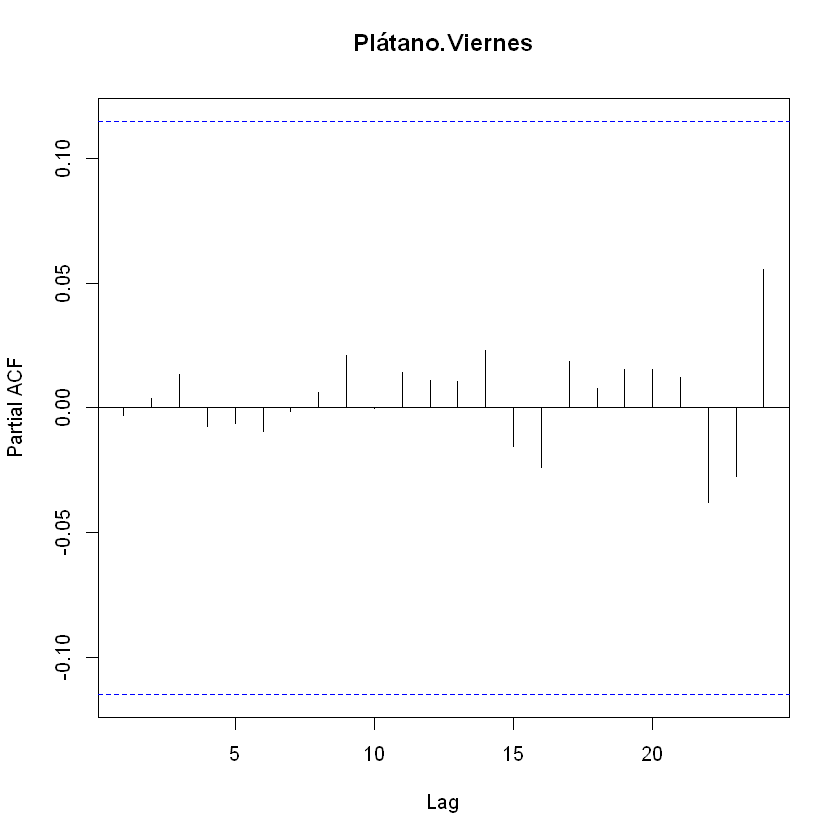


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.005 -0.004  0.002 -0.002 -0.004 -0.002  0.012 -0.004  0.002  0.003  0.010 
    12     13     14     15     16     17     18     19     20     21     22 
 0.014 -0.006  0.012  0.023  0.023 -0.004  0.001 -0.032 -0.064 -0.019  0.035 
    23     24 
-0.022 -0.010 


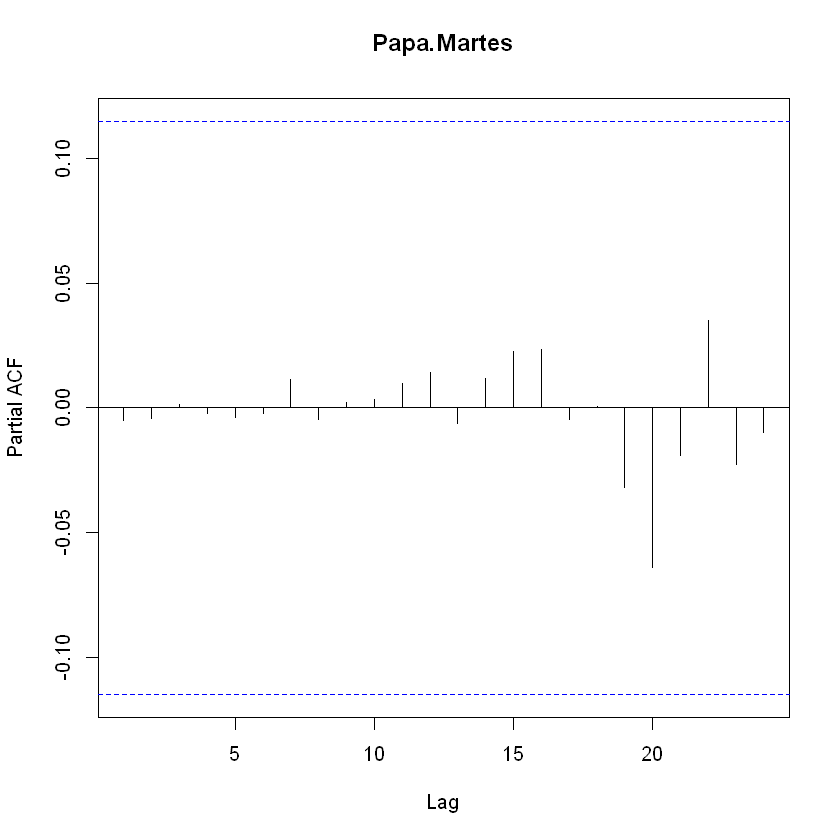


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.000 -0.002  0.012 -0.005 -0.022 -0.017 -0.005 -0.002 -0.014 -0.012 -0.023 
    12     13     14     15     16     17     18     19     20     21     22 
 0.021 -0.027  0.002  0.018  0.048  0.039  0.010 -0.067 -0.078 -0.058  0.053 
    23     24 
 0.023 -0.072 


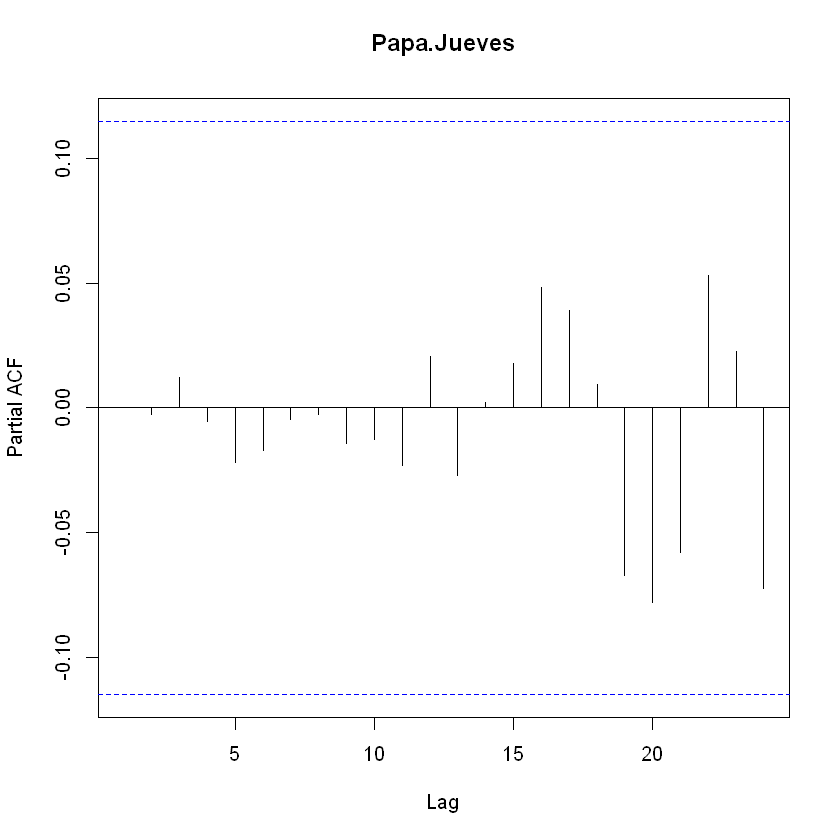


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.008 -0.004 -0.003 -0.021 -0.009 -0.003 -0.010 -0.011 -0.018  0.038  0.018 
    12     13     14     15     16     17     18     19     20     21     22 
 0.000  0.043 -0.033 -0.010  0.019  0.048  0.033 -0.061 -0.078 -0.008  0.093 
    23     24 
-0.036 -0.008 


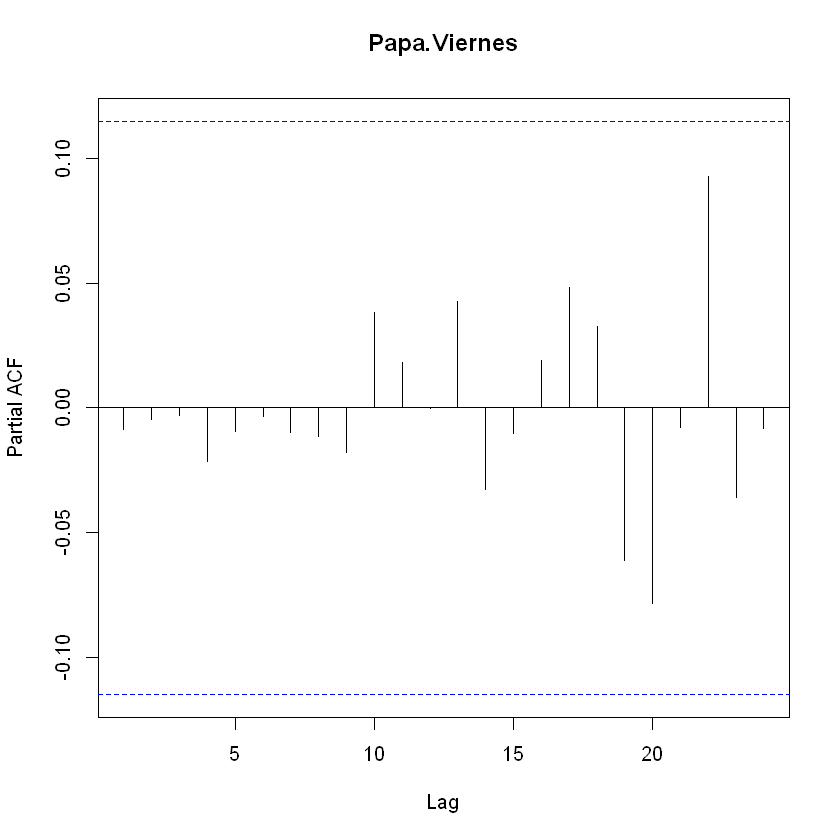


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.013 -0.003  0.001  0.008 -0.017 -0.006  0.002 -0.001  0.010  0.004 -0.003 
    12     13     14     15     16     17     18     19     20     21     22 
-0.011 -0.023  0.001 -0.013 -0.001 -0.008  0.000 -0.007 -0.013  0.032 -0.006 
    23     24 
 0.012 -0.018 


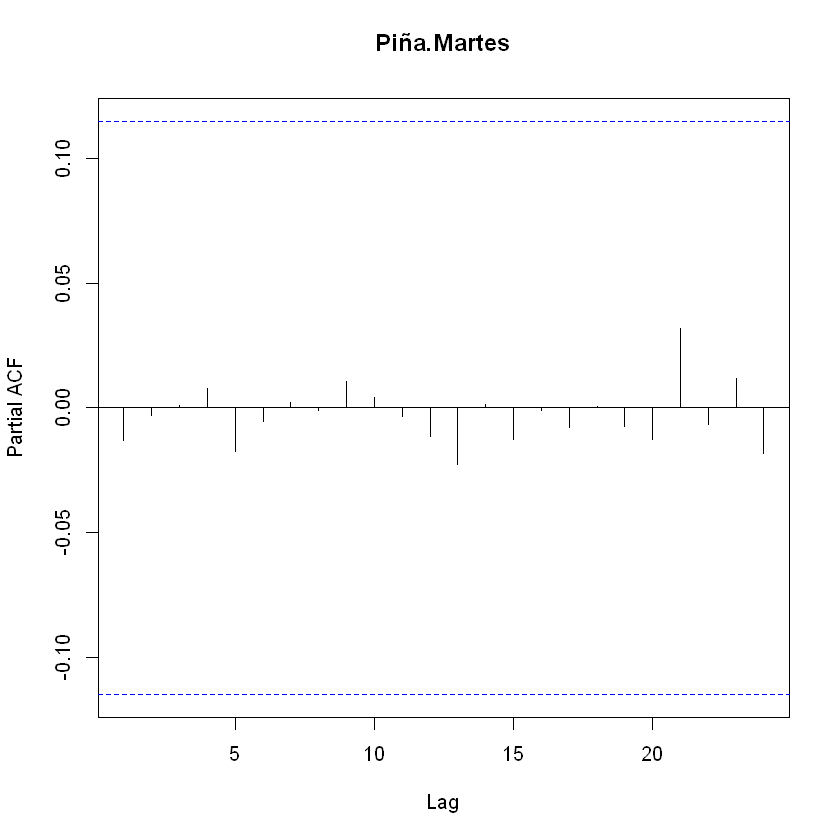


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.000  0.007  0.000  0.009 -0.013  0.008  0.012 -0.008 -0.011  0.004  0.009 
    12     13     14     15     16     17     18     19     20     21     22 
-0.013 -0.033  0.018 -0.025 -0.005 -0.039  0.044 -0.034 -0.004  0.064  0.007 
    23     24 
-0.013 -0.008 


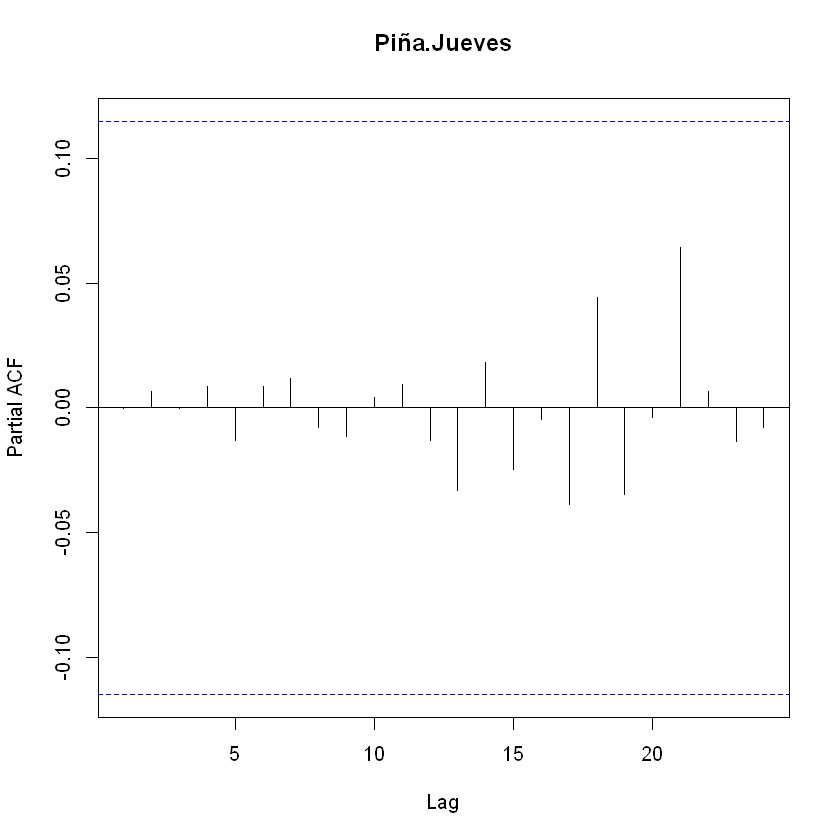


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.006 -0.007 -0.004  0.012 -0.013  0.000  0.004  0.003 -0.007  0.009 
    12     13     14     15     16     17     18     19     20     21     22 
-0.009 -0.001 -0.043  0.041 -0.029 -0.007  0.017 -0.020 -0.004  0.059 -0.004 
    23     24 
 0.026 -0.030 


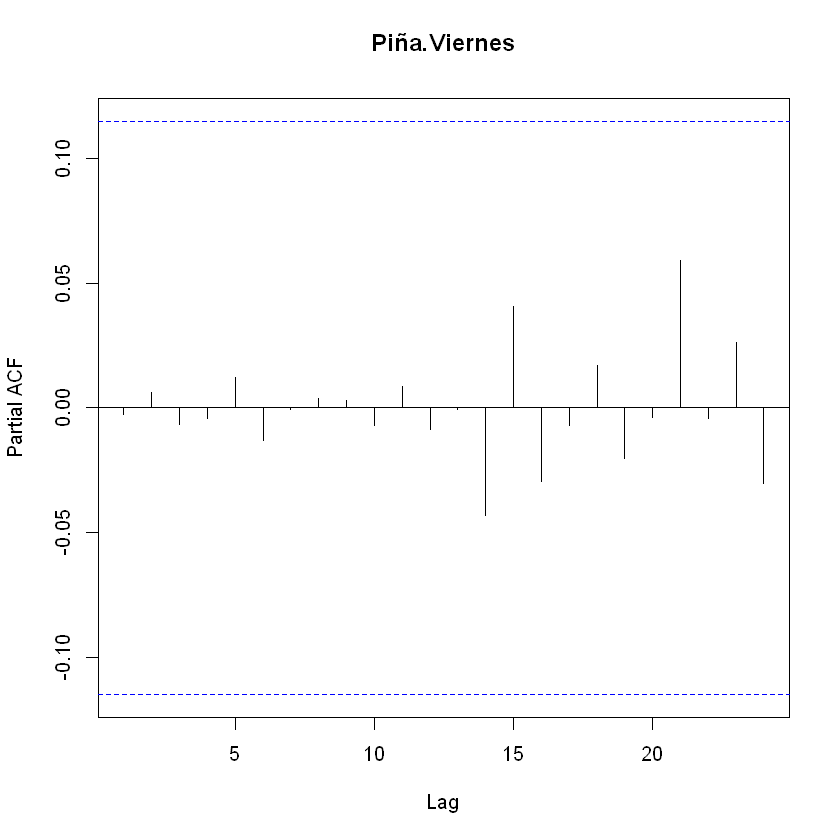


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.002 -0.004  0.004 -0.001 -0.009  0.008  0.011  0.005 -0.003  0.009  0.005 
    12     13     14     15     16     17     18     19     20     21     22 
-0.006 -0.006 -0.004 -0.011 -0.007 -0.007 -0.036 -0.045 -0.010 -0.020 -0.047 
    23     24 
-0.015 -0.031 


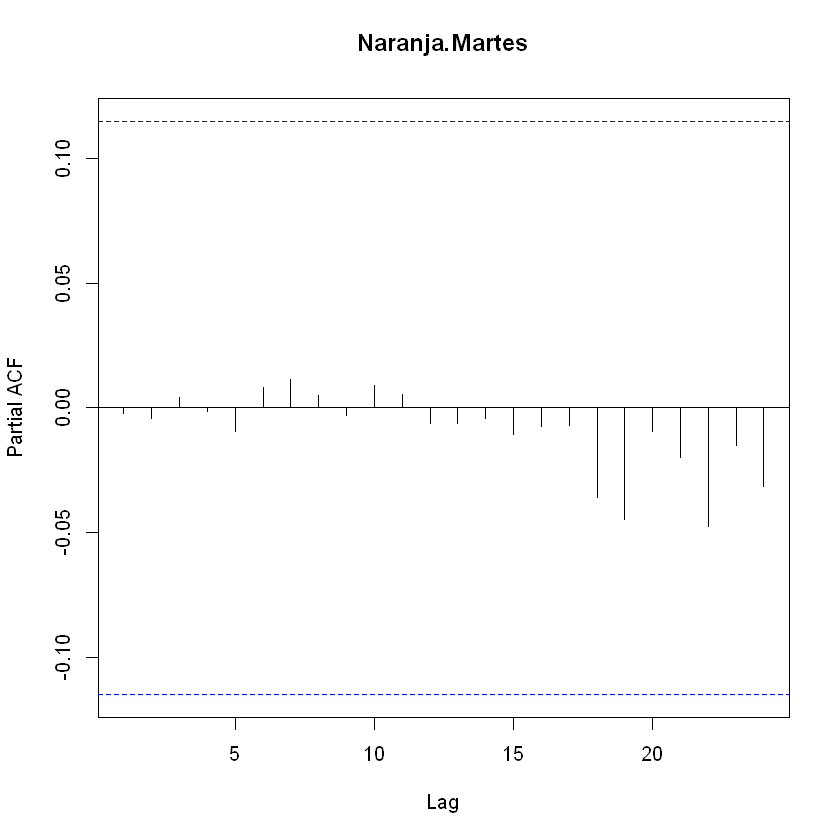


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.001 -0.004  0.018  0.000  0.004 -0.013 -0.013  0.004 -0.015 -0.006 -0.043 
    12     13     14     15     16     17     18     19     20     21     22 
-0.022 -0.044 -0.026 -0.009 -0.034 -0.016 -0.009 -0.009  0.015  0.051  0.033 
    23     24 
-0.011 -0.058 


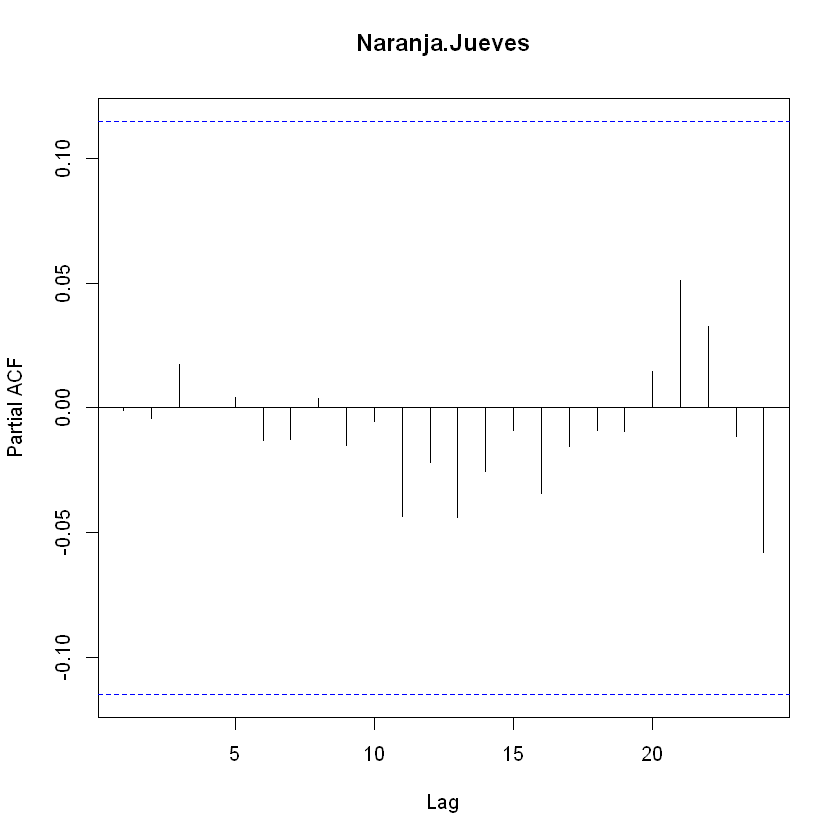


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001  0.007  0.019  0.028  0.010  0.042  0.023  0.012  0.000  0.023 -0.004 
    12     13     14     15     16     17     18     19     20     21     22 
-0.051 -0.019  0.024 -0.001 -0.022 -0.025 -0.054 -0.010 -0.068 -0.021  0.107 
    23     24 
 0.072 -0.015 


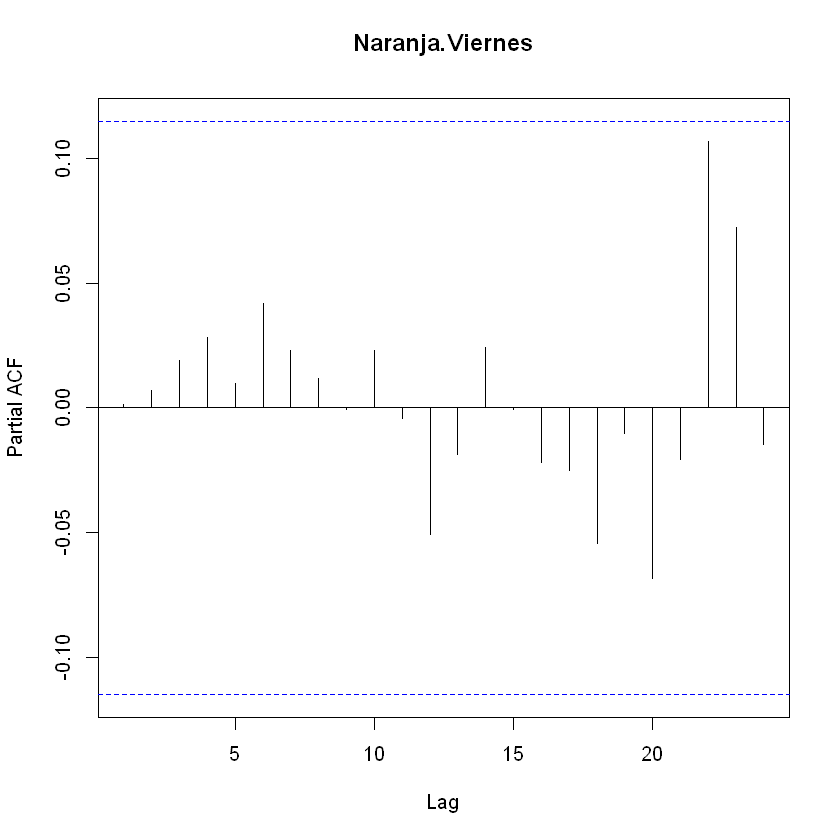


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.005  0.000  0.007  0.001  0.012  0.008  0.017 -0.006  0.008  0.018  0.025 
    12     13     14     15     16     17     18     19     20     21     22 
 0.030  0.007  0.019 -0.004 -0.014 -0.021 -0.003 -0.018 -0.032 -0.046 -0.015 
    23     24 
-0.017 -0.074 


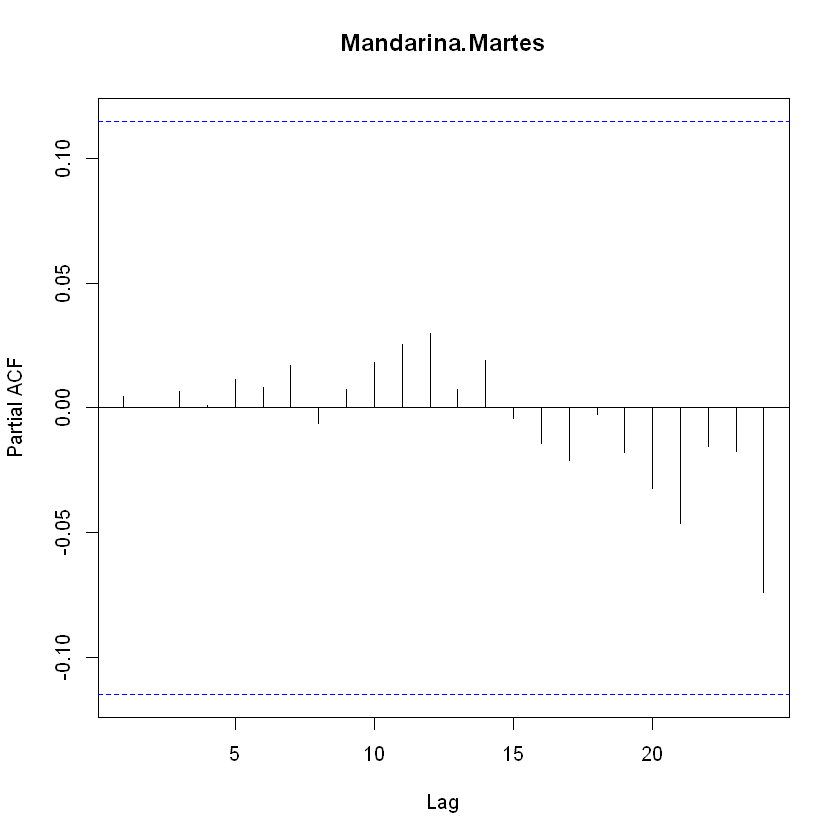


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.015  0.022  0.000 -0.008 -0.015 -0.026  0.078  0.000  0.046 -0.073  0.013 
    12     13     14     15     16     17     18     19     20     21     22 
-0.045  0.034 -0.043 -0.047 -0.028  0.010  0.029 -0.104 -0.087 -0.013  0.094 
    23     24 
 0.009 -0.062 


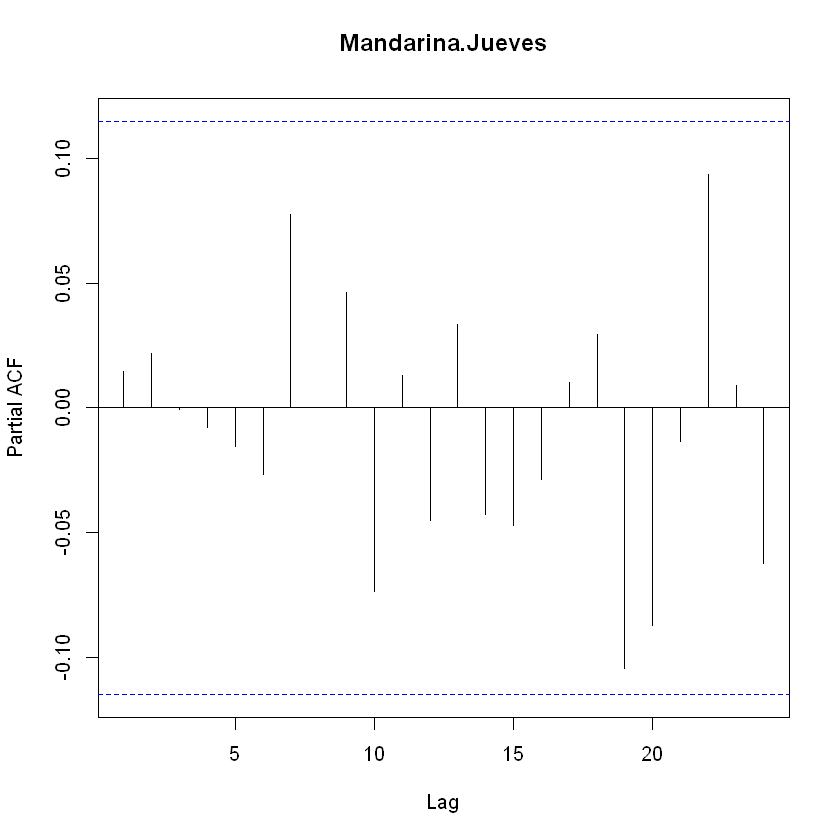


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.005  0.017 -0.006  0.007 -0.004 -0.003  0.011  0.006  0.000  0.017 
    12     13     14     15     16     17     18     19     20     21     22 
 0.039  0.016  0.031 -0.011  0.007 -0.018  0.006 -0.032 -0.053 -0.005  0.008 
    23     24 
-0.035 -0.008 


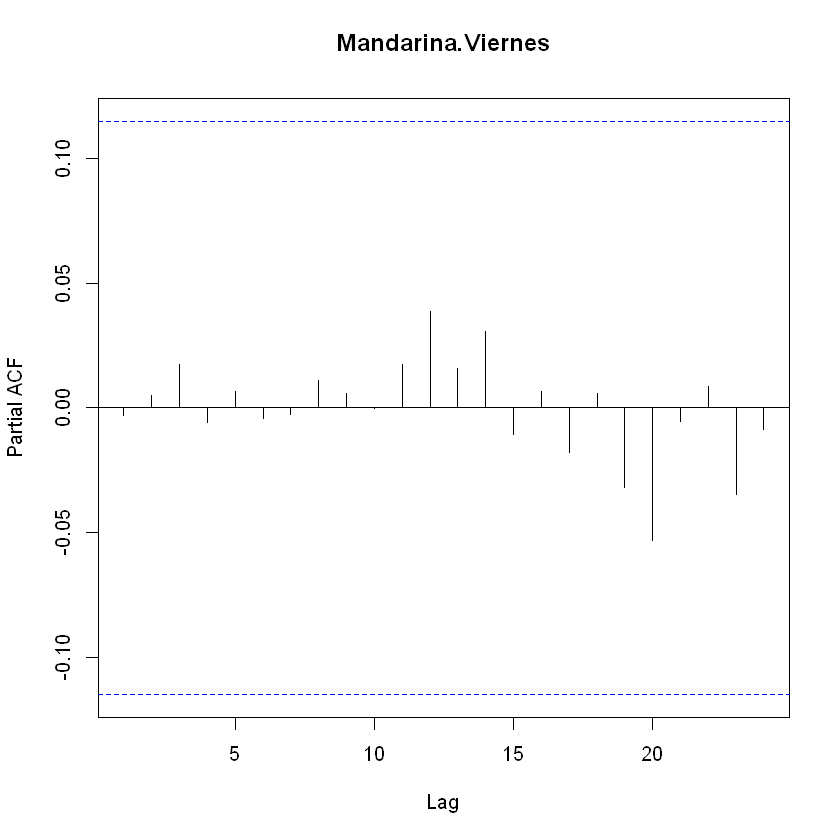


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.005 -0.004 -0.010 -0.038 -0.026 -0.026 -0.078 -0.013 -0.036 -0.092  0.030 
    12     13     14     15     16     17     18     19     20     21     22 
 0.033 -0.078 -0.044 -0.040 -0.072  0.009 -0.019  0.020 -0.027 -0.064  0.041 
    23     24 
 0.003  0.030 


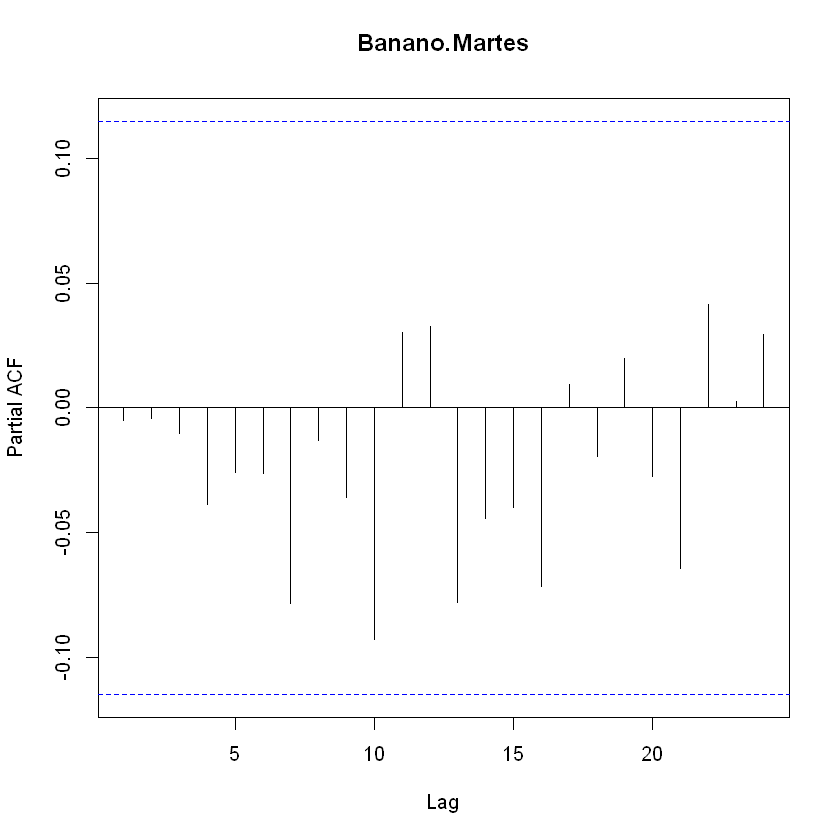


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.013 -0.004  0.040 -0.010 -0.036 -0.046 -0.020 -0.056 -0.031  0.017  0.079 
    12     13     14     15     16     17     18     19     20     21     22 
-0.027 -0.057 -0.054  0.005  0.013 -0.049  0.045 -0.014  0.029 -0.008  0.042 
    23     24 
-0.013  0.037 

Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.031 -0.010  0.028  0.086 -0.023 -0.122  0.061 -0.102 -0.014 -0.018  0.014 
    12     13     14     15     16     17     18     19     20     21     22 
-0.049  0.043 -0.098 -0.022  0.036  0.006 -0.092  0.063 -0.046  0.038 -0.007 
    23     24 
 0.037  0.091 


Warning message in log(s2):
"Se han producido NaNs"

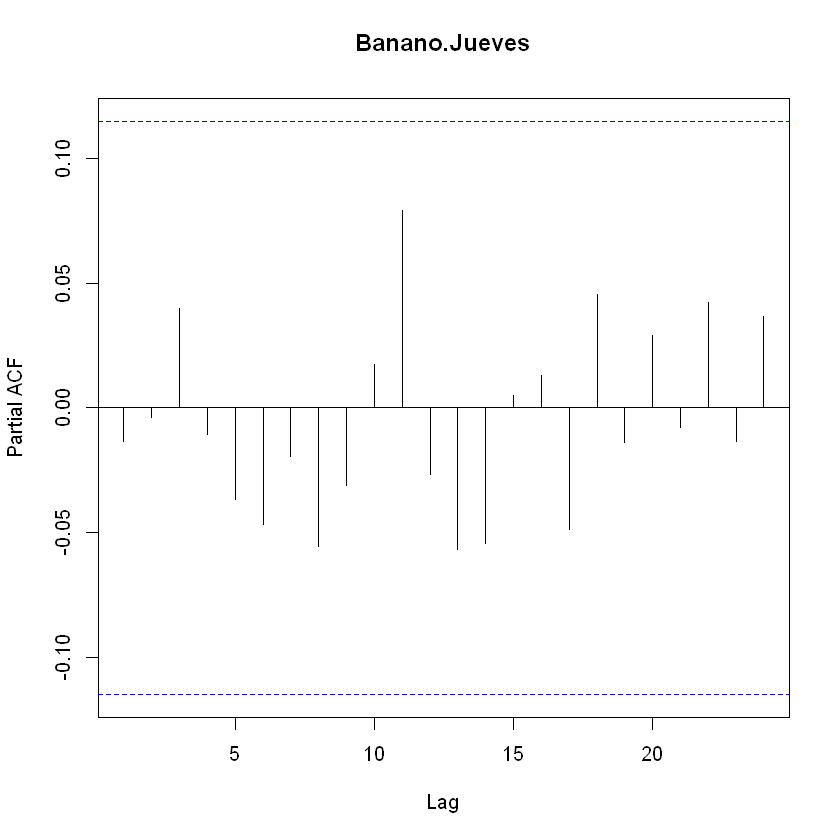

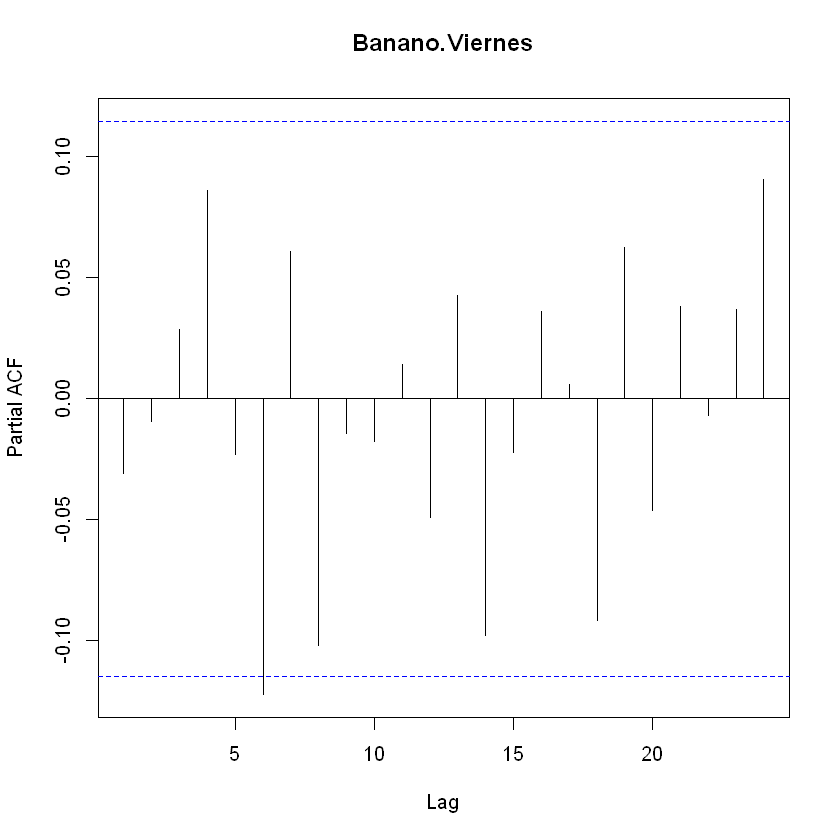


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001 -0.006 -0.017 -0.020 -0.029 -0.020  0.007 -0.014  0.024 -0.004  0.026 
    12     13     14     15     16     17     18     19     20     21     22 
-0.046 -0.007 -0.073 -0.035 -0.036 -0.029 -0.089 -0.071 -0.052 -0.056  0.042 
    23     24 
-0.080  0.092 


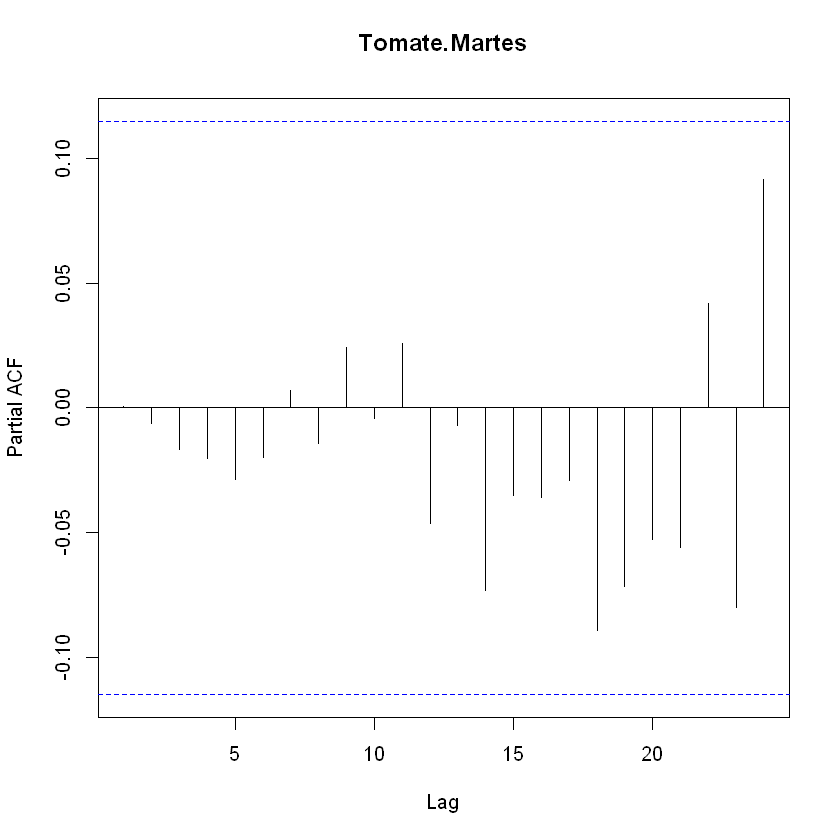


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001  0.003  0.023  0.011  0.017 -0.024 -0.027 -0.051 -0.003 -0.036 -0.015 
    12     13     14     15     16     17     18     19     20     21     22 
-0.012  0.021  0.002  0.021 -0.008  0.005  0.004  0.025  0.032 -0.030 -0.025 
    23     24 
-0.060  0.068 


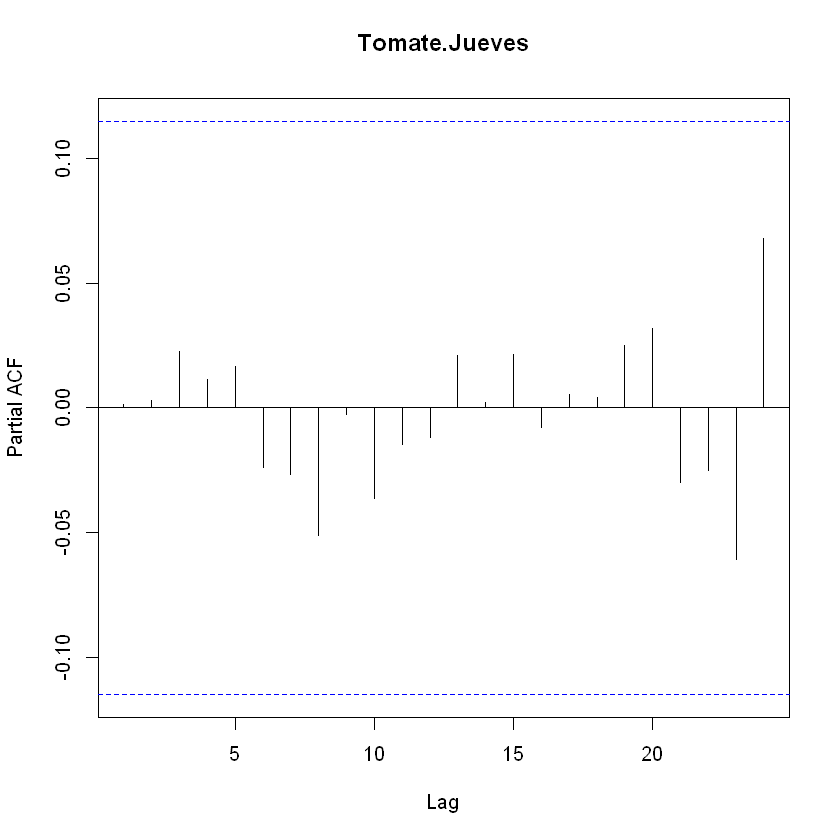


Partial autocorrelations of series 'arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), ''    include.mean = TRUE)$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.003 -0.012  0.011 -0.004  0.009  0.007  0.006  0.007  0.000  0.007 -0.041 
    12     13     14     15     16     17     18     19     20     21     22 
 0.015 -0.040  0.028 -0.019  0.025 -0.003 -0.070 -0.063 -0.021  0.012 -0.008 
    23     24 
 0.040  0.002 


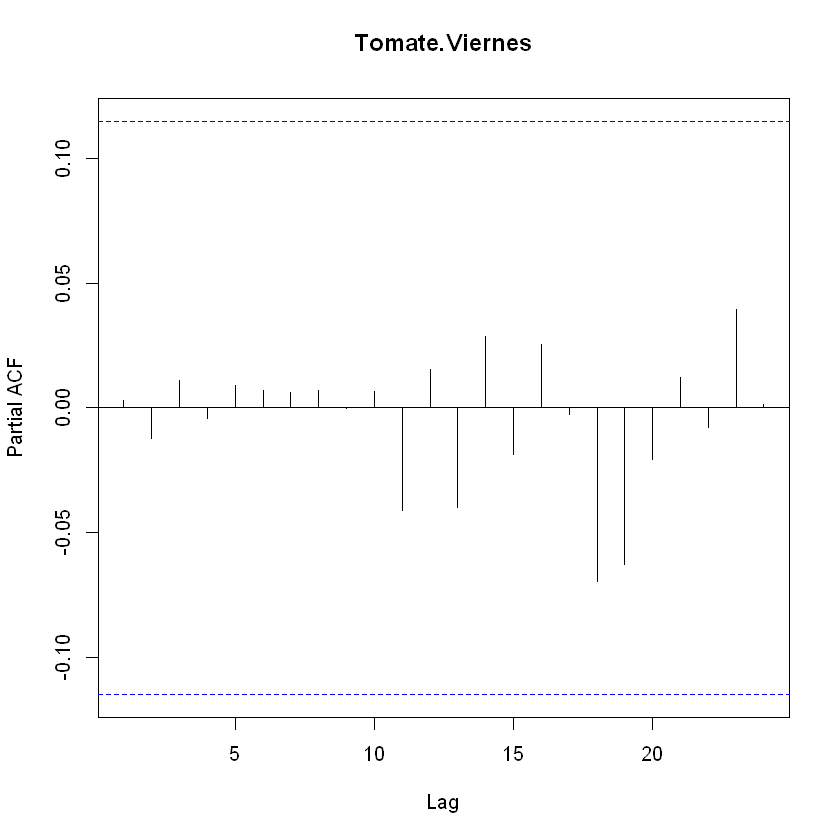

In [34]:
# Bucle que almacena los parámetros (p,d,q) según el AIC menor
for (i in 1:nrow(AIC)) {

  if(AIC[i,2]<AIC[i,3]){
    or[i, 1:3]<-or1[i, 1:3]
    print(or1[i, 1:3])
    print(AIC[i,2])    
  } else{
    or[i, 1:3]<-or2[i,1:3]
    print(or2[i,1:3])
    print(AIC[i,3])
      }}
# Bucle que permite observar los modelos que cumplen con la condición de precisión

for (i in 1:nrow(or)) {
 print(pacf(arima(DATAm[,i+1], order = c(or[i, 1], or[i, 2], or[i, 3]), include.mean = TRUE)$residuals, 
  main = names(DATAm[i+1])))
 }

Como se puede observar en las anteriores figuras, aunque en algunos casos los modelos pueden considerarse precisos, existen otros donde esto no se puede enunciar. Estos modelos son modificados en sus respectivos valores de orden para cumplir con la condición de la metodologia ARIMA. Estos productos son:

Warning message in arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), :
"possible convergence problem: optim gave code = 1"


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.002 -0.001  0.007  0.000  0.015 -0.003  0.014 -0.002 -0.001  0.004 -0.007 
    12     13     14     15     16     17     18     19     20     21     22 
 0.016  0.012 -0.032  0.030  0.023 -0.005  0.013 -0.052  0.013 -0.018  0.014 
    23     24 
 0.009  0.012 


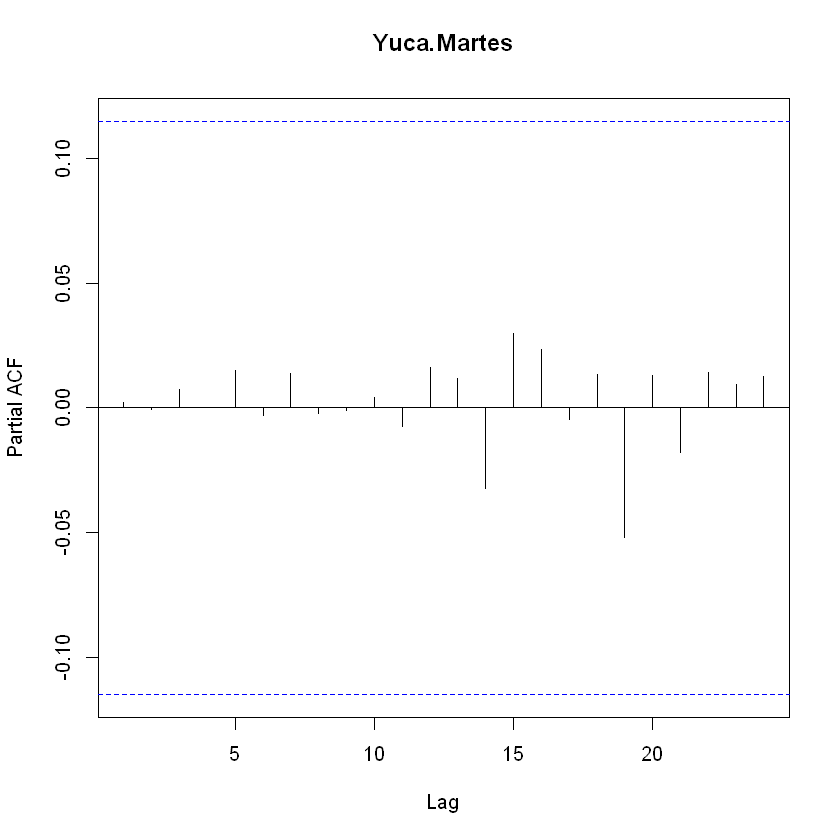


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.002 -0.021  0.008 -0.030  0.026 -0.026  0.010 -0.021 -0.028  0.033 -0.043 
    12     13     14     15     16     17     18     19     20     21     22 
 0.032 -0.035  0.001  0.052 -0.025 -0.083  0.006 -0.035 -0.036  0.042 -0.033 
    23     24 
-0.052 -0.005 


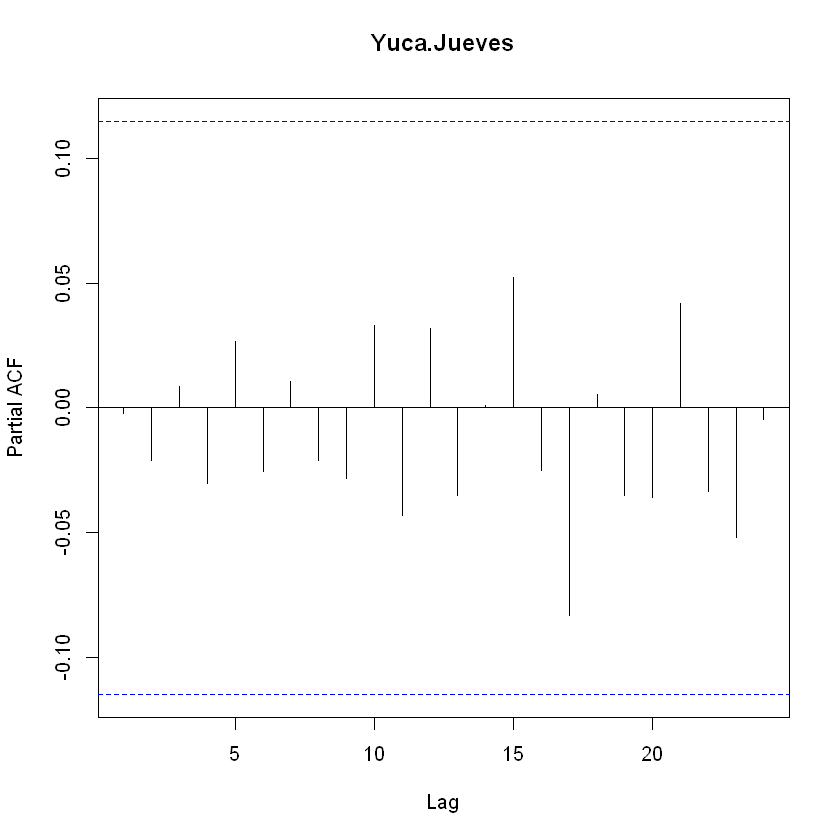


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.005  0.003  0.000 -0.004 -0.016  0.022  0.003 -0.005  0.020 -0.003  0.031 
    12     13     14     15     16     17     18     19     20     21     22 
-0.065  0.020 -0.034  0.017  0.100  0.007 -0.018 -0.021  0.007 -0.034  0.026 
    23     24 
-0.032  0.003 


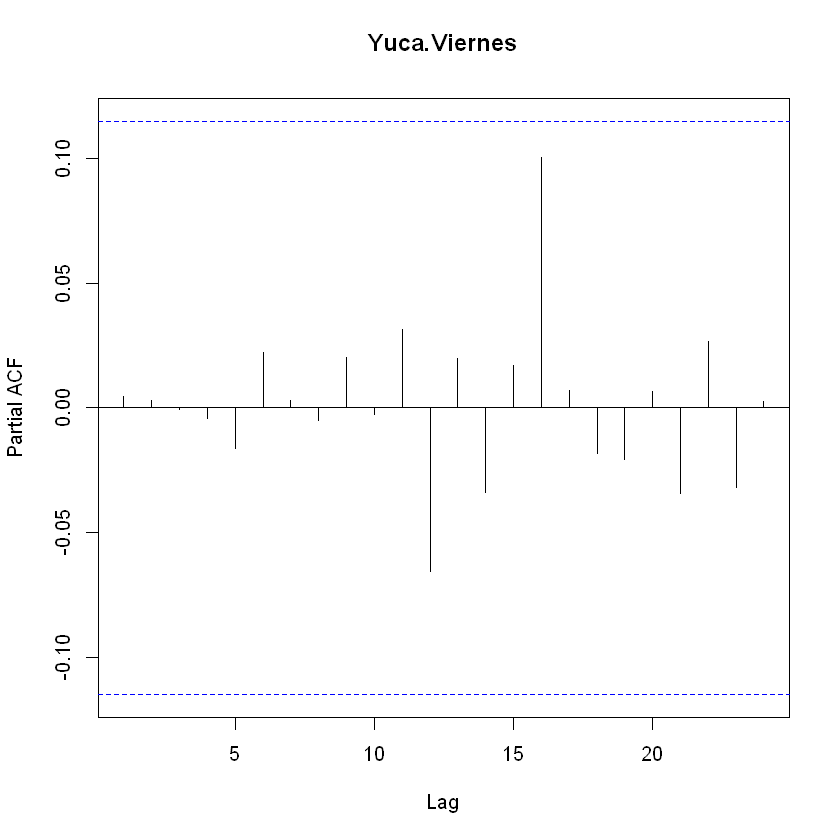


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.006 -0.005 -0.011  0.010 -0.009  0.004  0.000 -0.073  0.025  0.019 
    12     13     14     15     16     17     18     19     20     21     22 
-0.064  0.014 -0.078  0.013 -0.016  0.033 -0.048 -0.018 -0.014 -0.056 -0.039 
    23     24 
-0.058  0.090 


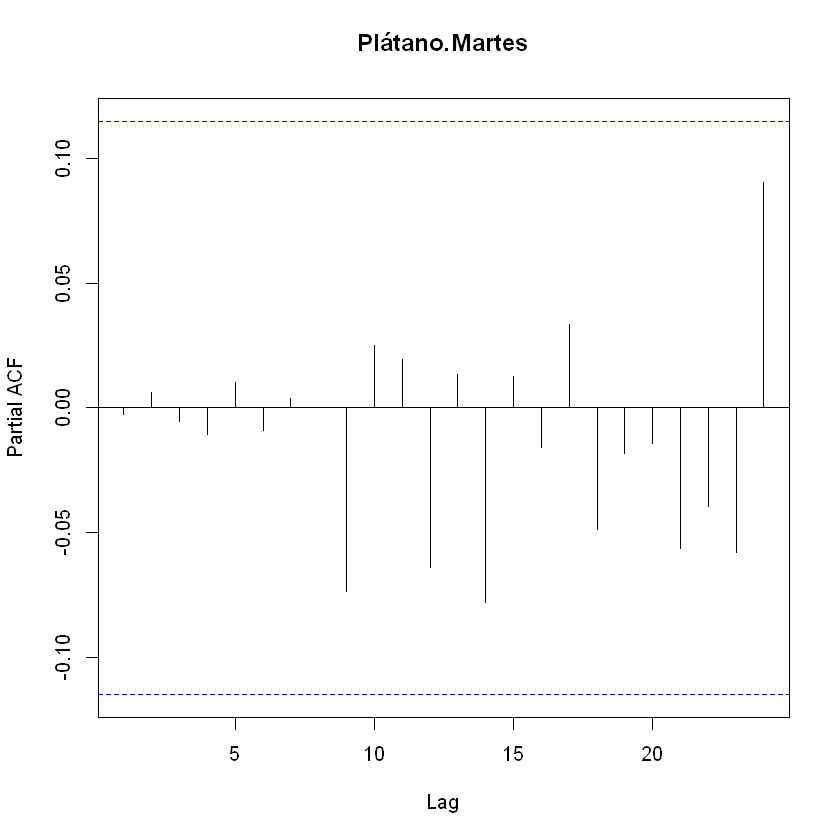


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.007 -0.030 -0.068 -0.012  0.000  0.040  0.045  0.027 -0.039 -0.012  0.058 
    12     13     14     15     16     17     18     19     20     21     22 
 0.106 -0.018 -0.014 -0.037  0.114 -0.016 -0.058  0.051 -0.075  0.025 -0.004 
    23     24 
-0.058 -0.011 


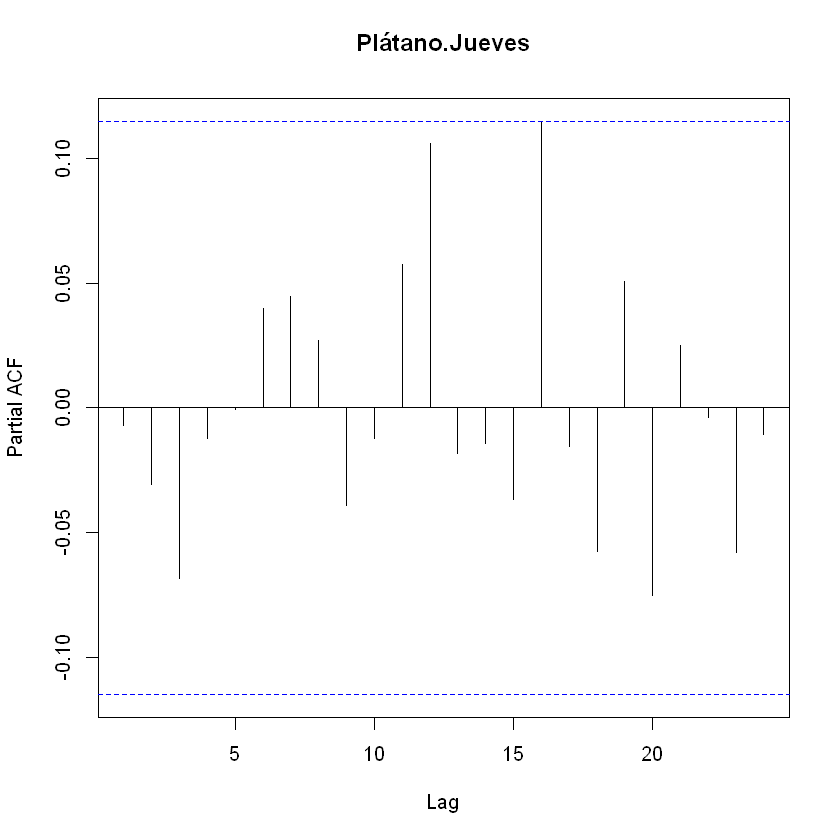


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.004  0.013 -0.008 -0.006 -0.009 -0.002  0.006  0.021  0.000  0.014 
    12     13     14     15     16     17     18     19     20     21     22 
 0.011  0.010  0.023 -0.016 -0.024  0.019  0.008  0.015  0.015  0.012 -0.038 
    23     24 
-0.028  0.055 


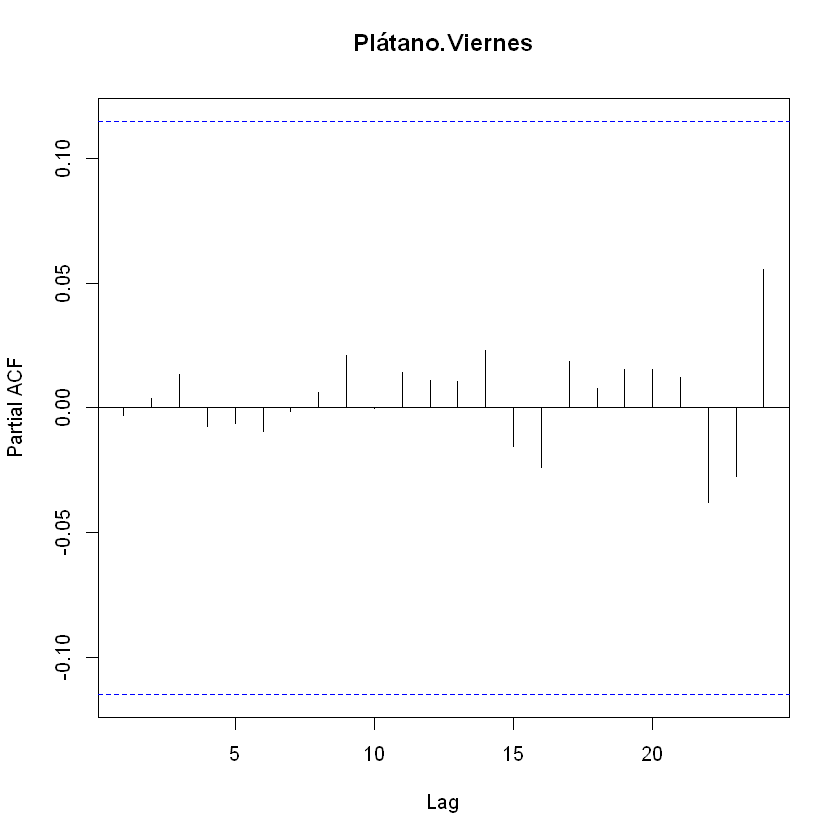


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.005 -0.004  0.002 -0.002 -0.004 -0.002  0.012 -0.004  0.002  0.003  0.010 
    12     13     14     15     16     17     18     19     20     21     22 
 0.014 -0.006  0.012  0.023  0.023 -0.004  0.001 -0.032 -0.064 -0.019  0.035 
    23     24 
-0.022 -0.010 


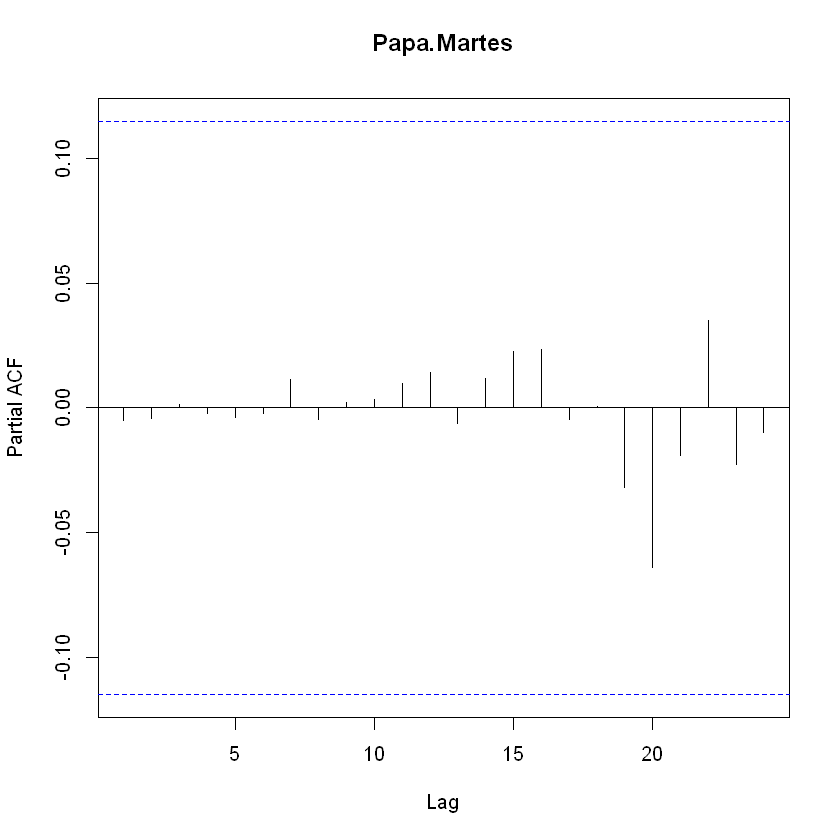


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.000 -0.002  0.012 -0.005 -0.022 -0.017 -0.005 -0.002 -0.014 -0.012 -0.023 
    12     13     14     15     16     17     18     19     20     21     22 
 0.021 -0.027  0.002  0.018  0.048  0.039  0.010 -0.067 -0.078 -0.058  0.053 
    23     24 
 0.023 -0.072 


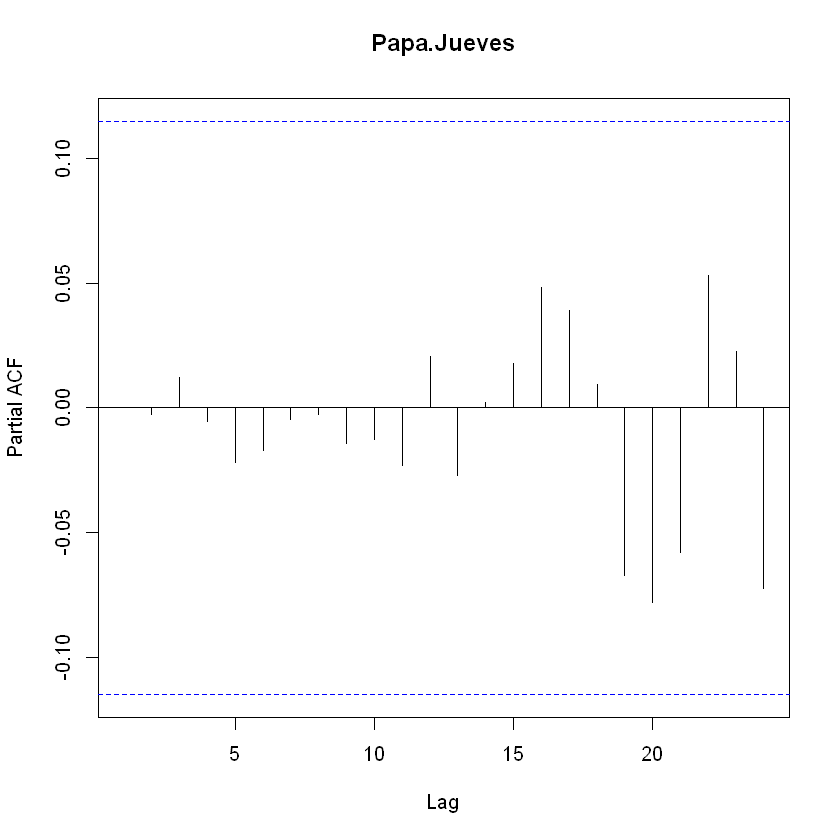


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.008 -0.004 -0.003 -0.021 -0.009 -0.003 -0.010 -0.011 -0.018  0.038  0.018 
    12     13     14     15     16     17     18     19     20     21     22 
 0.000  0.043 -0.033 -0.010  0.019  0.048  0.033 -0.061 -0.078 -0.008  0.093 
    23     24 
-0.036 -0.008 


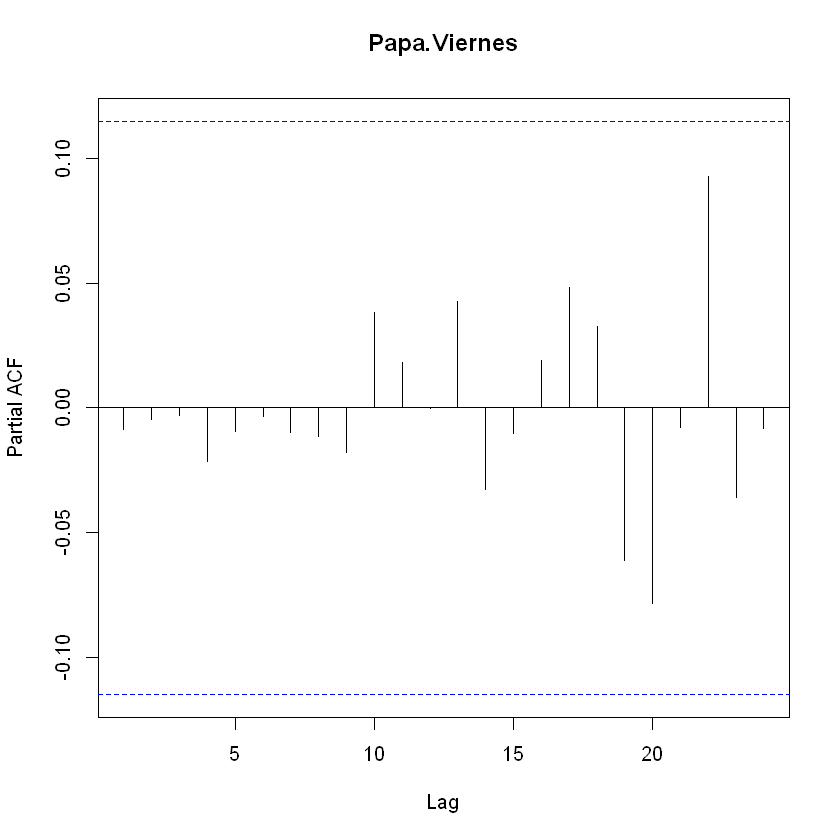


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.013 -0.003  0.001  0.008 -0.017 -0.006  0.002 -0.001  0.010  0.004 -0.003 
    12     13     14     15     16     17     18     19     20     21     22 
-0.011 -0.023  0.001 -0.013 -0.001 -0.008  0.000 -0.007 -0.013  0.032 -0.006 
    23     24 
 0.012 -0.018 


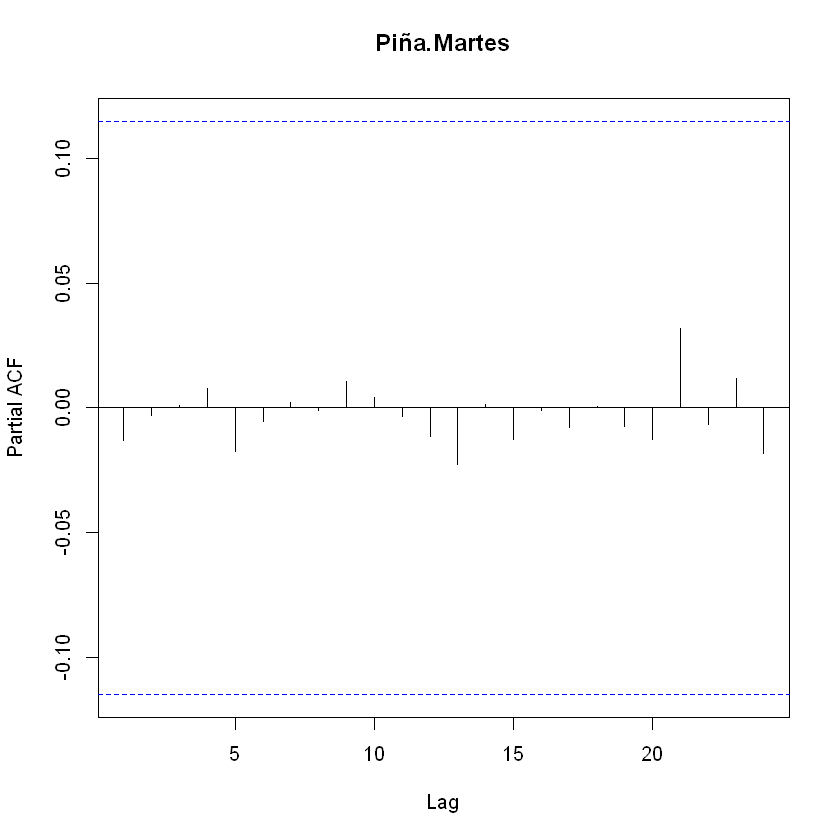


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.000  0.007  0.000  0.009 -0.013  0.008  0.012 -0.008 -0.011  0.004  0.009 
    12     13     14     15     16     17     18     19     20     21     22 
-0.013 -0.033  0.018 -0.025 -0.005 -0.039  0.044 -0.034 -0.004  0.064  0.007 
    23     24 
-0.013 -0.008 


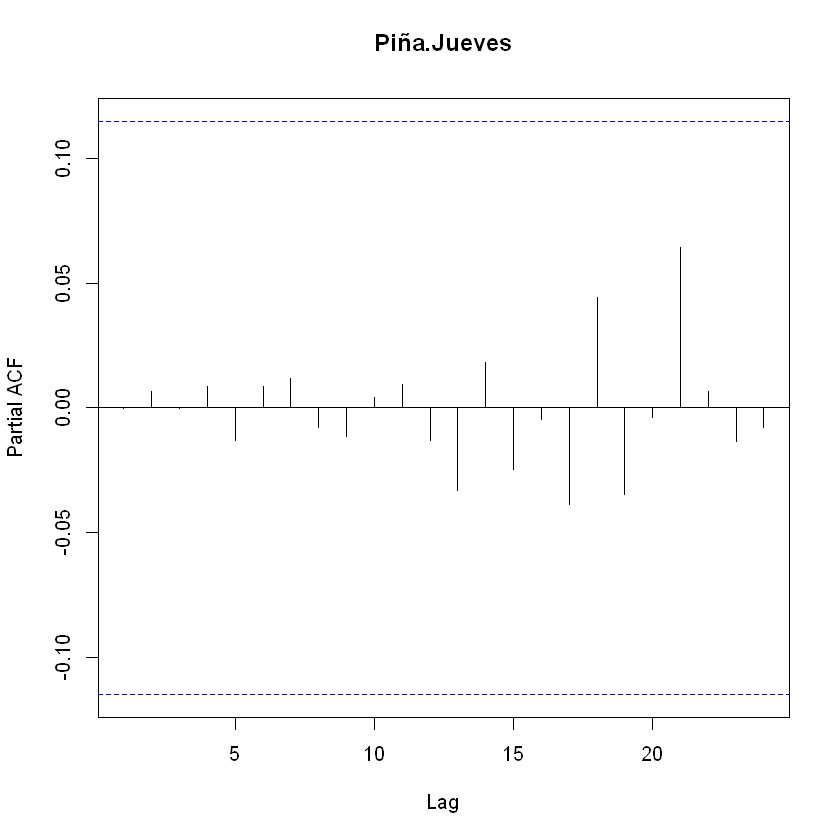


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.006 -0.007 -0.004  0.012 -0.013  0.000  0.004  0.003 -0.007  0.009 
    12     13     14     15     16     17     18     19     20     21     22 
-0.009 -0.001 -0.043  0.041 -0.029 -0.007  0.017 -0.020 -0.004  0.059 -0.004 
    23     24 
 0.026 -0.030 


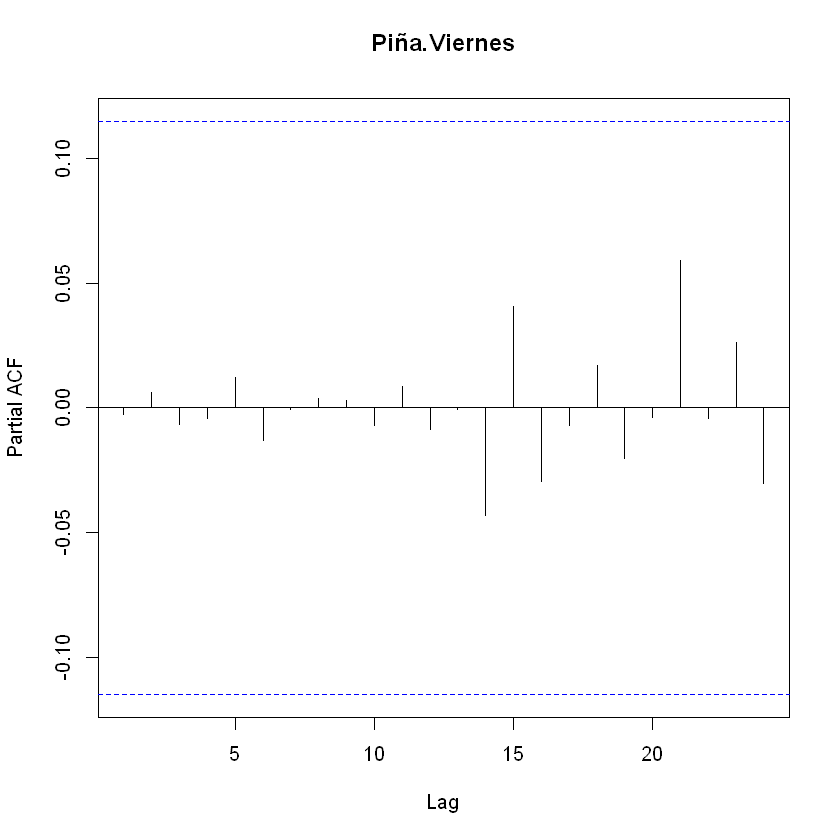


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.002 -0.004  0.004 -0.001 -0.009  0.008  0.011  0.005 -0.003  0.009  0.005 
    12     13     14     15     16     17     18     19     20     21     22 
-0.006 -0.006 -0.004 -0.011 -0.007 -0.007 -0.036 -0.045 -0.010 -0.020 -0.047 
    23     24 
-0.015 -0.031 


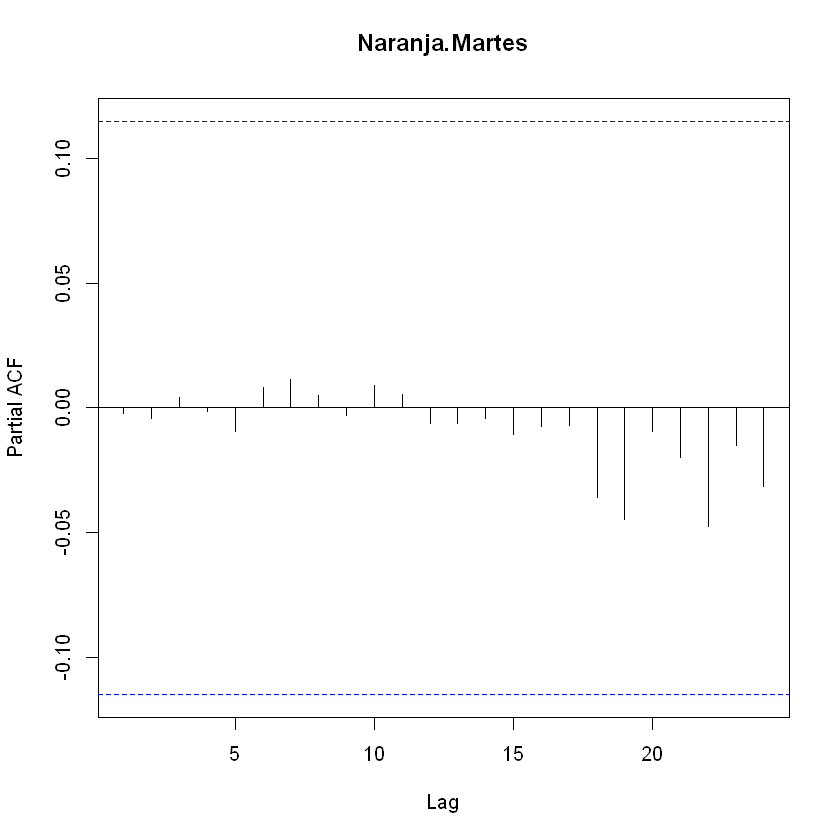


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.001 -0.004  0.018  0.000  0.004 -0.013 -0.013  0.004 -0.015 -0.006 -0.043 
    12     13     14     15     16     17     18     19     20     21     22 
-0.022 -0.044 -0.026 -0.009 -0.034 -0.016 -0.009 -0.009  0.015  0.051  0.033 
    23     24 
-0.011 -0.058 


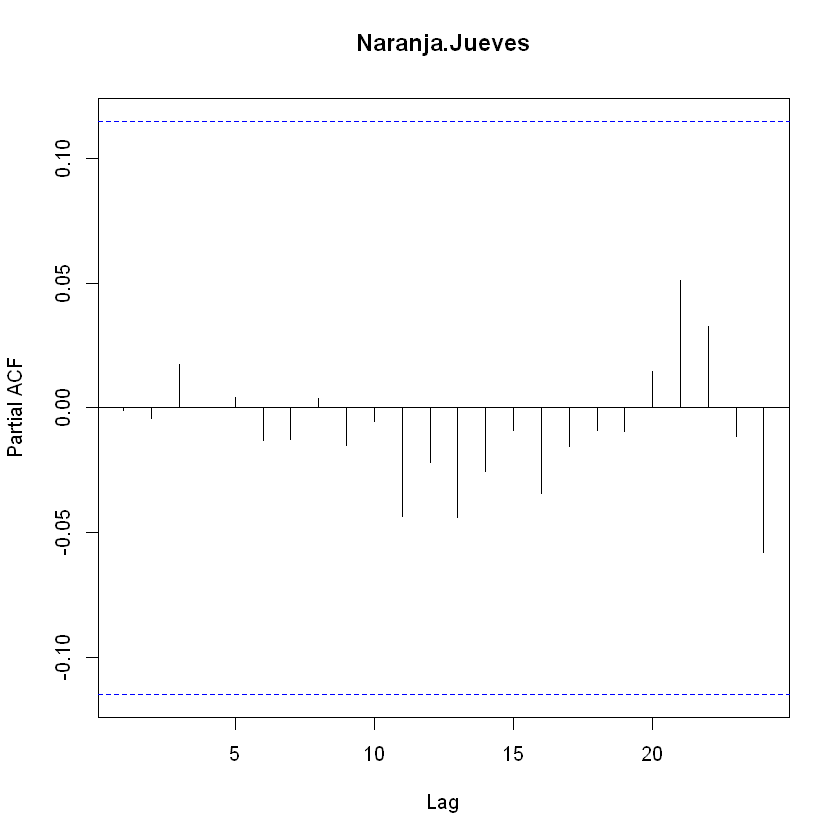


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001  0.007  0.019  0.028  0.010  0.042  0.023  0.012  0.000  0.023 -0.004 
    12     13     14     15     16     17     18     19     20     21     22 
-0.051 -0.019  0.024 -0.001 -0.022 -0.025 -0.054 -0.010 -0.068 -0.021  0.107 
    23     24 
 0.072 -0.015 


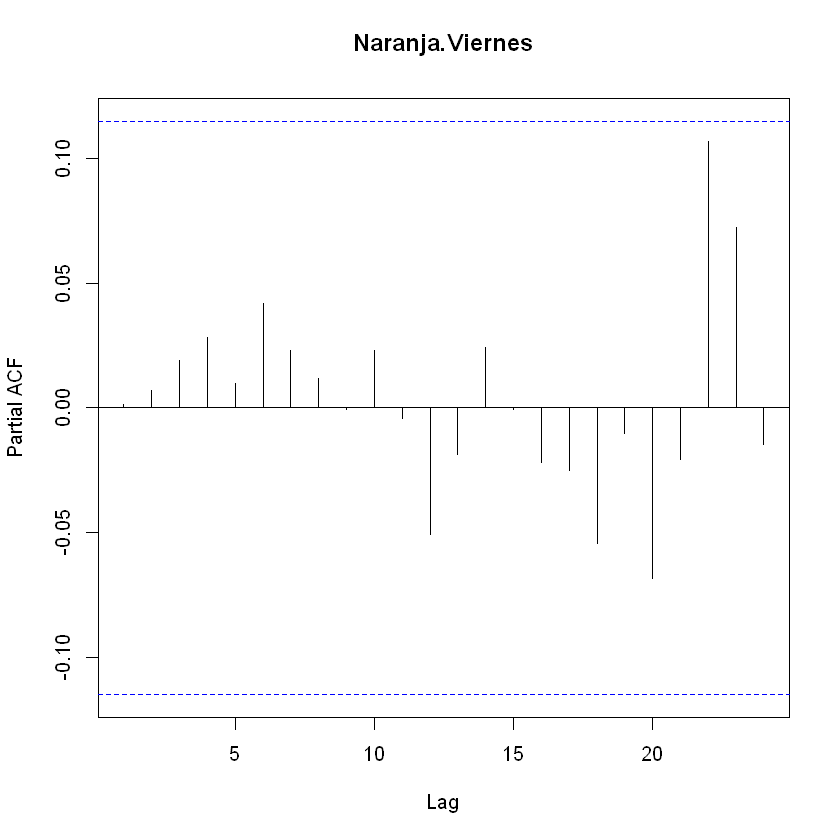


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.005  0.000  0.007  0.001  0.012  0.008  0.017 -0.006  0.008  0.018  0.025 
    12     13     14     15     16     17     18     19     20     21     22 
 0.030  0.007  0.019 -0.004 -0.014 -0.021 -0.003 -0.018 -0.032 -0.046 -0.015 
    23     24 
-0.017 -0.074 


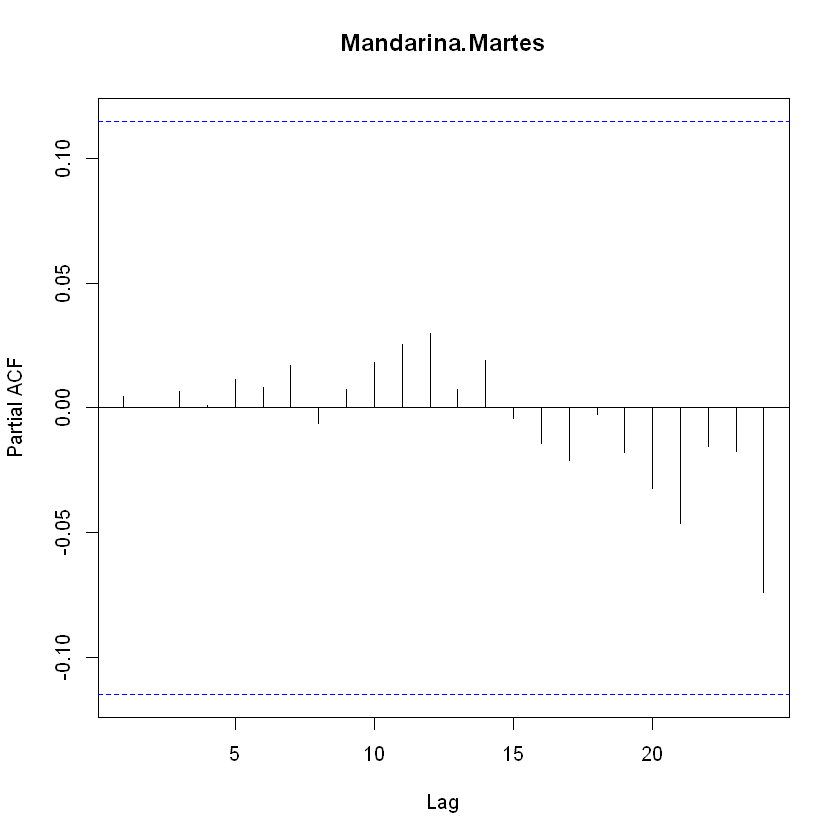


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.015  0.022  0.000 -0.008 -0.015 -0.026  0.078  0.000  0.046 -0.073  0.013 
    12     13     14     15     16     17     18     19     20     21     22 
-0.045  0.034 -0.043 -0.047 -0.028  0.010  0.029 -0.104 -0.087 -0.013  0.094 
    23     24 
 0.009 -0.062 


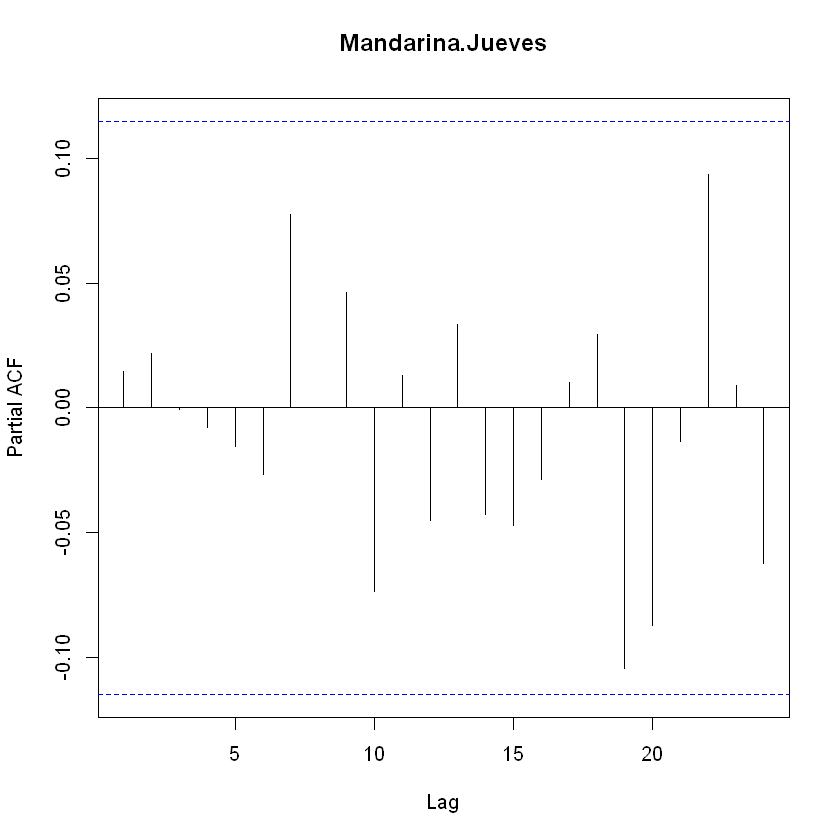


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.005  0.017 -0.006  0.007 -0.004 -0.003  0.011  0.006  0.000  0.017 
    12     13     14     15     16     17     18     19     20     21     22 
 0.039  0.016  0.031 -0.011  0.007 -0.018  0.006 -0.032 -0.053 -0.005  0.008 
    23     24 
-0.035 -0.008 


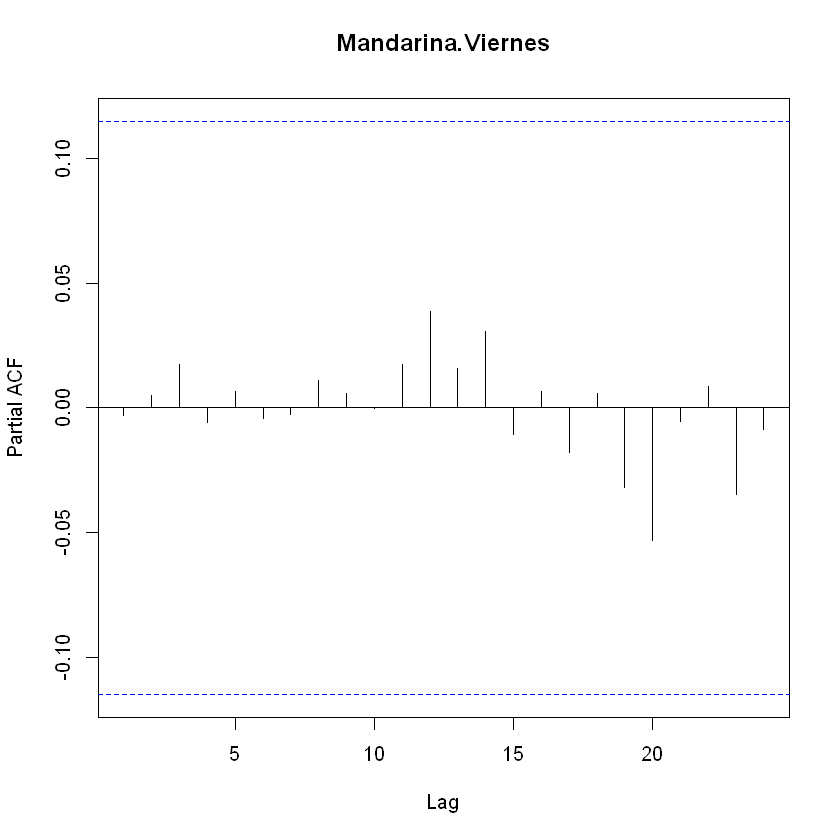


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.005 -0.004 -0.010 -0.038 -0.026 -0.026 -0.078 -0.013 -0.036 -0.092  0.030 
    12     13     14     15     16     17     18     19     20     21     22 
 0.033 -0.078 -0.044 -0.040 -0.072  0.009 -0.019  0.020 -0.027 -0.064  0.041 
    23     24 
 0.003  0.030 


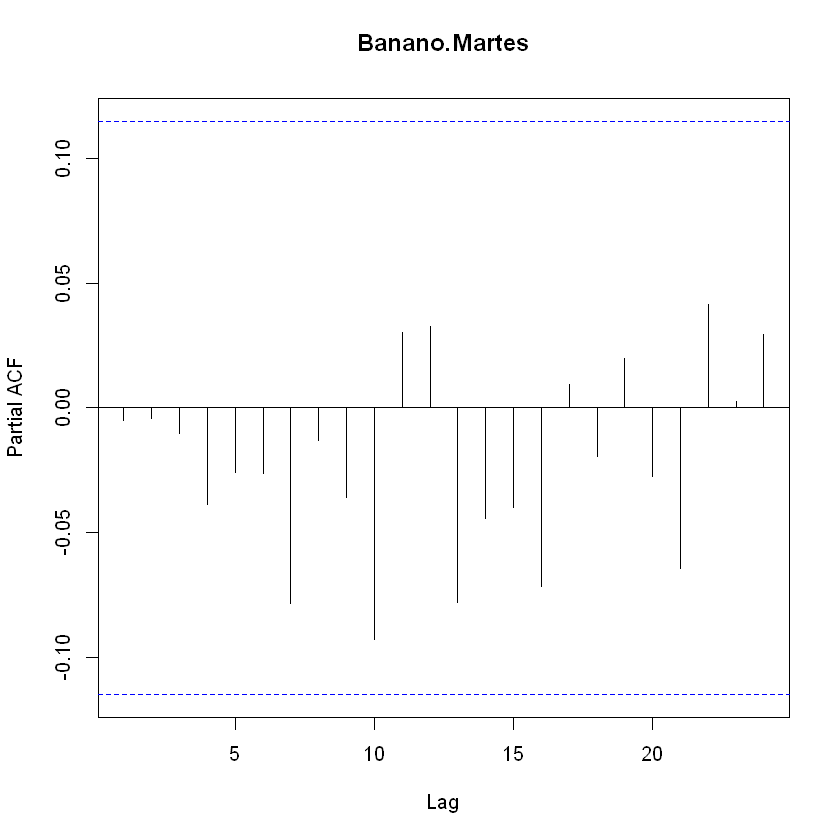


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.013 -0.004  0.040 -0.010 -0.036 -0.046 -0.020 -0.056 -0.031  0.017  0.079 
    12     13     14     15     16     17     18     19     20     21     22 
-0.027 -0.057 -0.054  0.005  0.013 -0.049  0.045 -0.014  0.029 -0.008  0.042 
    23     24 
-0.013  0.037 

Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.003 -0.002  0.010 -0.002 -0.015  0.017 -0.025 -0.050 -0.070 -0.010  0.022 
    12     13     14     15     16     17     18     19     20     21     22 
-0.060  0.021 -0.068 -0.044  0.049 -0.016 -0.064  0.024 -0.015  0.016  0.000 
    23     24 
 0.043  0.096 


Warning message in log(s2):
"Se han producido NaNs"

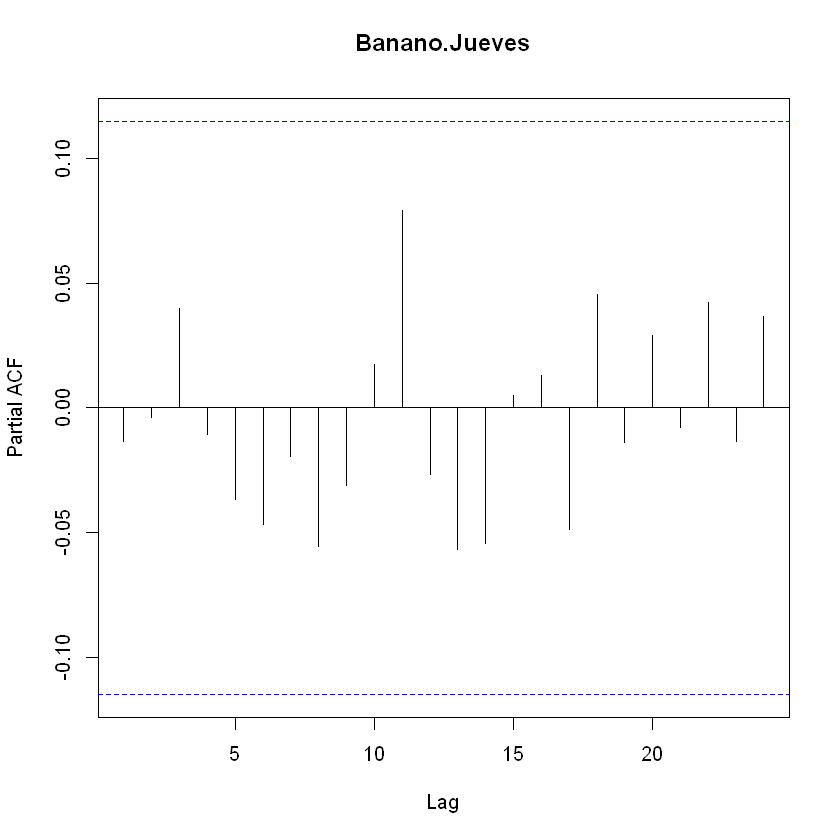

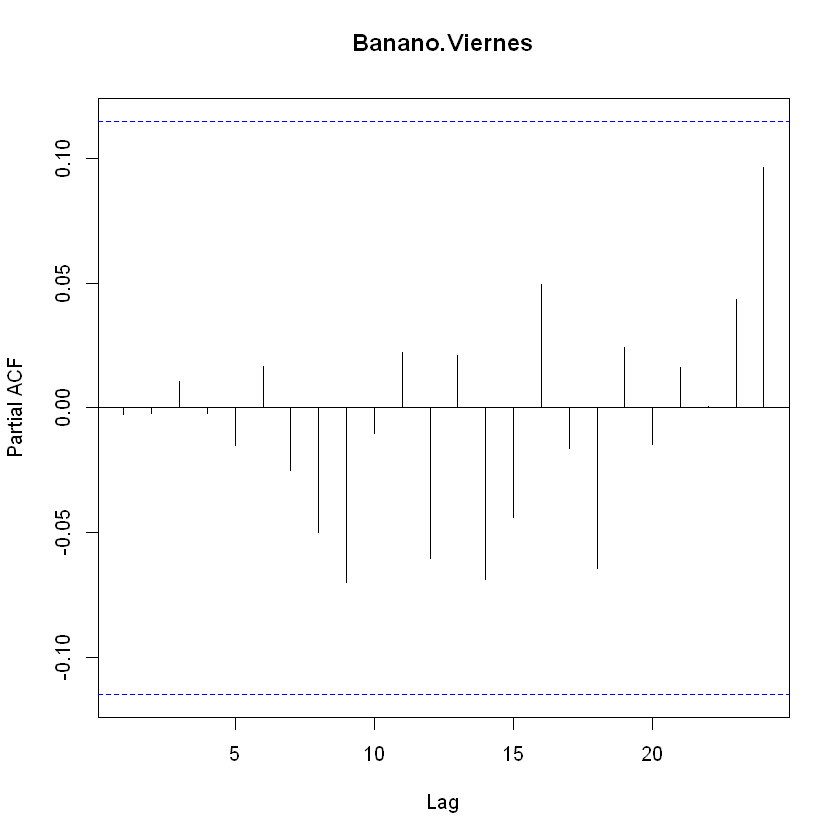


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001 -0.006 -0.017 -0.020 -0.029 -0.020  0.007 -0.014  0.024 -0.004  0.026 
    12     13     14     15     16     17     18     19     20     21     22 
-0.046 -0.007 -0.073 -0.035 -0.036 -0.029 -0.089 -0.071 -0.052 -0.056  0.042 
    23     24 
-0.080  0.092 


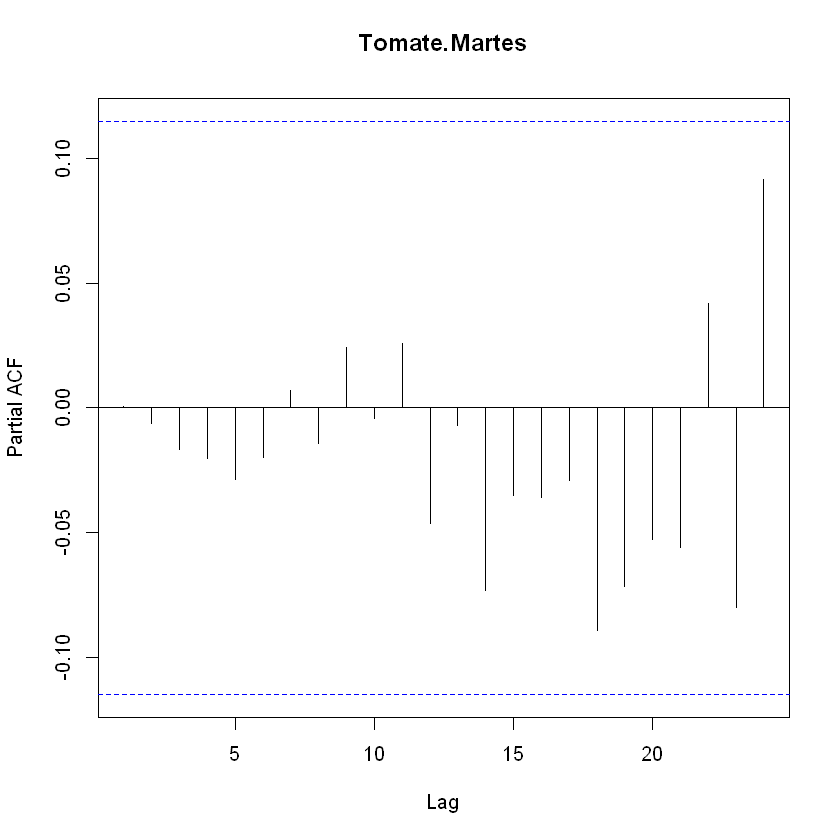


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.001  0.003  0.023  0.011  0.017 -0.024 -0.027 -0.051 -0.003 -0.036 -0.015 
    12     13     14     15     16     17     18     19     20     21     22 
-0.012  0.021  0.002  0.021 -0.008  0.005  0.004  0.025  0.032 -0.030 -0.025 
    23     24 
-0.060  0.068 


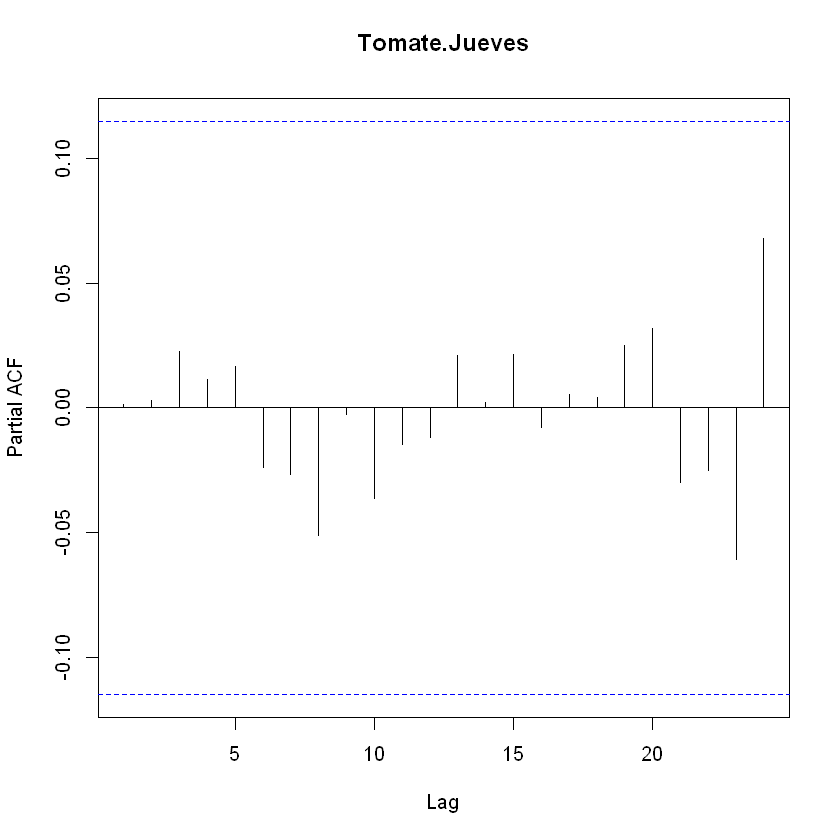


Partial autocorrelations of series 'mo$residuals', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.003 -0.012  0.011 -0.004  0.009  0.007  0.006  0.007  0.000  0.007 -0.041 
    12     13     14     15     16     17     18     19     20     21     22 
 0.015 -0.040  0.028 -0.019  0.025 -0.003 -0.070 -0.063 -0.021  0.012 -0.008 
    23     24 
 0.040  0.002 


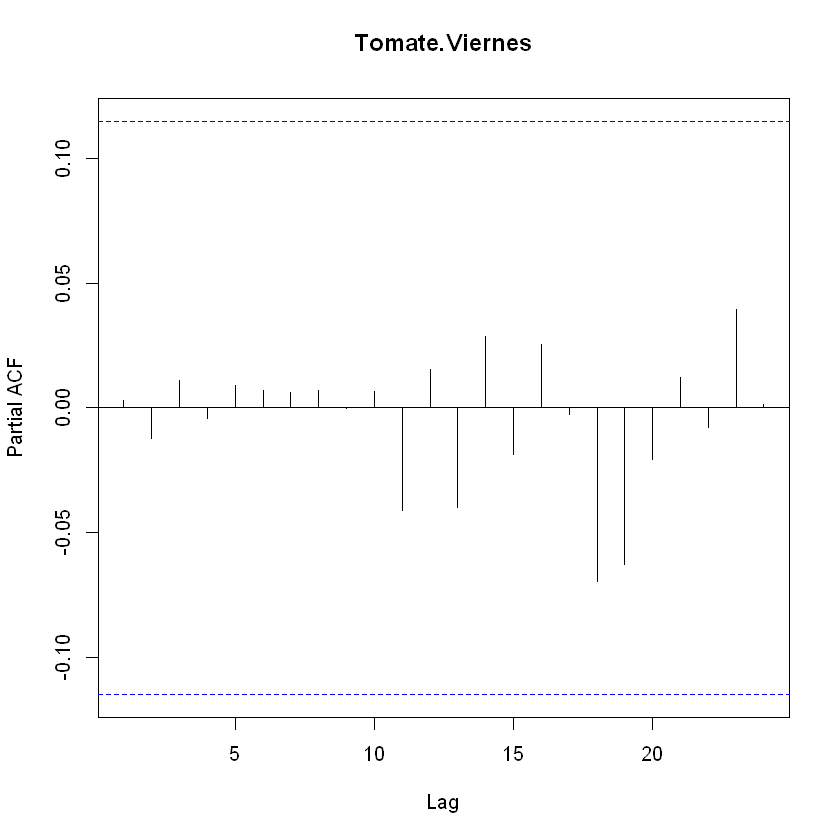

In [35]:
# Se modifican los valores del orden de los siguientes productos y se ejecuta nuevamente las pacf con 
# el objetivo de abarcar los rezagos que afectan el ajuste del modelo

or[2,1:3]<-c(1, 1, 15)   # Yuca viernes
or[4,1:3]<-c(7, 1, 1)   # Plátano martes
or[21,1:3]<-c(1, 1, 6)  # Banano viernes

for (i in 1:nrow(or)) {
 mo<-arima(DATAm[,i+1], order = c(or[i, 1], or[i, 2], or[i, 3]), include.mean = TRUE)
 print(pacf(mo$residuals, main = names(DATAm[i+1])))
 }

In [36]:
# Se imprimen los valores (p,d,q) con los que se cumplen las condiciones de precision Box Jenkins
or

3,1,14
1,1,15
2,1,10
7,1,1
2,1,1
0,1,21
14,1,2
14,1,1
10,1,1
0,1,24
14,1,3


#### Modelo ARIMA

In [37]:
# Se realiza la prueba Ljung-Box para determinar que el modelo genera residuos aleatorios y por lo tanto poder
# considerarlo como preciso y se evaluan los resultados de pronóstico a traves de las metricas de error RMSE y MAPE
options(warm=-1) # No mostar mensajes de alerta
# Modelo ARIMA base
E<-matrix(0, 24, 2) # Matriz para guadar errores tercer modelo
for (i in 1:nrow(or)) {
 mo<-arima(DATAm[,i+1], order = c(or[i, 1], or[i, 2], or[i, 3]), include.mean = TRUE)
 print(Box.test(mo$residuals, type = "Ljung", lag = 25 )$p.value) # Prueba de aleatoriedad Ljung-Box
 f<- forecast(mo, 15)   
 E[i,1]<-sqrt(sum((DATAp[,i+1]- exp(f$mean))^2)/nrow(DATAp[i+1]))
 E[i,2]<-sum(((abs(DATAp[,i+1]- exp(f$mean)))/DATAp[,i+1])*100)/nrow(DATAp[i+1])
}

Warning message in arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), :
"possible convergence problem: optim gave code = 1"

[1] 1
[1] 0.9990825
[1] 0.9997055
[1] 0.9920171
[1] 0.8915239
[1] 1
[1] 0.9999544
[1] 0.7734477
[1] 0.9546084
[1] 1
[1] 0.9999996
[1] 0.9999998
[1] 1
[1] 0.9999896
[1] 0.9932994
[1] 0.9999957
[1] 0.8982006
[1] 0.9999843
[1] 0.9736537
[1] 0.9972331
[1] 0.967438


Warning message in log(s2):
"Se han producido NaNs"

[1] 0.9315847
[1] 0.9999576
[1] 0.9995548


Con los resultados de la prueba Ljung Box se puede apreciar que los residuos de los modelos tienen comportamiento aleatorio, lo que permite inferir que cada modelo se ajusta la parte lineal de los datos. Una vez cumplida la condición ARIMA se pronóstica y guardan los errores en E (matriz error modelo ARIMA), E1(matriz error modelo RNA) E2(matriz error modelo Híbrido).

#### Modelo RNA

In [38]:
# Modelo RNA base
options(warm=-1) # No mostar mensajes de alerta
E1<-matrix(0, 24, 2) # Matriz para guadar errores segundo modelo
for (i in 1:nrow(or)) {
 mo1<-nnetar(DATAm[,i+1])
 f1<- forecast(mo1, 15)  
 E1[i,1]<-sqrt(sum((DATAp[,i+1]- exp(f1$mean))^2)/nrow(DATAp[i+1]))
 E1[i,2]<-sum(((abs(DATAp[,i+1]- exp(f1$mean)))/DATAp[,i+1])*100)/nrow(DATAp[i+1])
}

#### Modelo Híbrido

In [39]:
# Modelo Hibrido
options(warm=-1) # No mostar mensajes de alerta
E2<-matrix(0, 24, 2) # Matriz para guadar errores tercer modelo
for (i in 1:nrow(or)) {
 mo<-arima(DATAm[,i+1], order = c(or[i, 1], or[i, 2], or[i, 3]), include.mean = TRUE)
 mo2<-nnetar(mo$residuals)
 fmo<- forecast(mo, 15)
 fmo2<- forecast(mo2, 15)  
 E2[i,1]<-sqrt(sum((DATAp[,i+1]- exp(fmo$mean+fmo2$mean))^2)/nrow(DATAp[i+1]))
 E2[i,2]<-sum(((abs(DATAp[,i+1]- exp(fmo$mean+ fmo2$mean)))/DATAp[,i+1])*100)/nrow(DATAp[i+1])
}

Warning message in arima(DATAm[, i + 1], order = c(or[i, 1], or[i, 2], or[i, 3]), :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"

### Referencias Bibliográficas

De Arce, R., & Mahía, R. (2003). MODELOS ARIMA, 31. Retrieved from http://www.uam.es/personal_pdi/economicas/rarce/pdf/Box-Jenkins.PDF